<a href="https://colab.research.google.com/github/Sanjeevhegde009/Company-Bankruptcy-Prediction/blob/main/Company_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Company Bankruptcy Prediction**   



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name - Sanjeev Hegde**


# **Project Summary -**


Predicting the possibility of bankruptcy of a company is of paramount importance to businesses such as investment banks, banks assessing credit risk while understanding the overall picture of the market segment and economy. However, predicting whether a company could go bankrupt depends on several factors such revenue, debt owned by the company, offerings by the competitors, company management, external factors such as recession or natural calamities, fraud etc. In this regard, various machine learning models are developed based on the company bankruptcy data gathered from Taiwan Economic Journal during 1999 to 2009 consisting of various financial ratios.  Supervised machine learning classifications algorithms logistic regression, Bernoulli-Naive Bayes classifier, Support Vector Machine Classifier, XGBoost Classifier have been utilized to make predictions of bankruptcy on companies and it has been found that Support Vector Machine Classifier(SVM) performed the best with 0.9994 recall and 0.9847 ROC AUC score. Further, it is evident from the analysis that top 5 reasons for bankruptcy are Lower value of Research and Development Expense Rate, Lower Total Assets growth rate, Lower Cash Turnover rate, Low returns on assets and Lower inventory turnover rate.



# **GitHub Link -**

https://github.com/Sanjeevhegde009/Company-Bankruptcy-Prediction




# **Problem Statement**



Company Bankruptcy Prediction using supervised machine learning classification algorithms based on the data collected from Taiwan Economic Journal during years 1999 to 2009

## ***Data Set exploration***

### Import Libraries

In [ ]:
#Import Libraries
#Importing Google Drive
from google.colab import drive

#EDA and classification algorithms libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Decision Tree Libraries
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Cross Validation Library
from sklearn.model_selection import GridSearchCV

#Evaluation Metric library
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, recall_score

#import Warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset from drive
Bankruptcy_data= pd.read_csv('/content/drive/MyDrive/Company Bankruptcy Prediction/COMPANY BANKRUPTCY PREDICTION.csv')

In [ ]:
companies= Bankruptcy_data.copy()

### Dataset First View

In [ ]:
# viewing the top 5 entries of the data set
pd.set_option('display.max_columns', None)
companies.head(5)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [ ]:
#Viewing the last 5 entries of the data set
companies.tail(5)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  \
6814                                      0.303510   
6815                                      0.303520   
6816                                      0.303512   
6817                                      0.303498   
6818                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
6814                               0.781588             1.510213e-04   
6815                               0.781586             5.220000e+09   
6816                               0.781546             2.509312e-04   
6817                               0.781663             1.236154e-04   
6818                               0.786079             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.181294   
6818                          5.900000e+08       0.000000   

       Net Value Per Share (B)   Net Value Per Share (A)  \
6814                  0.175045                  0.175045   
6815                  0.181324                  0.181324   
6816                  0.269521                  0.269521   
6817                  0.213392                  0.213392   
6818                  0.220766                  0.220766   

       Net Value Per Share (C)   Persiste

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
companies.shape

(6819, 96)

Hence, it is evident that given Taiwan Economic Journal data set contains 96 features and 6819 entries

### Dataset Information

In [ ]:
# Dataset Info
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

From above information it is clear that 'Bankrupt?', 'Liability-Assets Flag' and 'Net Income Flag' features have int64 data type and rest others have float64 data type

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
companies[companies.duplicated()]

Empty DataFrame
Columns: [Bankrupt?,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value Growth Rate,  Total Asset Return Growth Rate Ratio,  Cash Reinvestment %,  Current Ratio,  Quick Ratio,  Interest Expense Ratio,  Total debt/Total net worth,  Debt ratio %,  Net worth/Assets,  Long-term fund suitability ratio (A),  Borrowing dependency,  Contingent liabilities/Net worth,  Operating profit/Paid-in capital,  Net profit before tax/Paid-in capital,  Inventory and accounts receivable/Net value,  Total Asset Turnover,  Accounts Receivable Turnover,  Average Collection Days,  Inventory Turnover Rate (times),  Fixed Assets Turnover Frequency,  Net Worth Turnover Rate (times),  Revenue per person,  Operating profit per person,  Allocation rate per person,  Working Capital to Total Assets,  Quick Assets/Total Assets,  Current Assets/Total Assets,  Cash/Total Assets,  Quick Assets/Current Liability,  Cash/Current Liability,  Current Liability to Assets,  Operating Funds to Liability,  Inventory/Working Capital,  Inventory/Current Liability,  Current Liabilities/Liability,  Working Capital/Equity,  Current Liabilities/Equity,  Long-term Liability to Current Assets,  Retained Earnings to Total Assets,  Total income/Total expense,  Total expense/Assets,  Current Asset Turnover Rate,  Quick Asset Turnover Rate,  Working capitcal Turnover Rate,  Cash Turnover Rate,  Cash Flow to Sales,  Fixed Assets to Assets,  Current Liability to Liability,  Current Liability to Equity,  Equity to Long-term Liability,  Cash Flow to Total Assets,  Cash Flow to Liability,  CFO to Assets,  Cash Flow to Equity,  Current Liability to Current Assets,  Liability-Assets Flag,  Net Income to Total Assets,  Total assets to GNP price,  No-credit Interval,  Gross Profit to Sales,  Net Income to Stockholder's Equity,  Liability to Equity,  Degree of Financial Leverage (DFL),  Interest Coverage Ratio (Interest expense to EBIT),  Net Income Flag,  Equity to Liability]
Index: []

Hence, it is clear that data set does not contain any duplicate values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
companies.isnull().values.sum()

0

Thus, it is evident that there are no missing values in the data set

### Observations about the data set



The data set is collection of list of companies from Taiwan Economic Journal during the years 1999 to 2009. Companies in the data set are classified to be bankrupt as per the business regulations of Taiwan Stock Exchange. The data set has 96 features provided for a total of 6819 companies among which Bankruptcy is our target variable.






























































































## ***Understanding Variables***

In [ ]:
# Dataset Columns
companies.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
# Dataset Describe
pd.set_option('display.max_columns', None)
companies.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

### Variables Description 

The features in the data set and their description are:
*   Bankrupt?: Class label 1 : Yes , O: No
*   ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
*   ROA(A) before interest and % after tax: Return On Total Assets(A)
*   ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
*   Operating Gross Margin: Gross Profit/Net Sales
*   Realized Sales Gross Margin: Realized Gross Profit/Net Sales
*   Operating Profit Rate: Operating Income/Net Sales
*   Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
*   After-tax net Interest Rate: Net Income/Net Sales
*   Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
*   Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
*   Operating Expense Rate: Operating Expenses/Net Sales
*   Research and development expense rate: (Research and Development Expenses)/Net Sales
*   Cash flow rate: Cash Flow from Operating/Current Liabilities
*   Interest-bearing debt interest rate: Interest-bearing Debt/Equity
*   Tax rate (A): Effective Tax Rate
*   Net Value Per Share (B): Book Value Per Share(B)
*   Net Value Per Share (A): Book Value Per Share(A)
*   Net Value Per Share (C): Book Value Per Share(C)
*   Persistent EPS in the Last Four Seasons: EPS-Net Income
*   Cash Flow Per Share
*   Revenue Per Share (Yuan ¥): Sales Per Share
*   Operating Profit Per Share (Yuan ¥): Operating Income Per Share
*   Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
*   Realized Sales Gross Profit Growth Rate
*   Operating Profit Growth Rate: Operating Income Growth
*   After-tax Net Profit Growth Rate: Net Income Growth
*   Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

*   Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
*   Total Asset Growth Rate: Total Asset Growth


*   Net Value Growth Rate: Total Equity Growth
*   Total Asset Return Growth Rate Ratio: Return on Total Asset Growth


*   Cash Reinvestment %: Cash Reinvestment Ratio
*   Current Ratio

*   Quick Ratio: Acid Test
*   Interest Expense Ratio: Interest Expenses/Total Revenue


*   Total debt/Total net worth: Total Liability/Equity Ratio
*   Debt ratio %: Liability/Total Assets


*   Net worth/Assets: Equity/Total Assets
*   Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

*   Borrowing dependency: Cost of Interest-bearing Debt
*   Contingent liabilities/Net worth: Contingent Liability/Equity

*   Operating profit/Paid-in capital: Operating Income/Capital
*   Net profit before tax/Paid-in capital: Pretax Income/Capital


*   Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
*   Total Asset Turnover


*   Accounts Receivable Turnover
*   Average Collection Days: Days Receivable Outstanding

*   Inventory Turnover Rate (times)
*   Fixed Assets Turnover Frequency

*   Net Worth Turnover Rate (times): Equity Turnover
*   Revenue per person: Sales Per Employee


*   Operating profit per person: Operation Income Per Employee
*   Allocation rate per person: Fixed Assets Per Employee


*   Working Capital to Total Assets
*   Quick Assets/Total Assets


*   Current Assets/Total Assets
*   Cash/Total Assets


*   Quick Assets/Current Liability
*   Cash/Current Liability

*   Current Liability to Assets
*   Operating Funds to Liability


*   Inventory/Working Capital
*   Inventory/Current Liability



*   Current Liabilities/Liability
*   Working Capital/Equity


*   Current Liabilities/Equity
*   Long-term Liability to Current Assets

*   Retained Earnings to Total Assets
*   Total income/Total expense


*   Total expense/Assets
*   Current Asset Turnover Rate: Current Assets to Sales


*   Quick Asset Turnover Rate: Quick Assets to Sales
*   Working capitcal Turnover Rate: Working Capital to Sales


*   Cash Turnover Rate: Cash to Sales
*   Cash Flow to Sales


*   Fixed Assets to Assets
*   Current Liability to Liability


*   Current Liability to Equity
*   Equity to Long-term Liability


*   Cash Flow to Total Assets
*   Cash Flow to Liability


*   CFO to Assets
*   Cash Flow to Equity


*   Current Liability to Current Assets
*   Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise


*   Net Income to Total Assets
*   Total assets to GNP price


*   No-credit Interval
*   Gross Profit to Sales

*   Net Income to Stockholder's Equity
*   Liability to Equity

*   Degree of Financial Leverage (DFL)
*   Interest Coverage Ratio (Interest expense to EBIT)


*   Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
*   Equity to Liability

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
dict(companies.nunique())

{'Bankrupt?': 2,
 ' ROA(C) before interest and depreciation before interest': 3333,
 ' ROA(A) before interest and % after tax': 3151,
 ' ROA(B) before interest and depreciation after tax': 3160,
 ' Operating Gross Margin': 3781,
 ' Realized Sales Gross Margin': 3788,
 ' Operating Profit Rate': 3376,
 ' Pre-tax net Interest Rate': 3789,
 ' After-tax net Interest Rate': 3604,
 ' Non-industry income and expenditure/revenue': 2551,
 ' Continuous interest rate (after tax)': 3617,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1536,
 ' Cash flow rate': 5557,
 ' Interest-bearing debt interest rate': 1080,
 ' Tax rate (A)': 2488,
 ' Net Value Per Share (B)': 2278,
 ' Net Value Per Share (A)': 2285,
 ' Net Value Per Share (C)': 2284,
 ' Persistent EPS in the Last Four Seasons': 1358,
 ' Cash Flow Per Share': 1545,
 ' Revenue Per Share (Yuan ¥)': 3807,
 ' Operating Profit Per Share (Yuan ¥)': 1236,
 ' Per Share Net profit before tax (Yuan ¥)': 1522,
 ' Realized Sale

From the number of unique values present in each feature, it is apparently evident that the target variable, Liability-Assets Flag and Net Income Flag variables are categorical in nature

### ***Data Wrangling***

It is to be noted that most features contain extra space in the beginning. Hence, removing the extra space as well as '?' in the 'Bankruptcy?' feature is necessary for incorporating ease of use.


Apart from the above point, since all the features are already in a structured format, appropriate data types, contain no abnormal characters or anything as such and do not have any null or duplicate entries, we shall proceed to further Exploratory Data Analysis and visualization process after making appropriate changes regarding the above point.

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
companies= companies.rename(columns= lambda x: x.strip())     #removing empty space from column names
companies.rename(columns={'Bankrupt?':'Bankruptcy'}, inplace=True)    #removing symbol character from Bankrupt? feature and rename it Bankruptcy

In [ ]:
companies.columns

Index(['Bankruptcy', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-ta

### ***Data Visualization***


#### Histograms and bar plots
Let us perform a univariate analysis by plotting a histogram or bar chart(for categorical features) and understand the distribution of each feature.

In [ ]:
#distribution plotter
def dist_plotter(data_set):
  ''' this function plots bars for discrete variables and histogram for continuous variables'''
  for feature in list(data_set.columns ):
    plt.rcParams['figure.figsize']=(10,5)
    if int(data_set[feature].nunique())<5:
      bars = sns.countplot(data_set[feature])
      plt.xlabel(feature)
      plt.ylabel('count')
      plt.title('distribution of the feature '+feature)
      plt.show()
    else:
      sns.distplot(companies[feature])
      plt.xlabel(feature)
      plt.title('distribution of the feature '+feature)
      plt.figtext(0.15, 0.83, f'the skew and kurtosis are: {companies[feature].skew()} and {companies[feature].kurt()} respectively')
      plt.show()

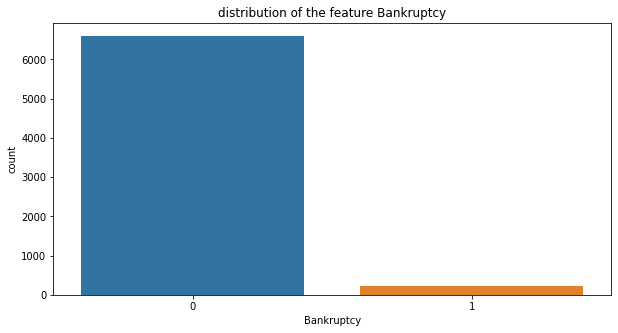

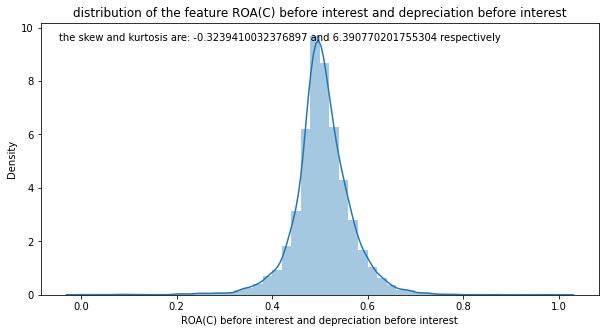

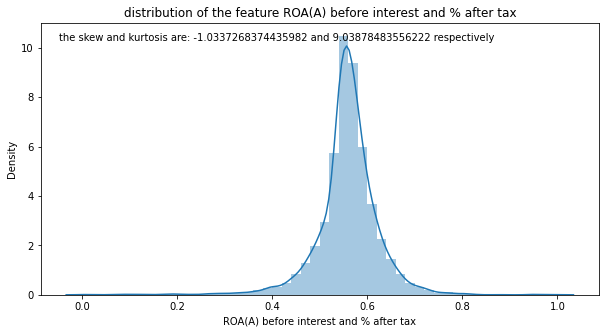

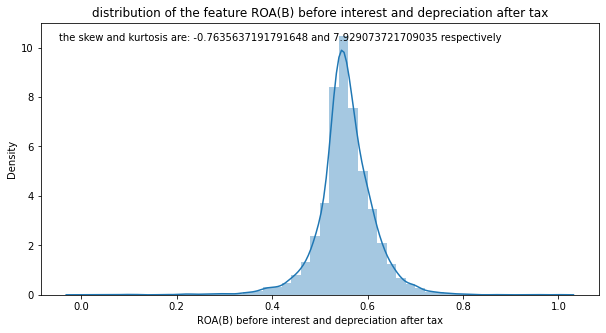

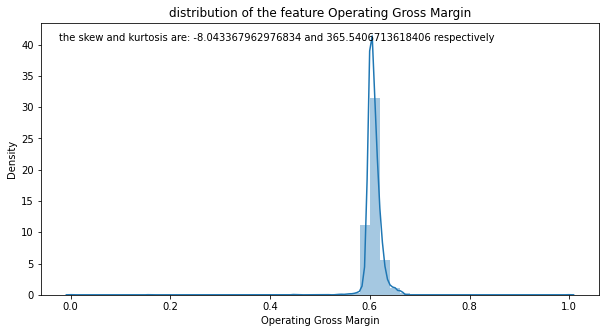

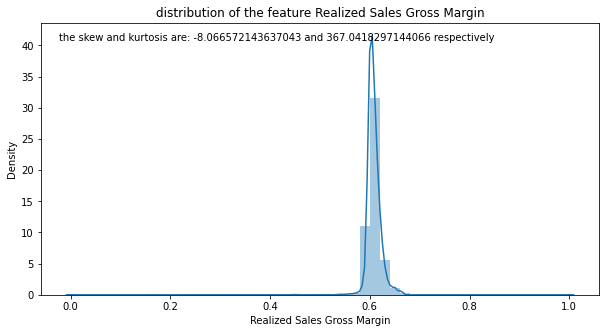

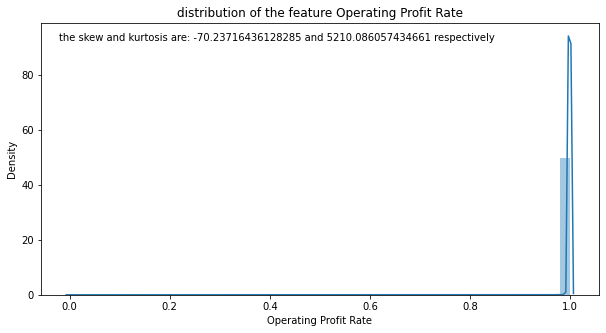

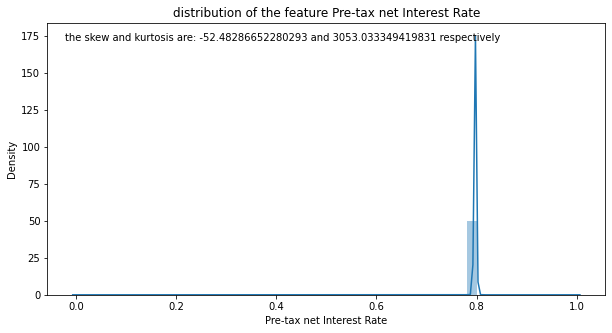

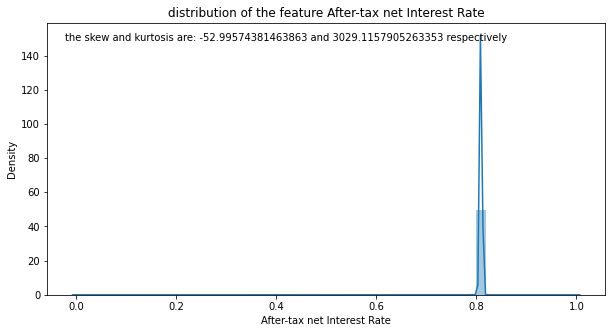

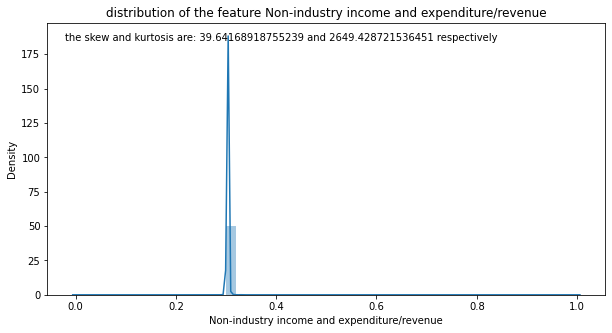

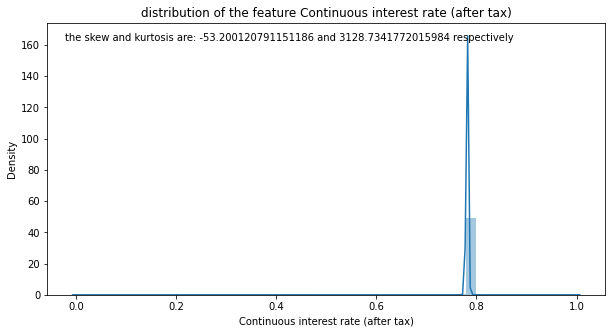

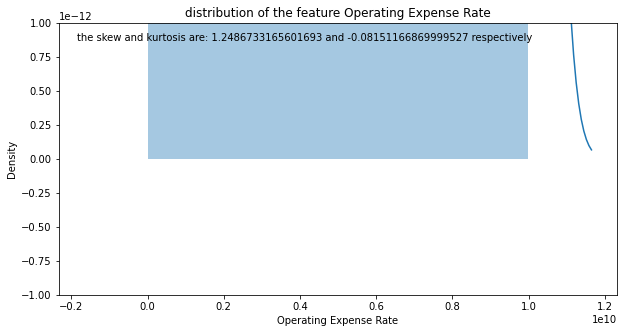

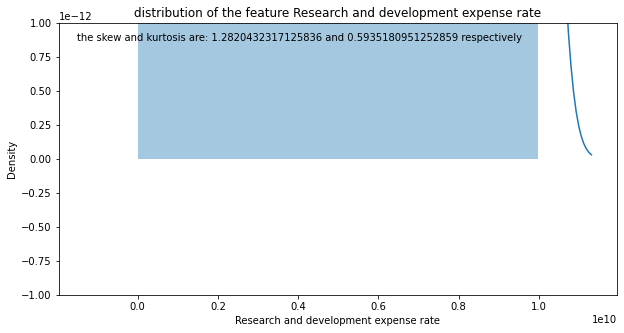

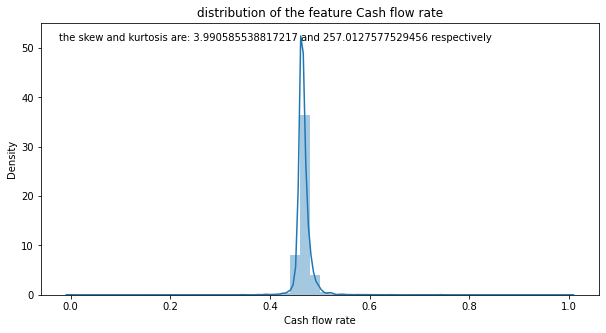

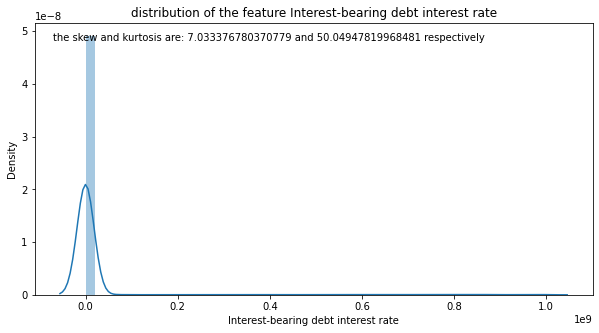

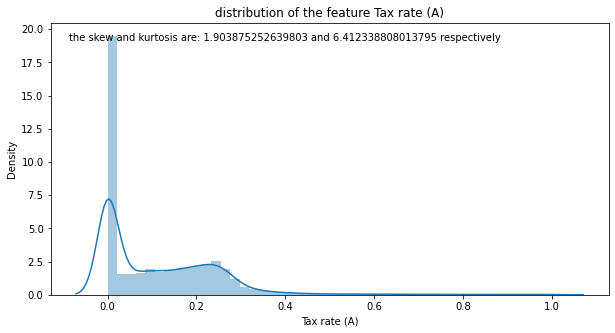

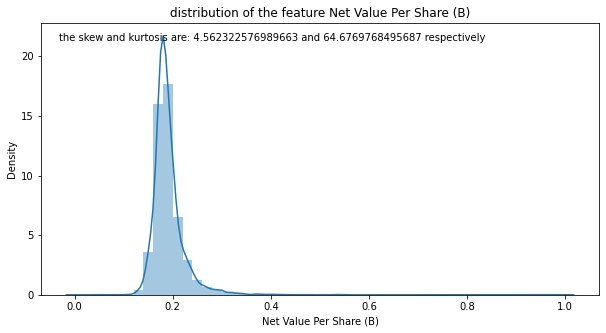

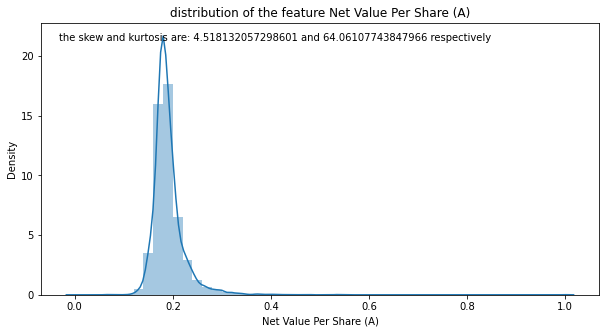

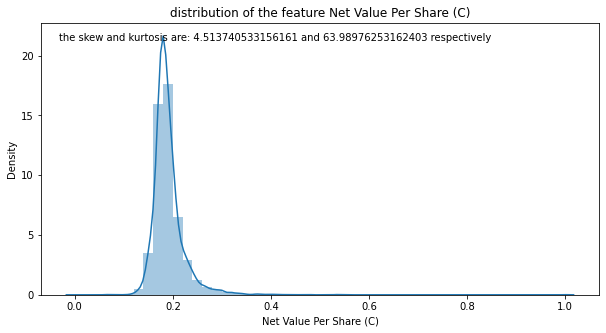

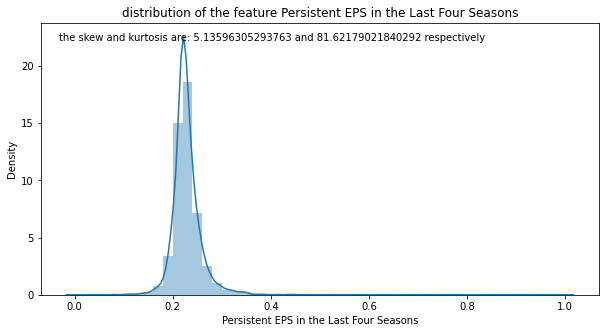

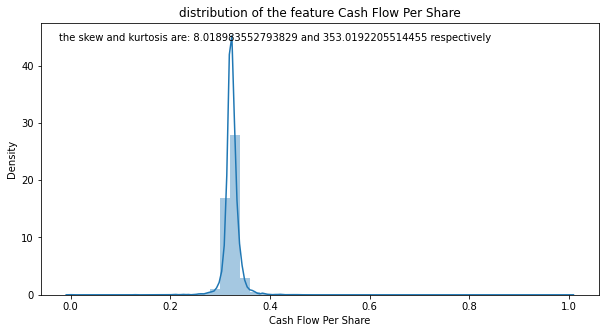

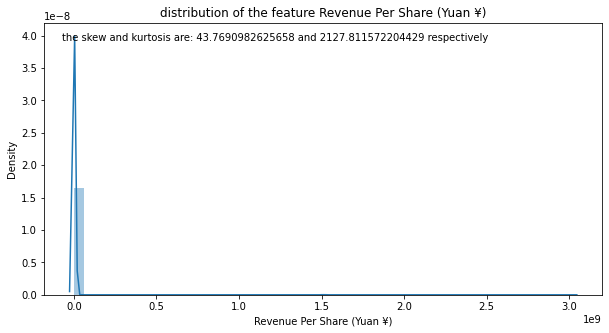

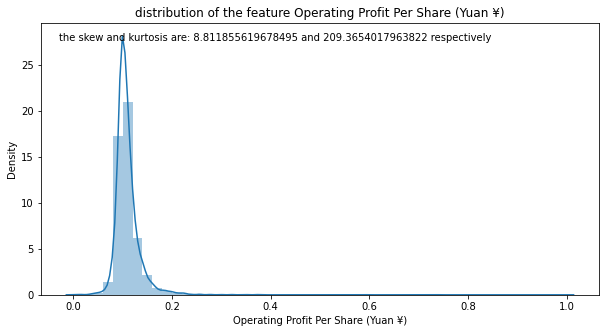

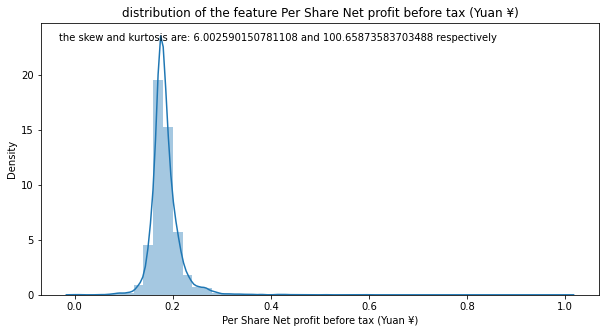

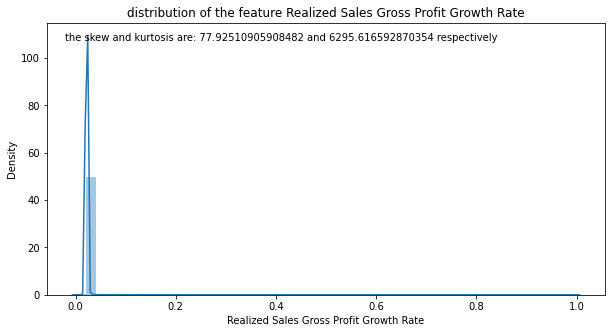

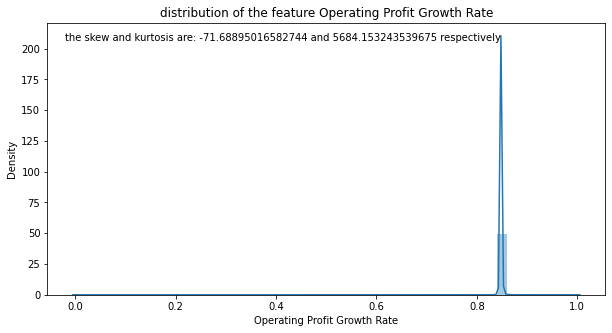

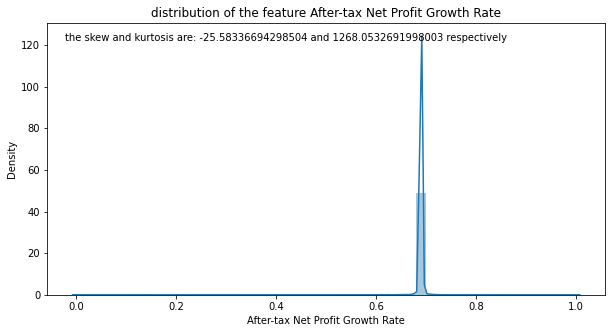

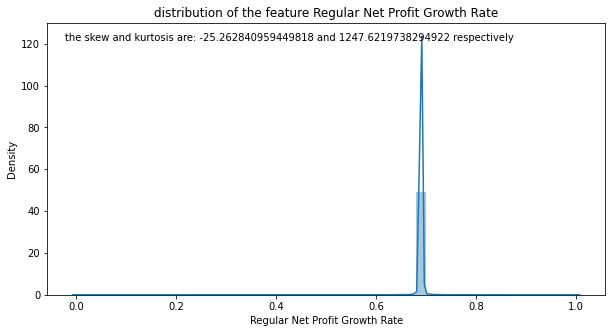

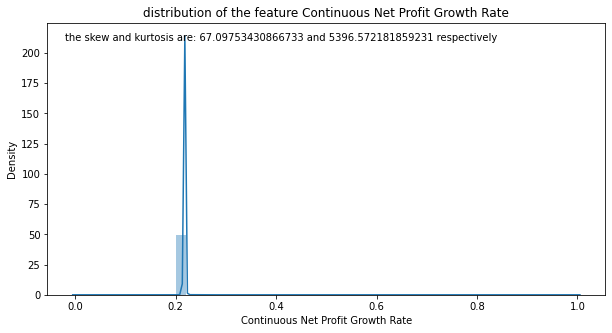

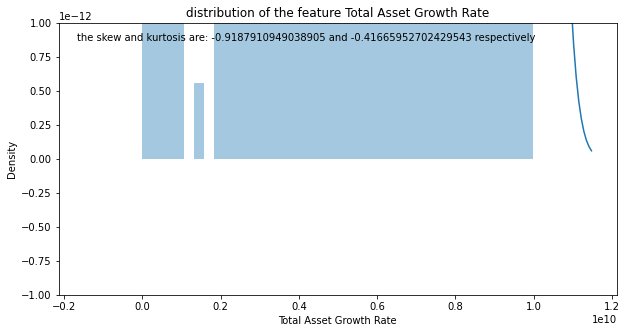

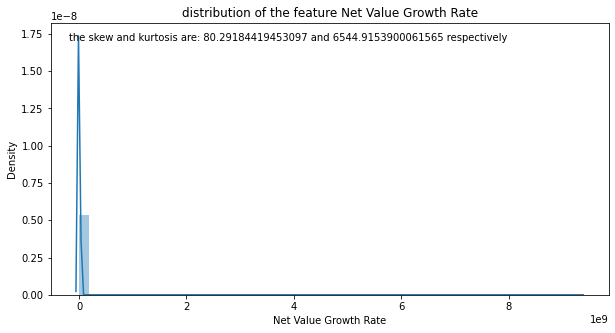

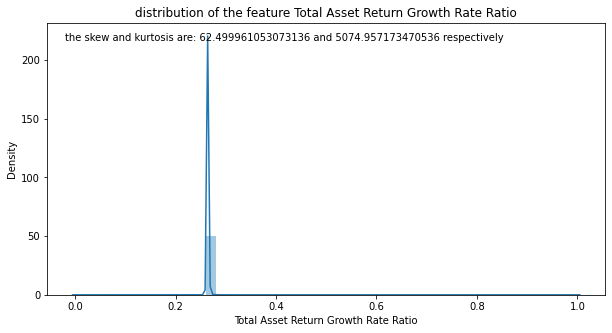

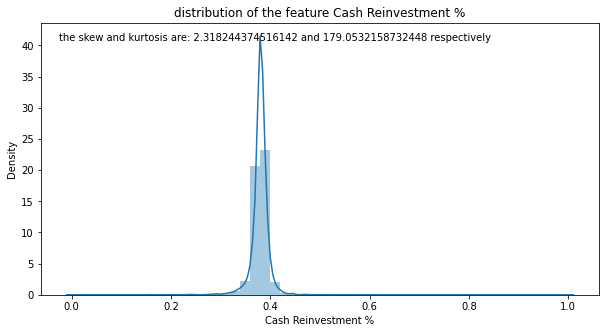

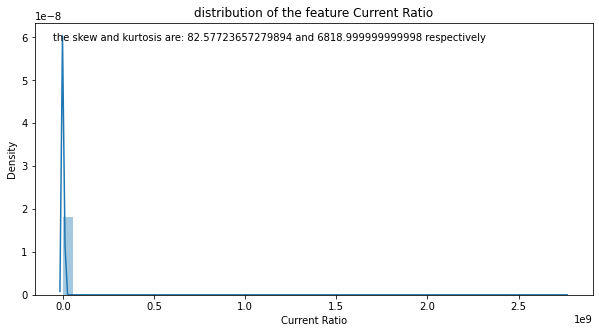

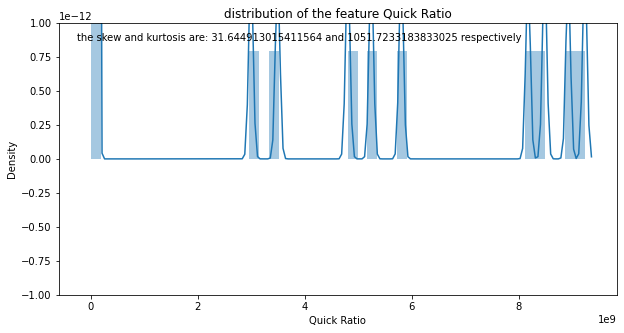

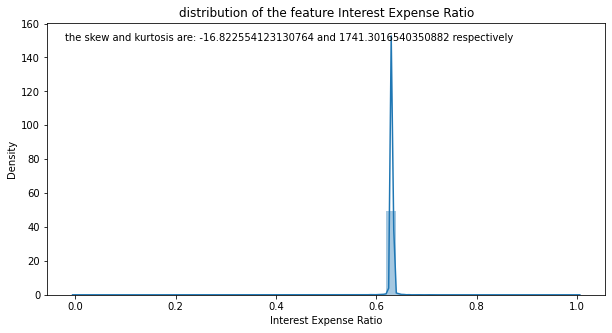

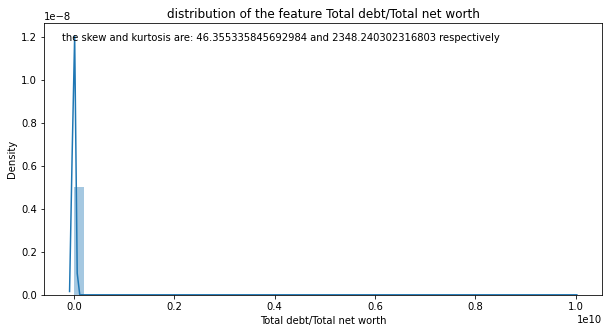

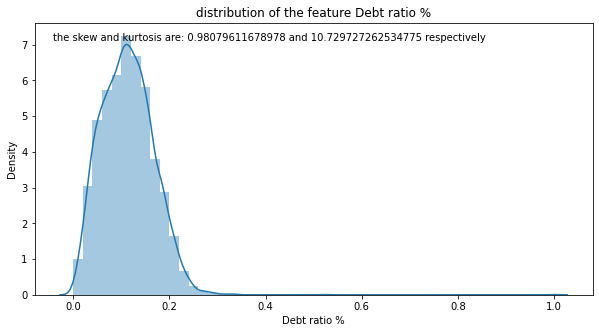

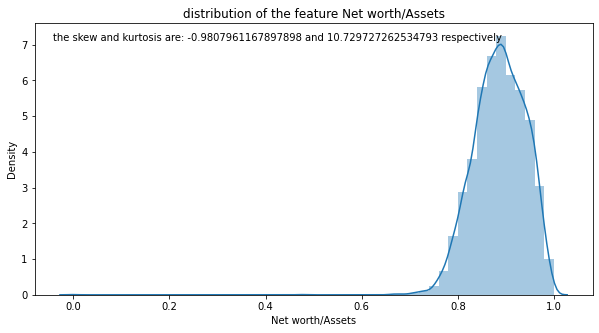

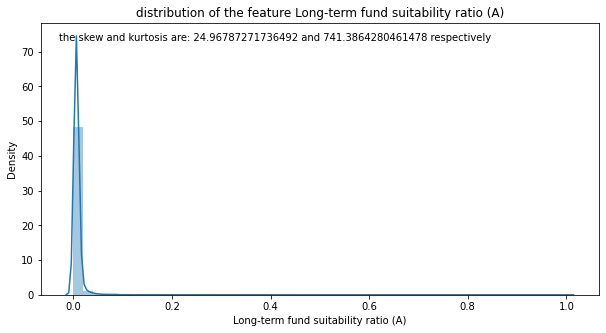

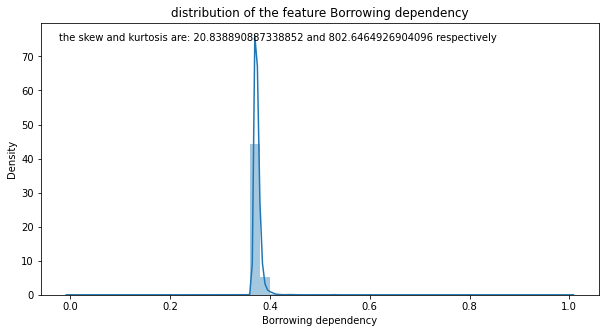

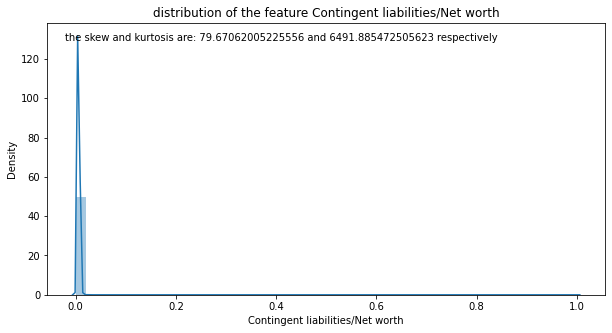

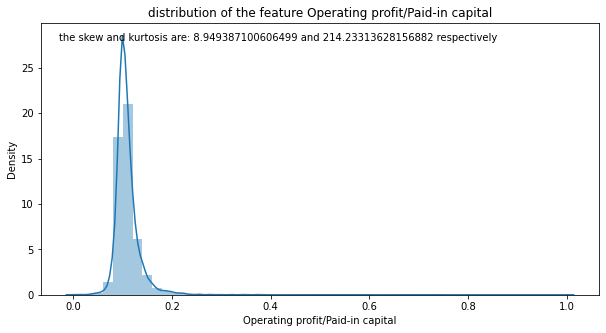

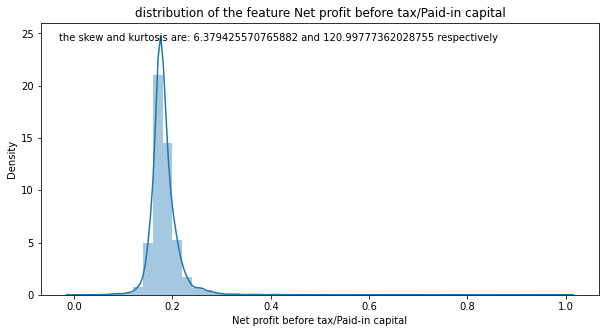

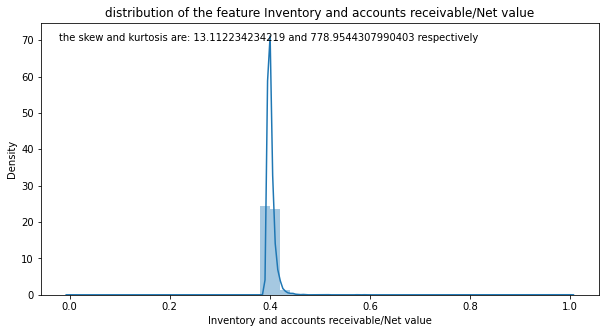

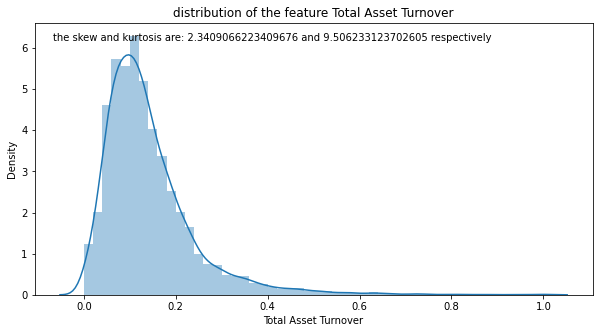

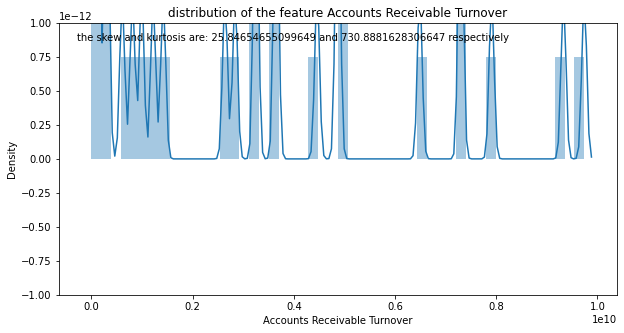

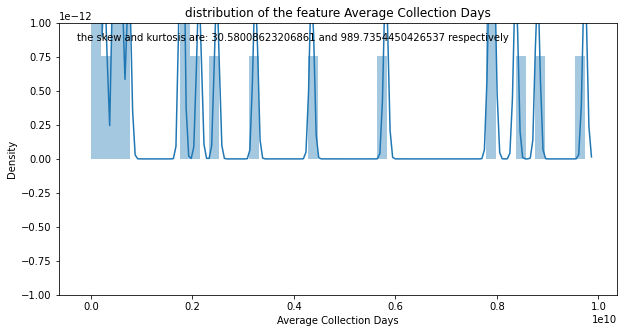

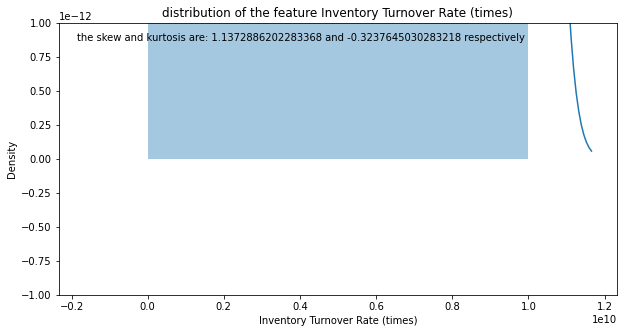

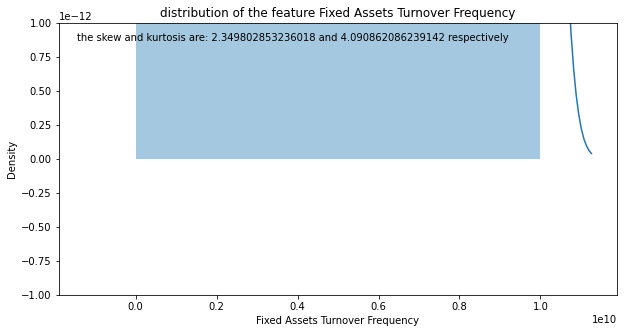

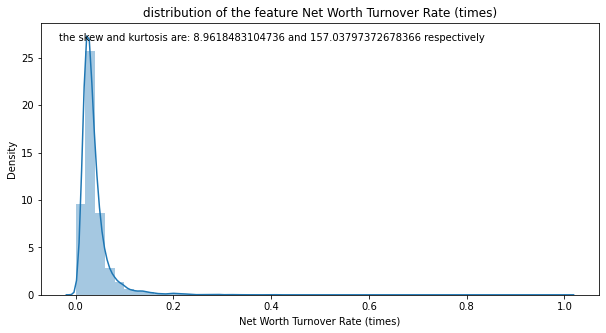

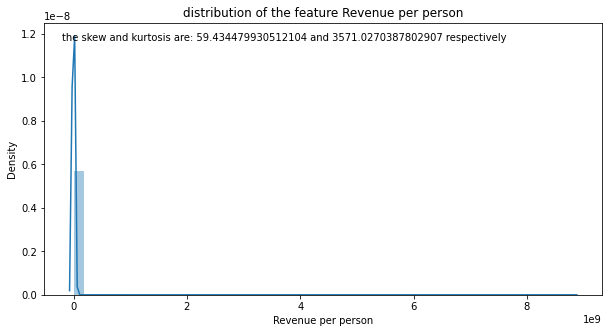

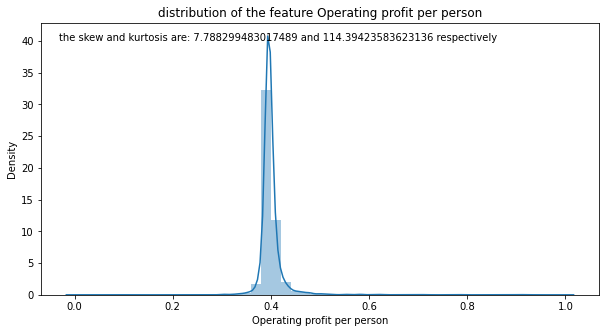

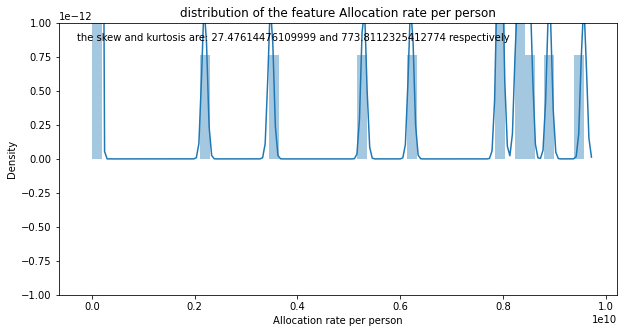

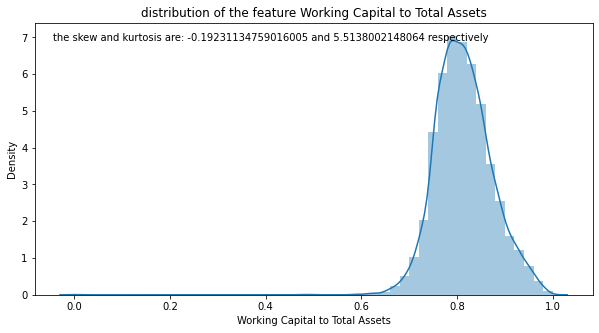

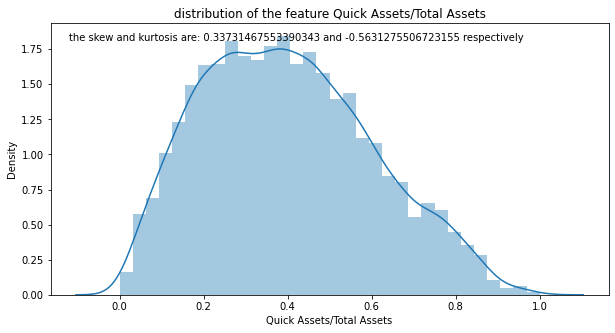

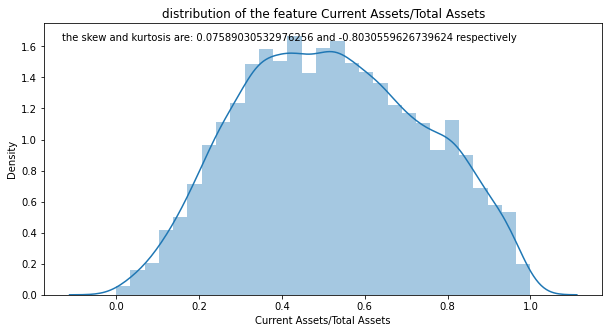

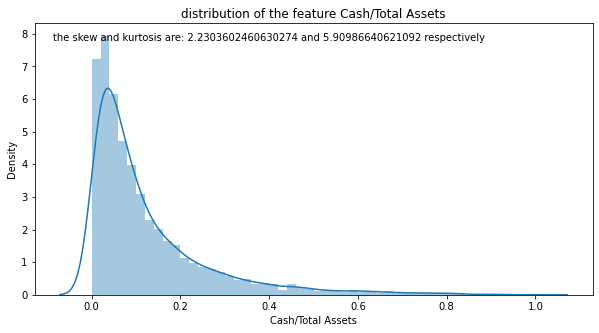

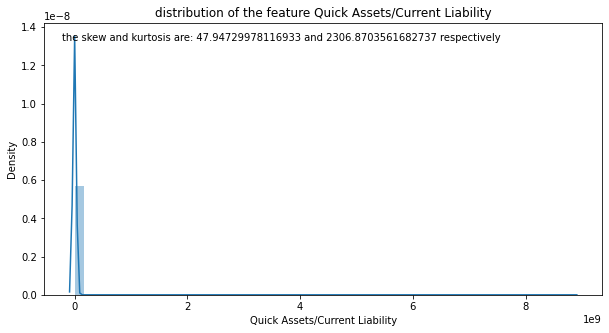

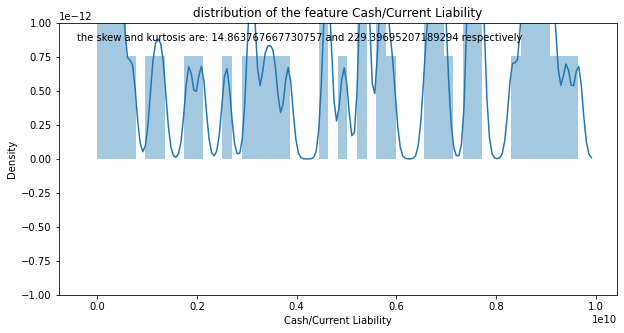

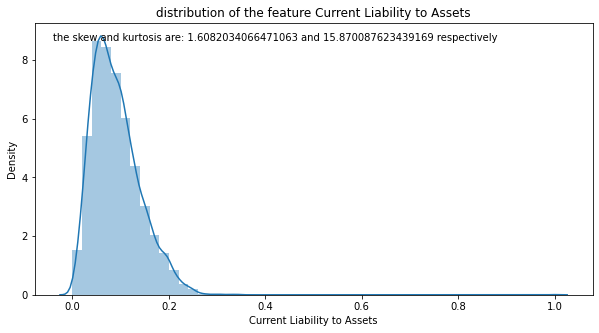

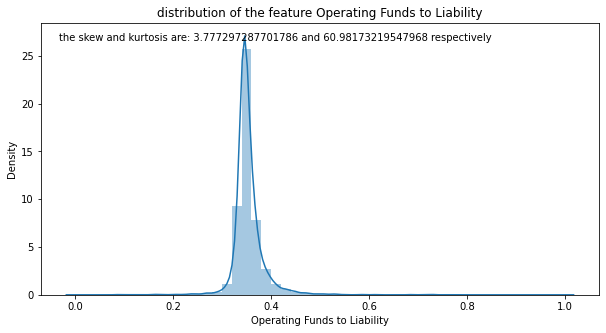

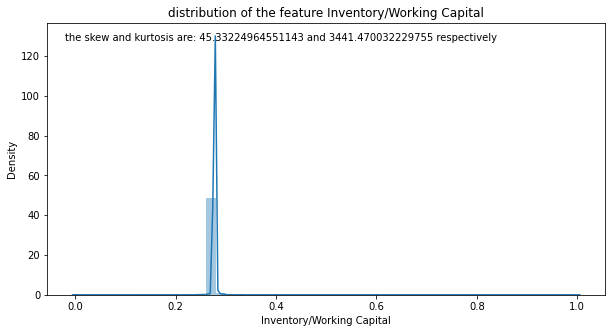

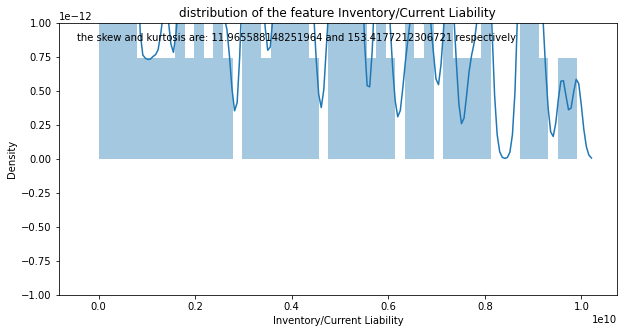

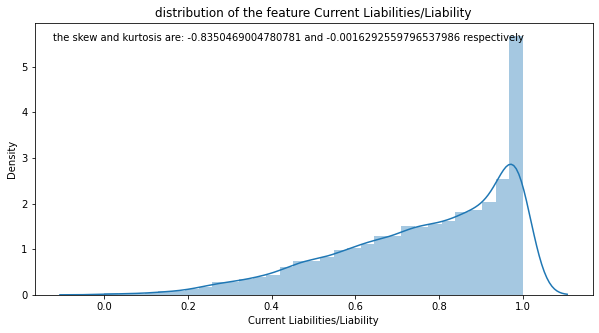

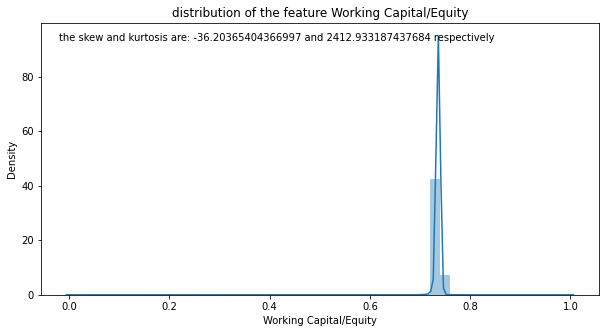

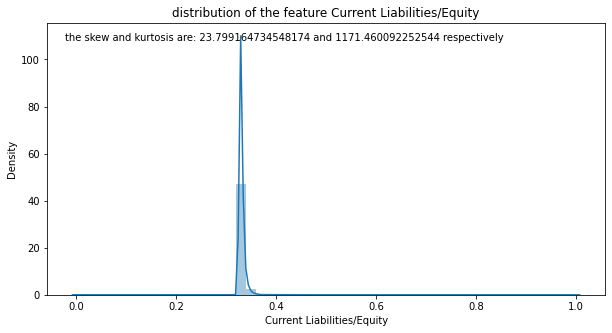

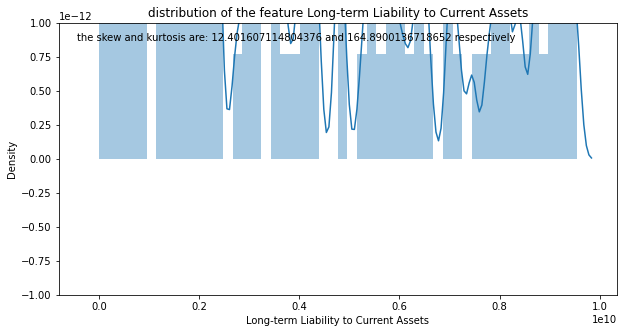

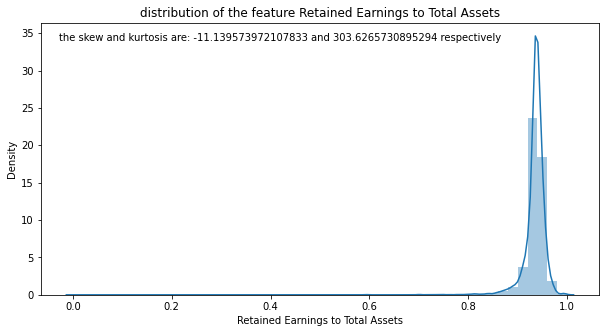

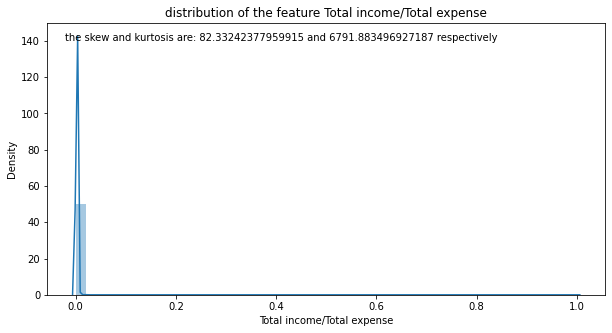

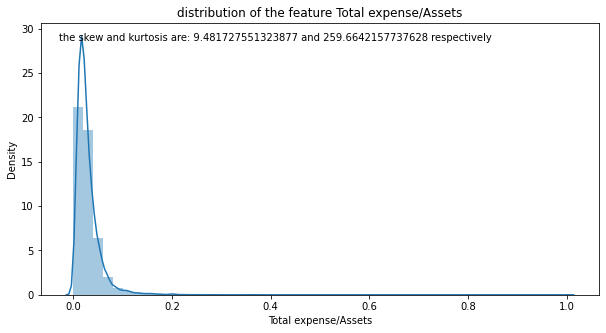

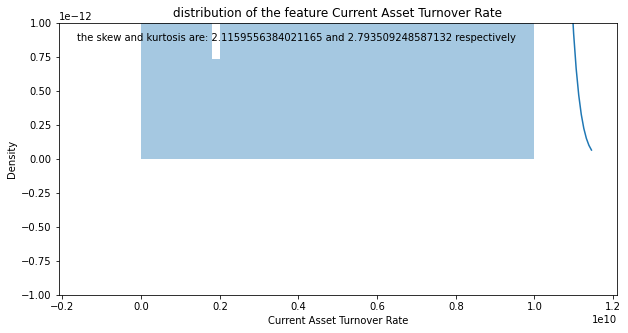

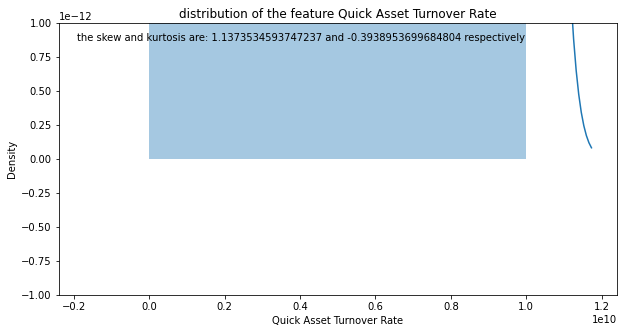

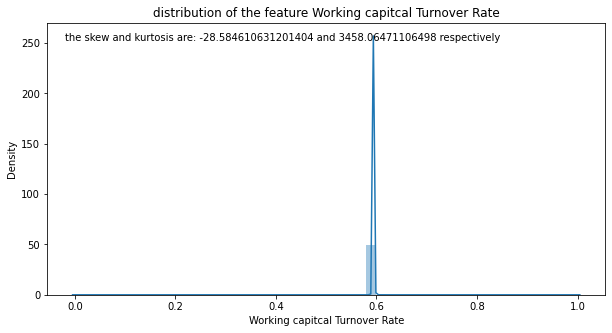

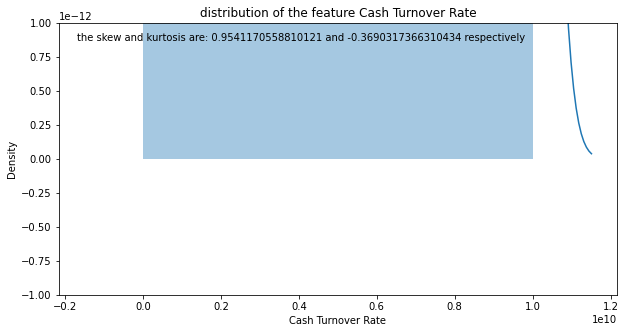

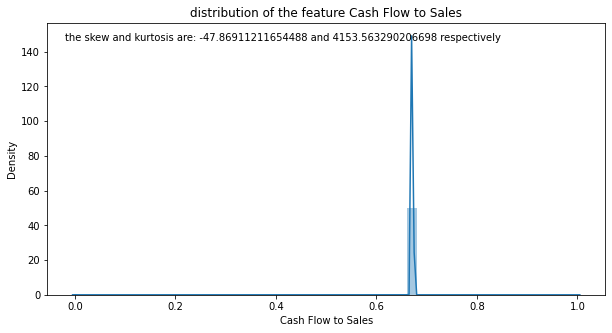

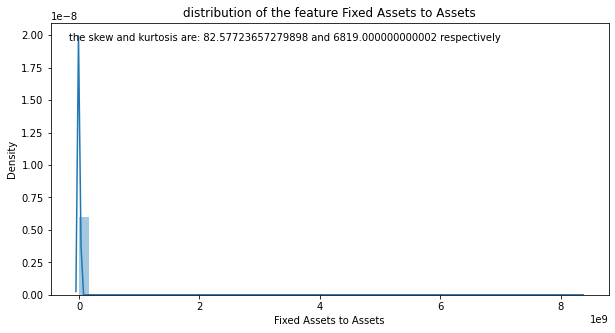

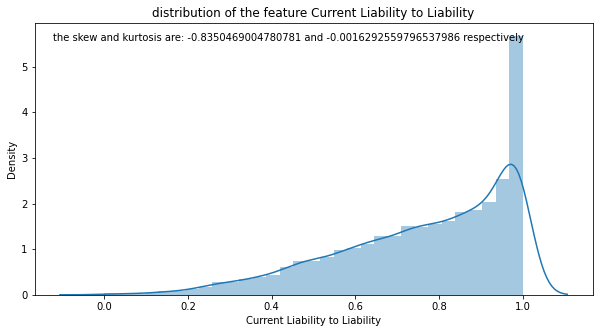

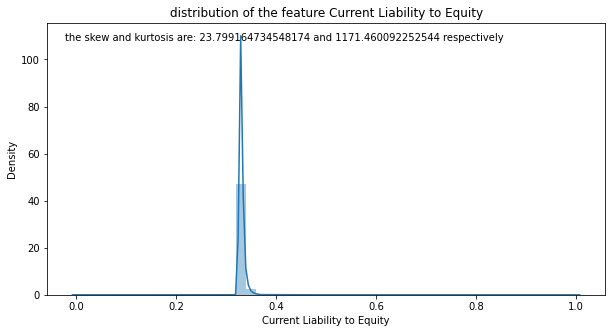

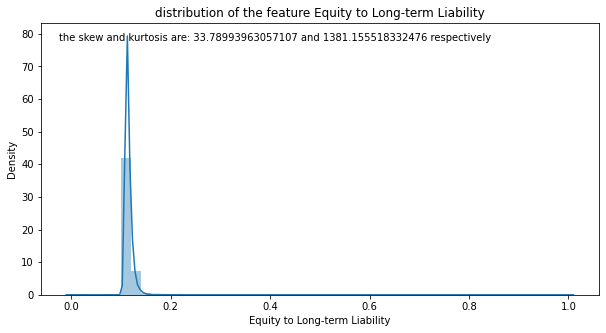

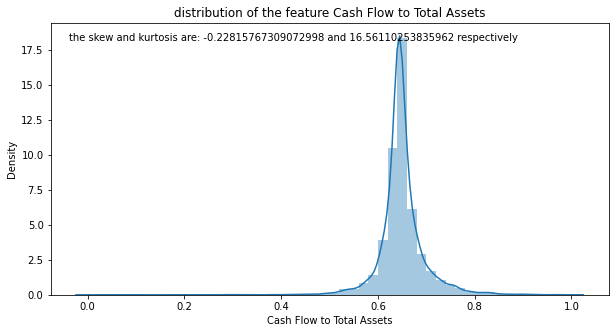

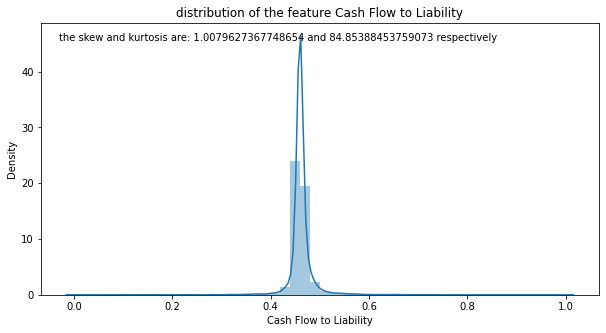

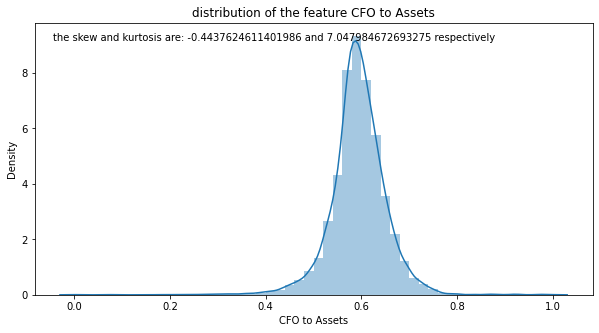

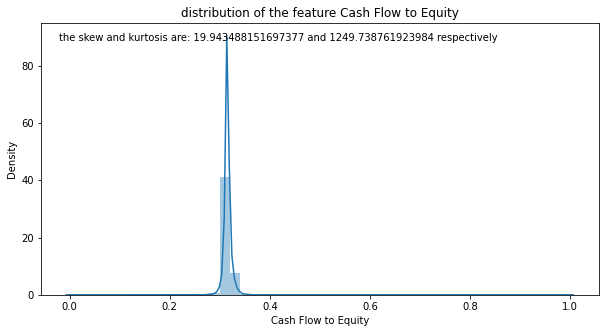

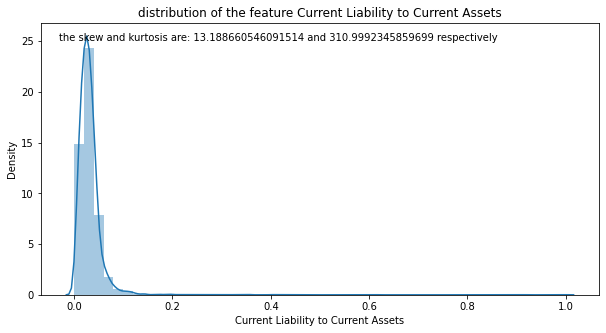

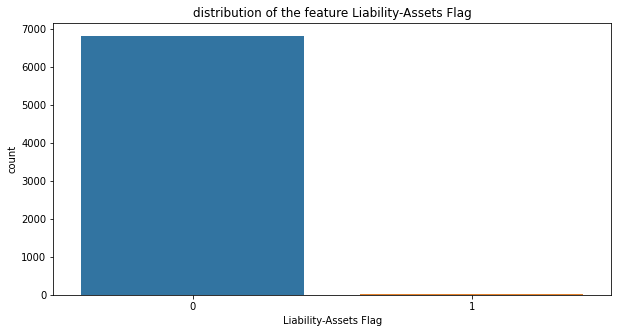

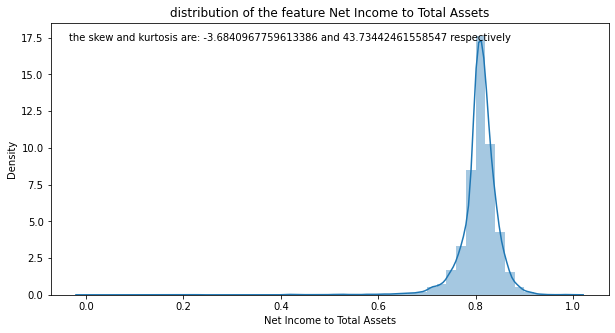

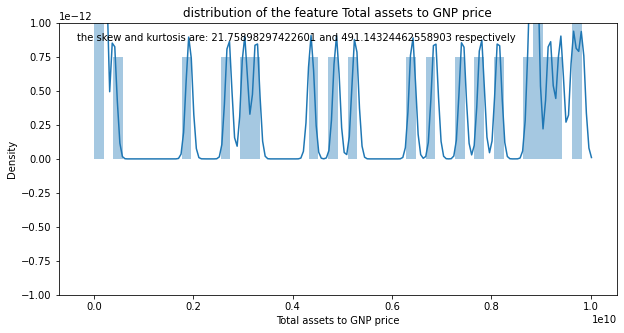

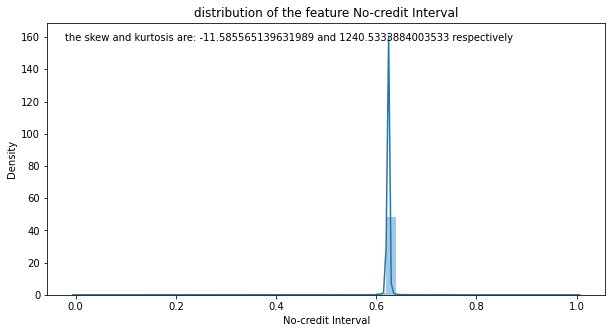

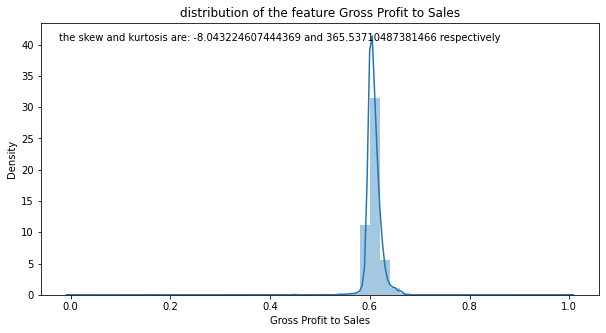

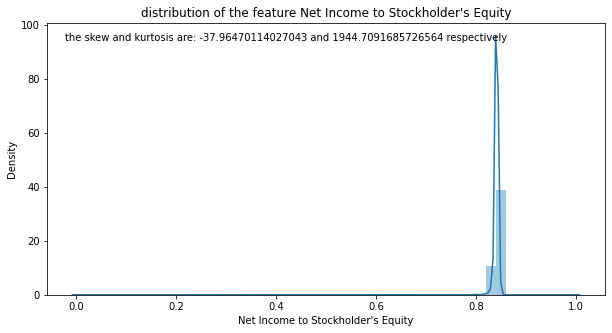

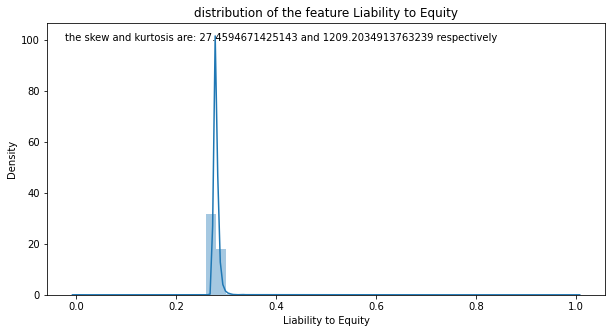

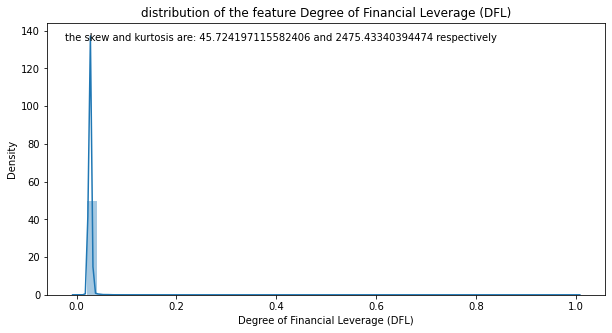

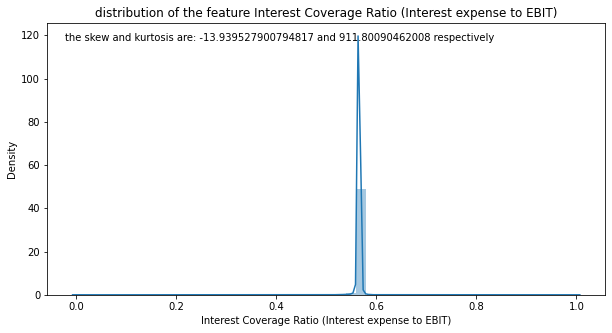

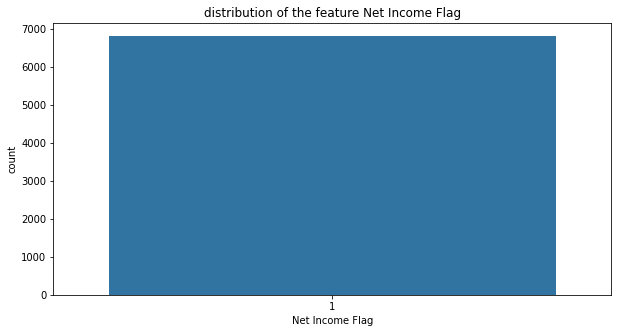

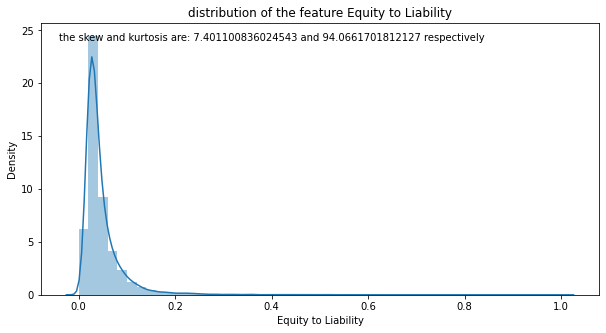

In [ ]:
dist_plotter(companies)

Bar plots and histograms have been chosen understand the distribution of underlying variables in the data set.

From the above bar graphs and histograms, it is evident that:


*   Bankruptcy? feature is categorical and being our target variable, it is evident from the plot that the data set is imbalanced.
*   Most features are either positvely or negatively skewed and leptokurtic indicating presence of outliers.


*   Net Income Flag value remains '1' for all entries irrespective of whether the company has gone bankrupt or not. Hence, it is appropriate consider that Net Income Flag does not effect company bankrupcty and drop it from the data set.





In [ ]:
#droping the Net Income Flag Variable
companies.drop('Net Income Flag', axis=1, inplace=True)

#### Chart - 2
Let us plot the box plot for all the features and gain a greater understanding of the distribution of the data to understand for any abnormalities.


In [ ]:
# Boxplot visualization code
def box_plotter(data_set):
  '''this function plots box plot for given data set'''
  for feature in list(data_set.columns):
    plt.rcParams['figure.figsize']=(10,5)
    sns.boxplot(data_set[feature])
    plt.title('boxplot for '+feature)
    plt.xlabel(feature)
    plt.show()

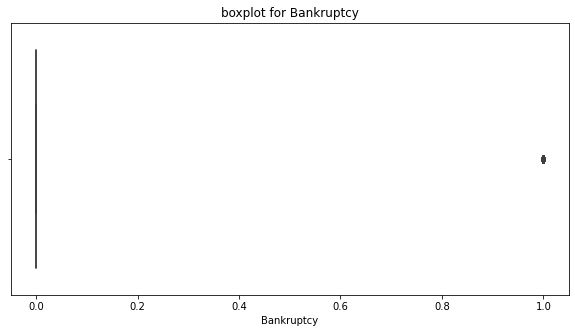

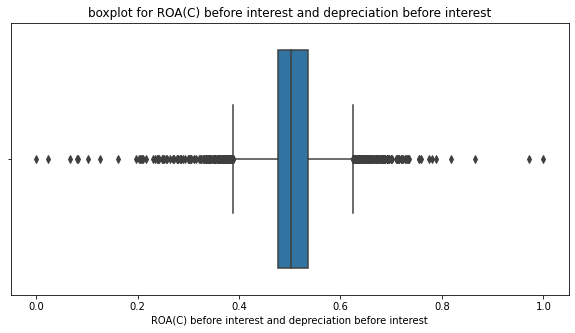

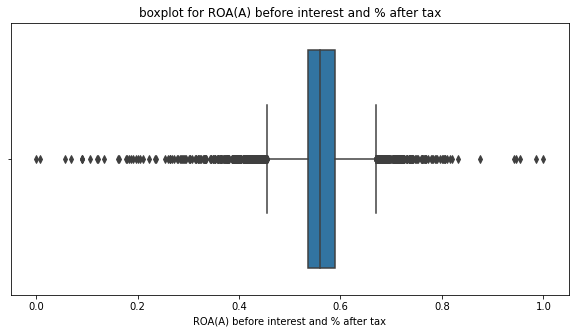

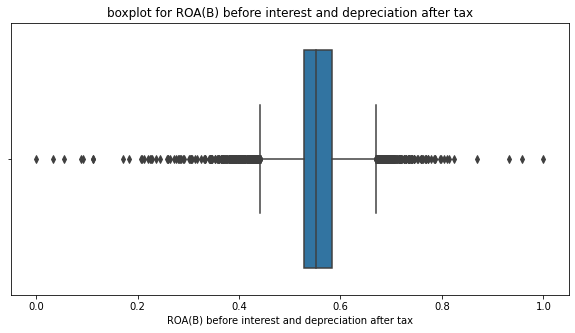

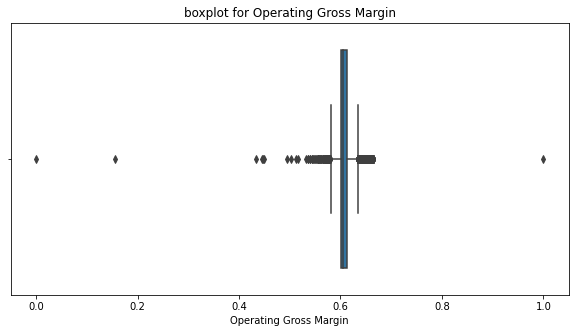

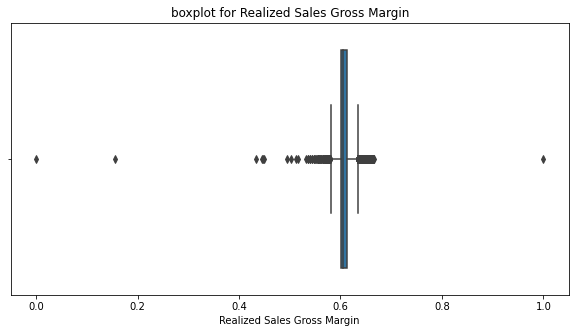

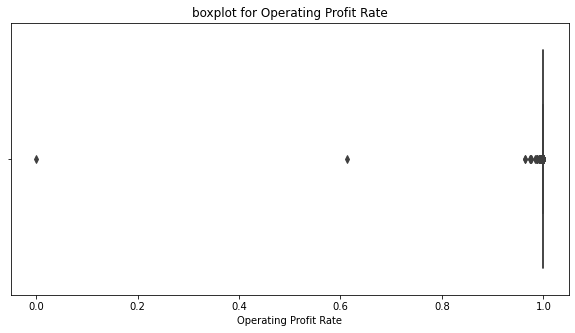

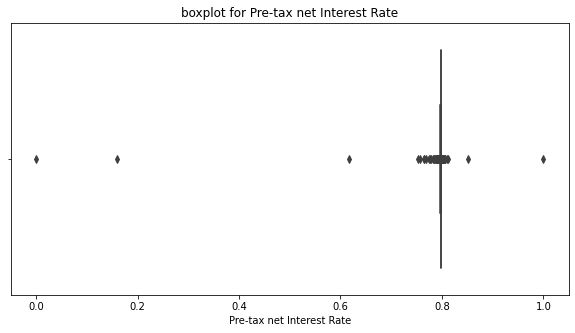

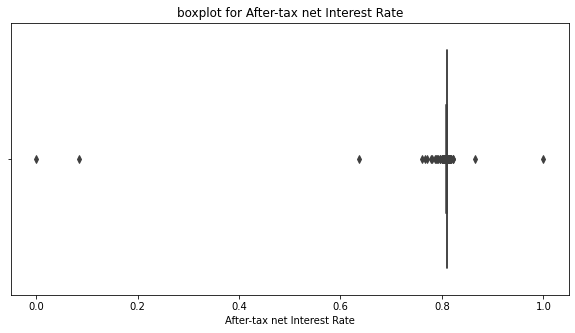

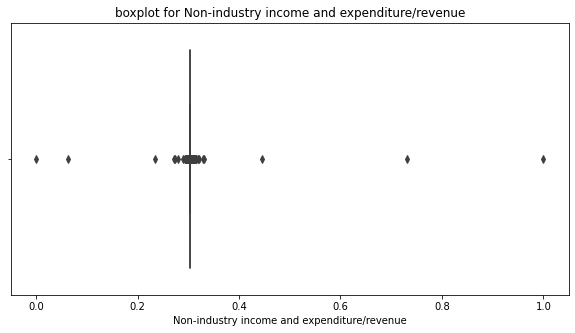

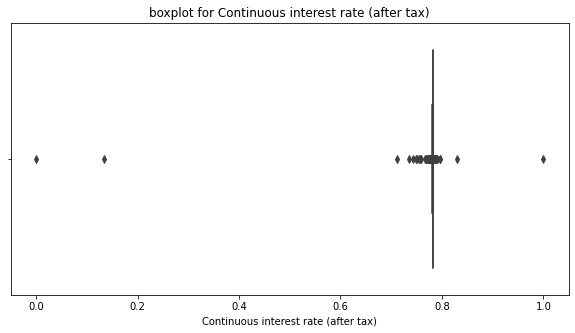

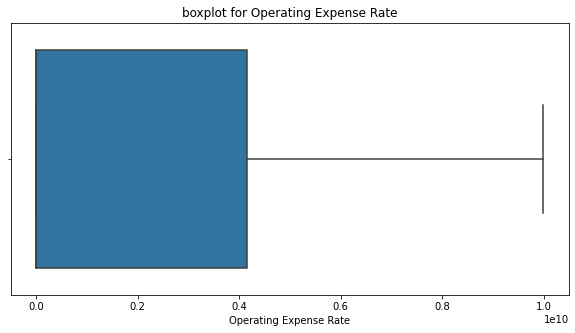

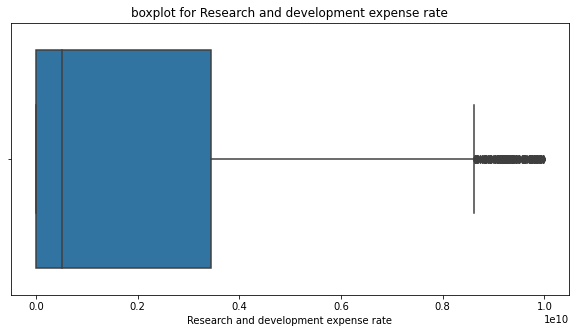

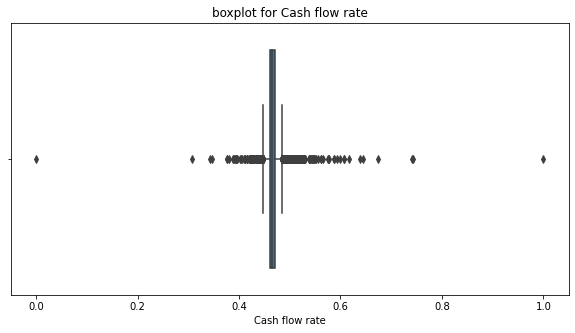

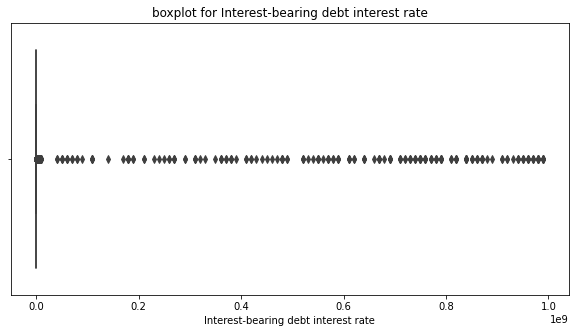

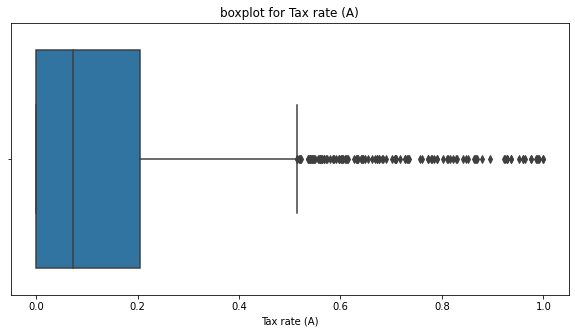

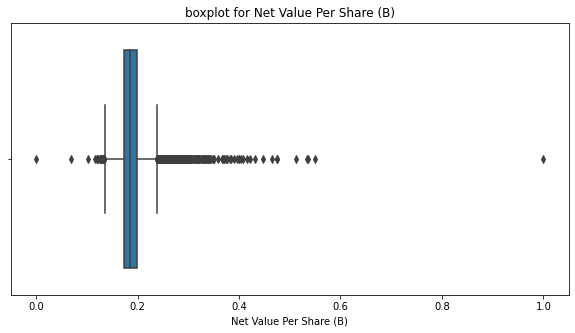

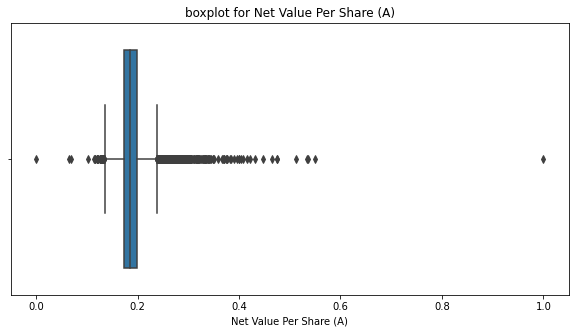

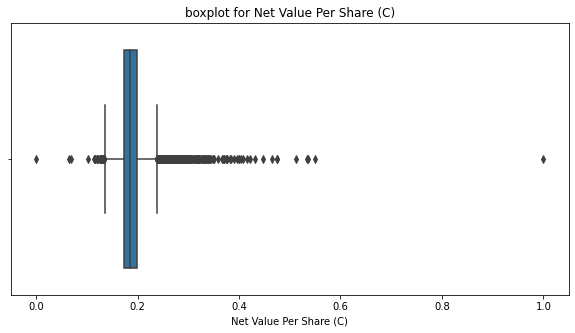

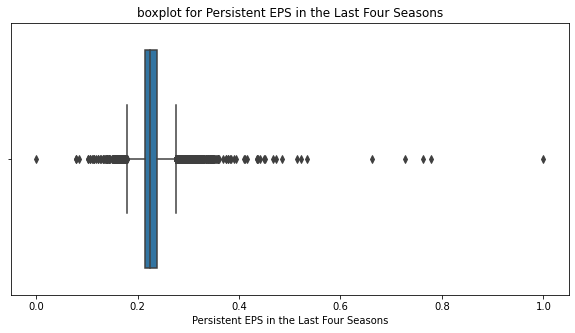

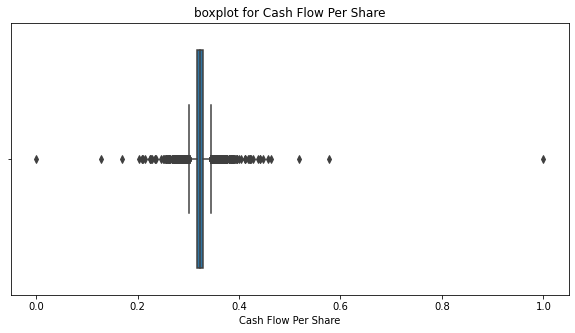

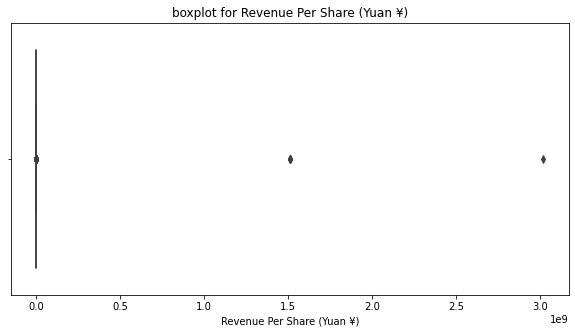

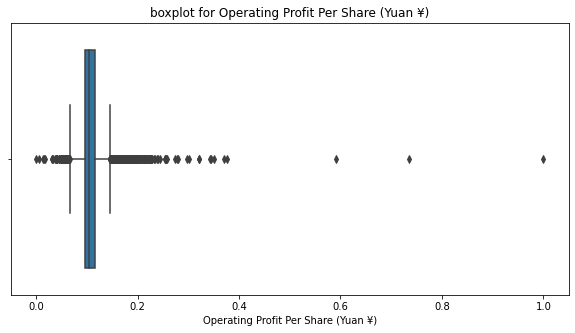

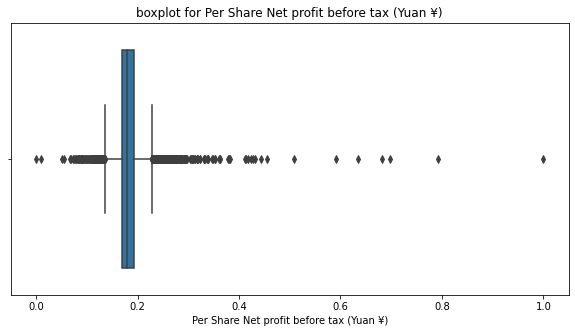

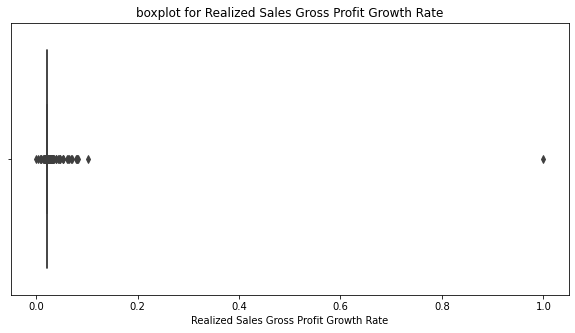

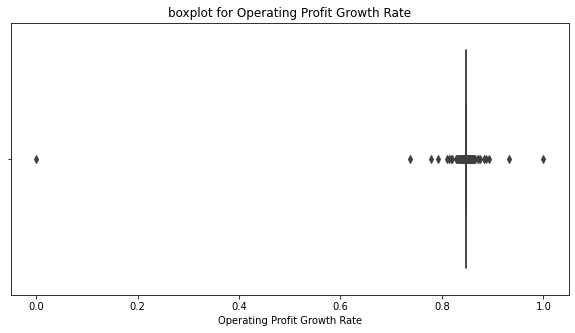

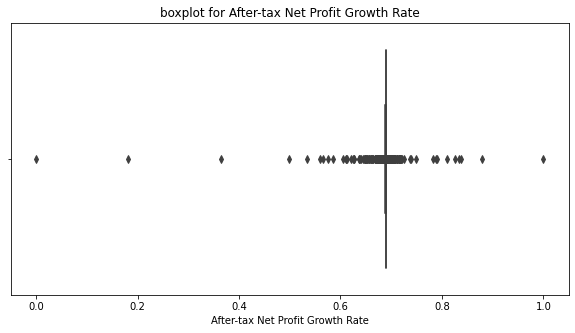

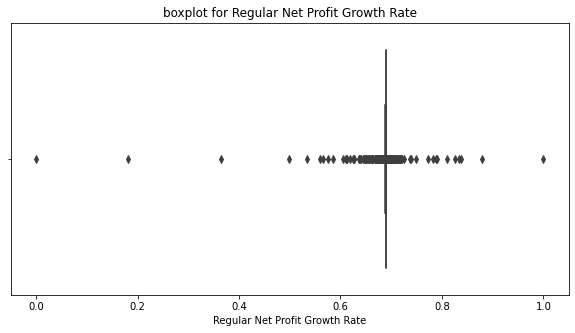

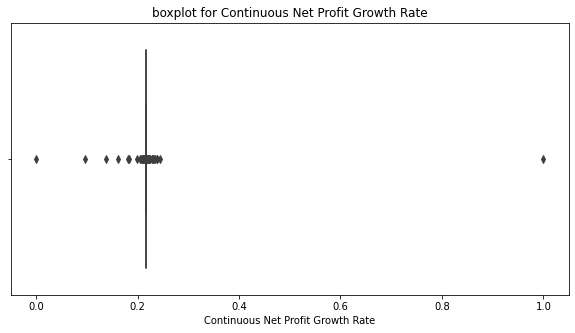

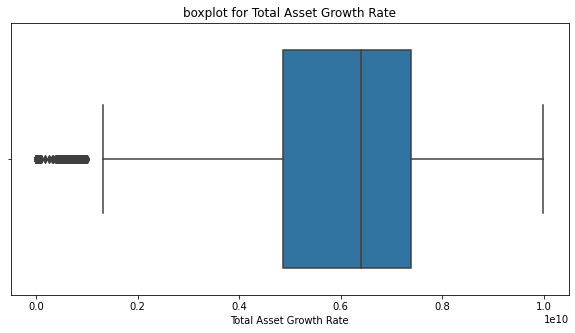

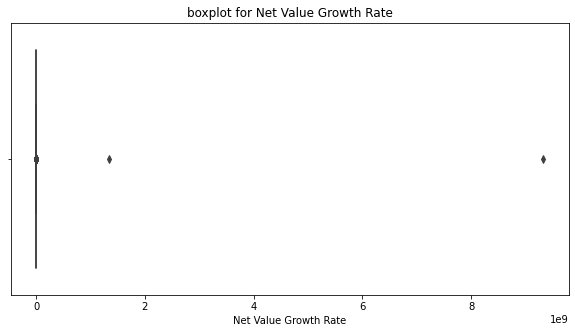

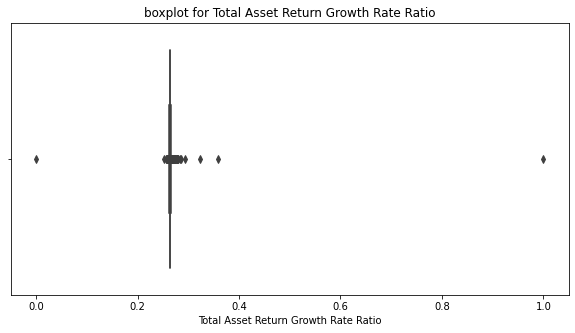

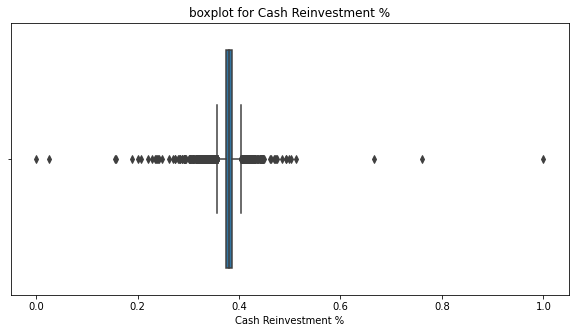

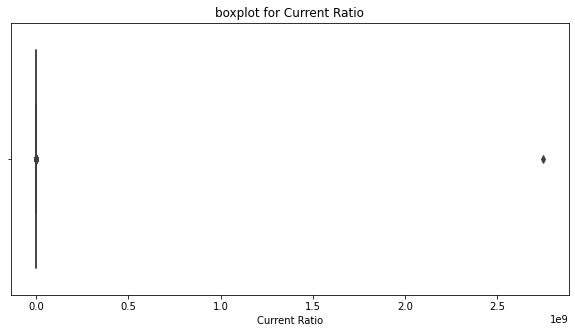

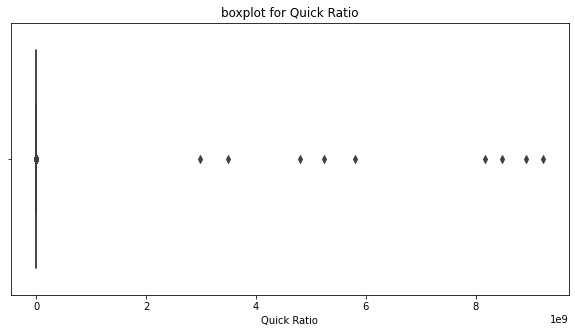

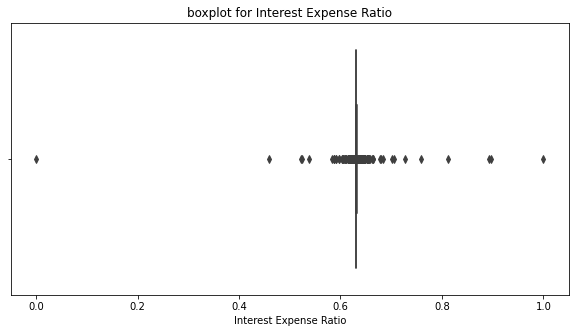

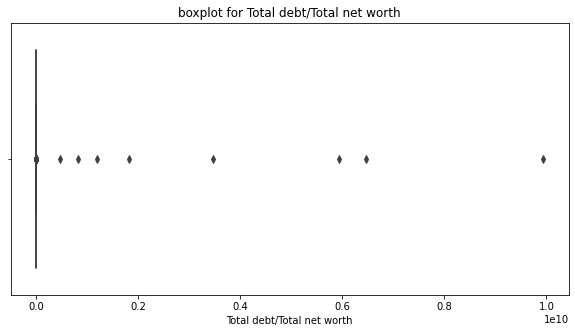

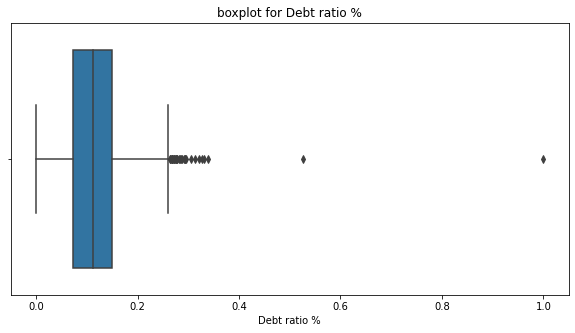

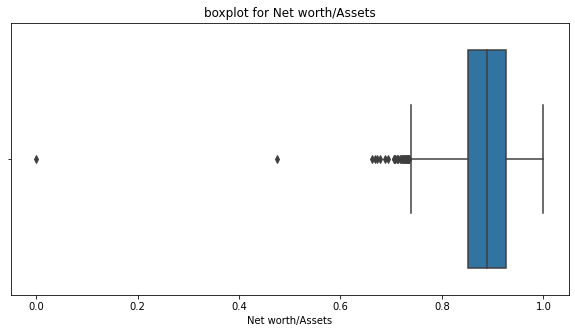

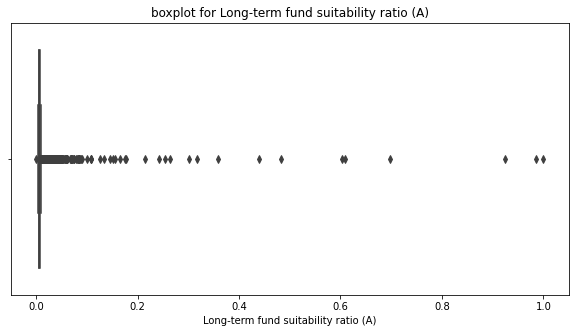

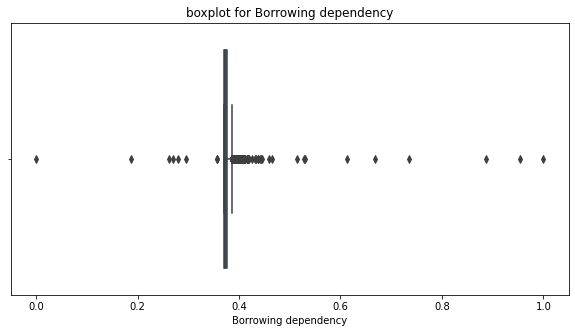

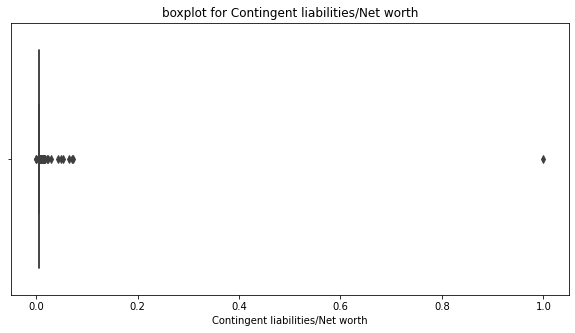

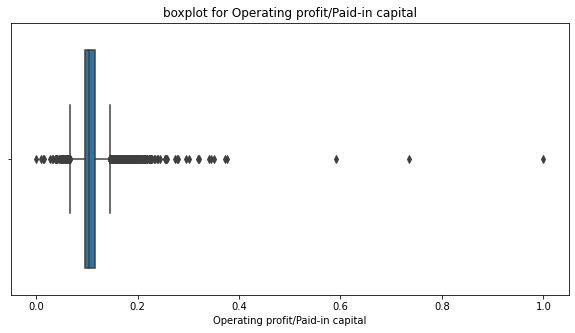

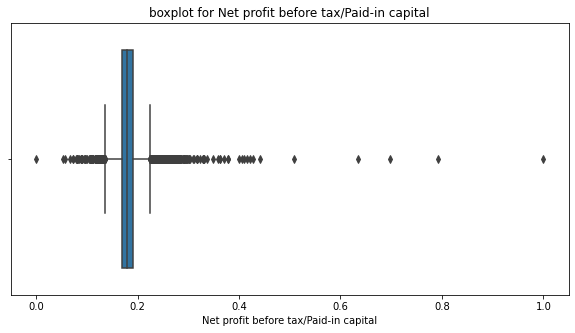

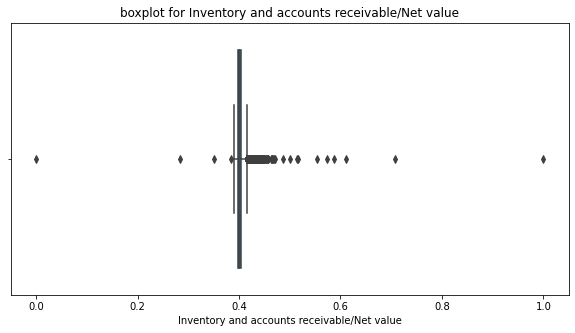

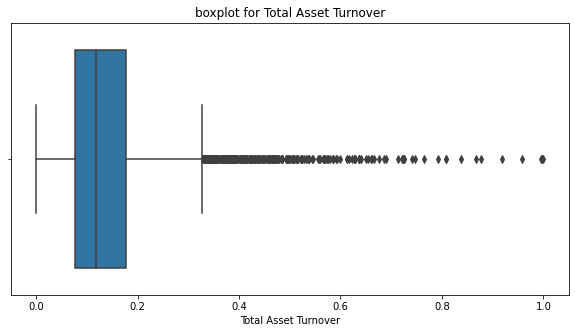

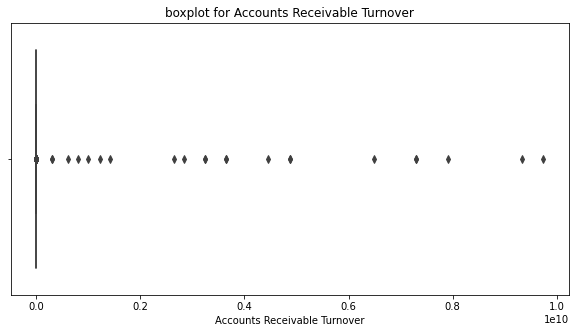

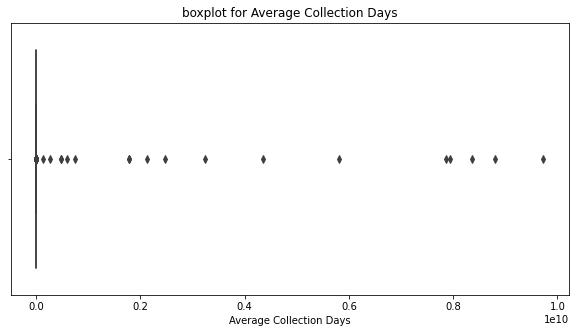

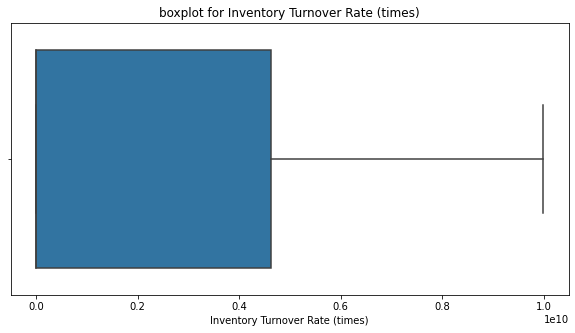

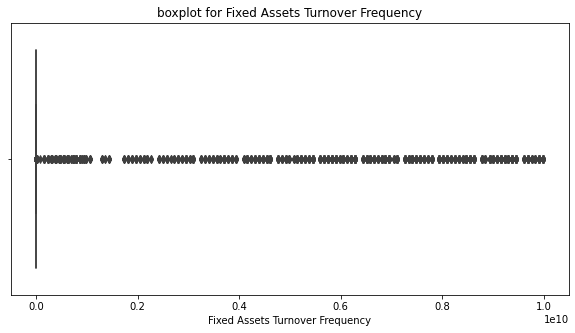

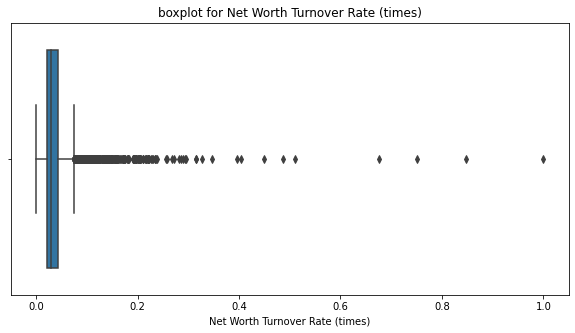

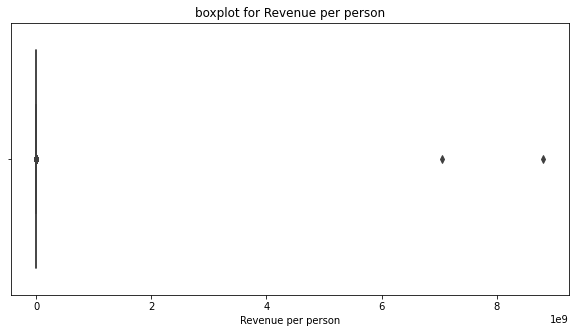

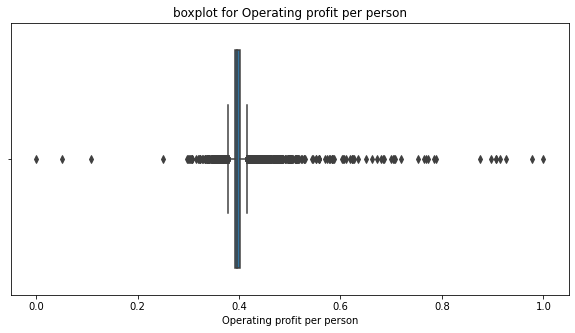

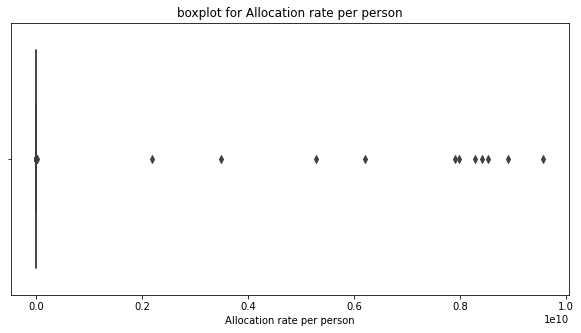

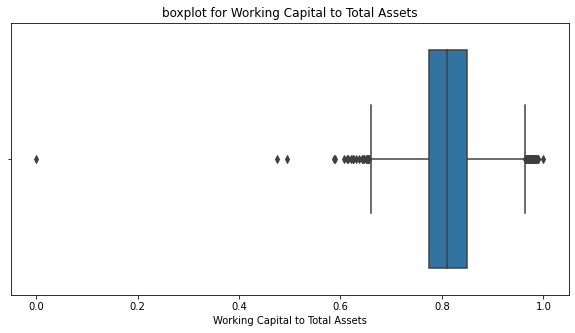

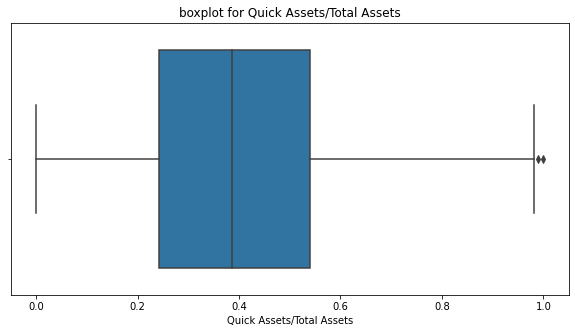

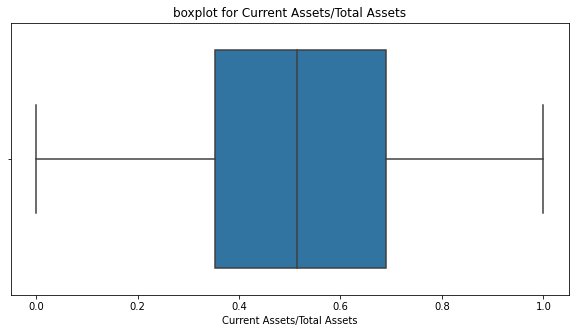

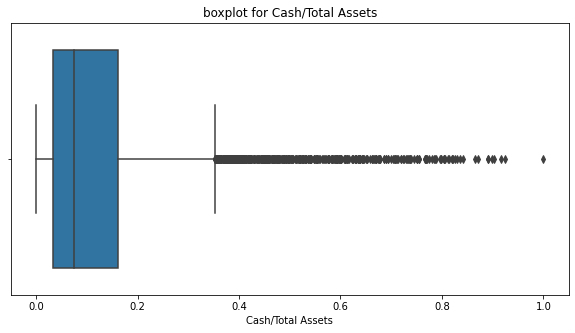

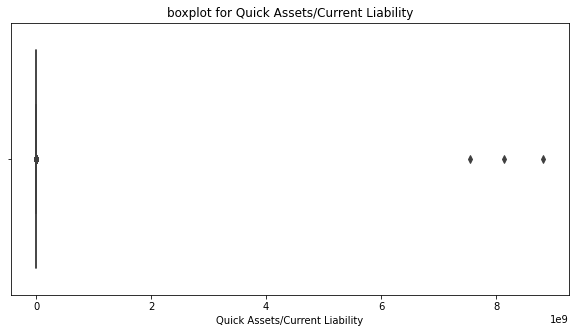

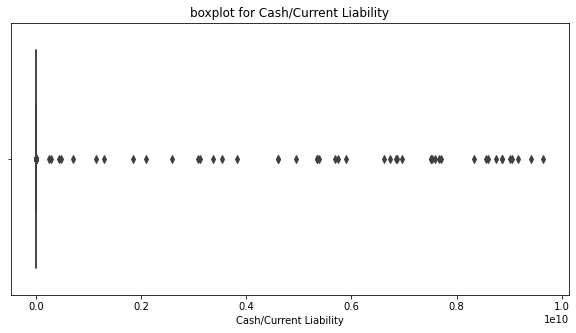

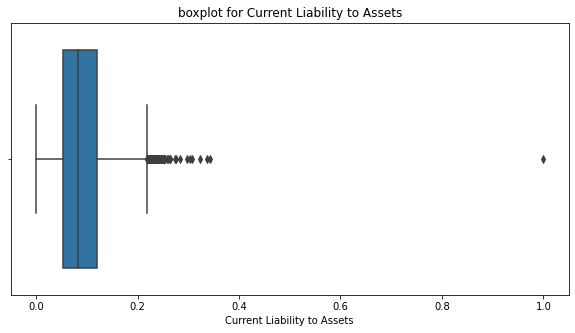

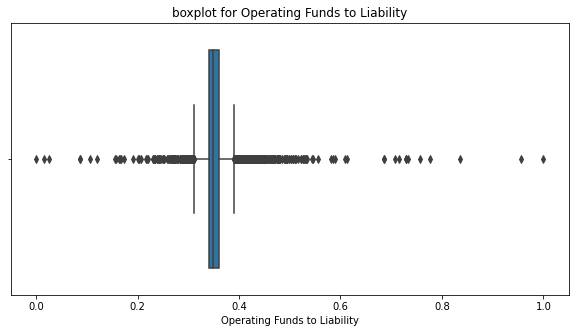

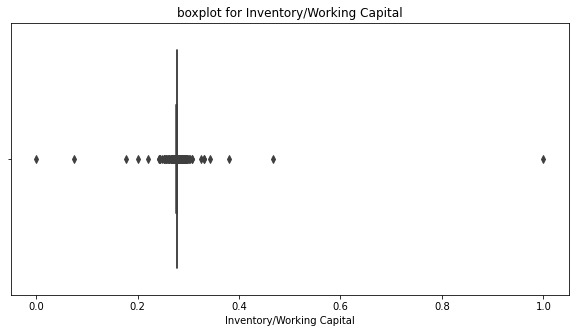

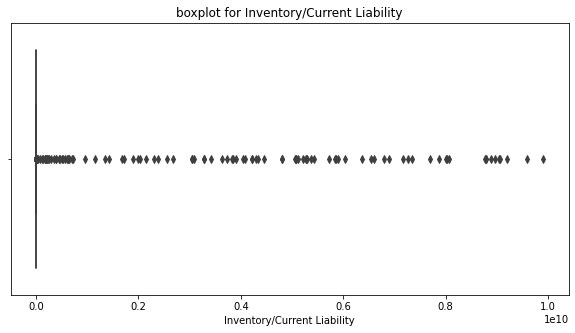

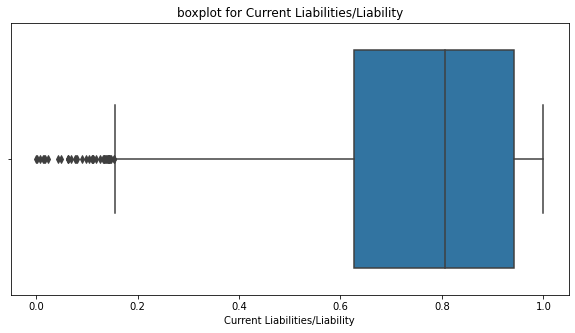

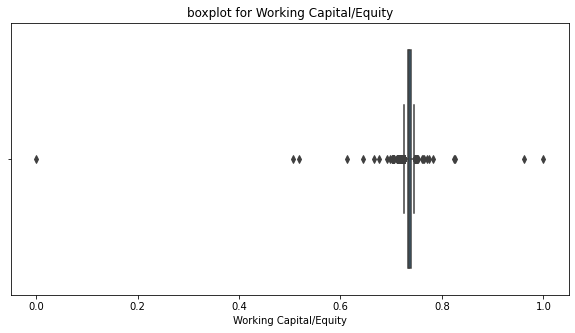

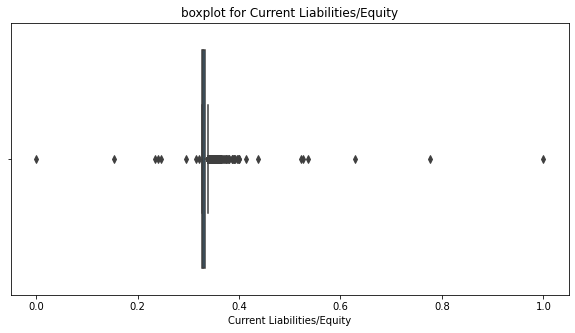

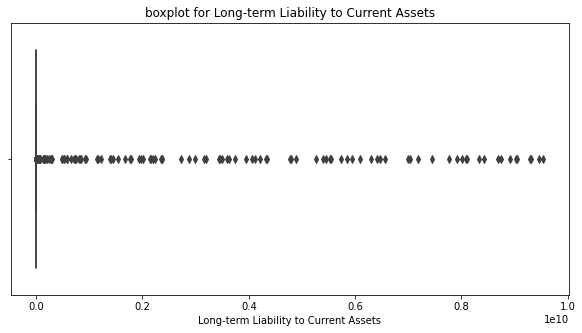

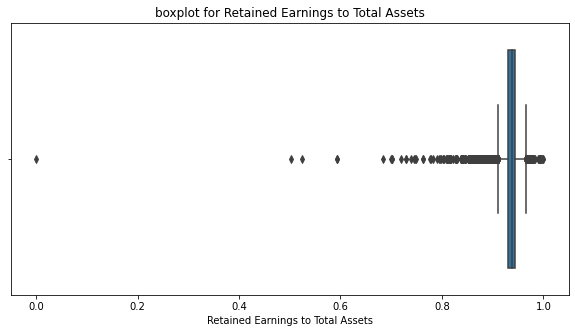

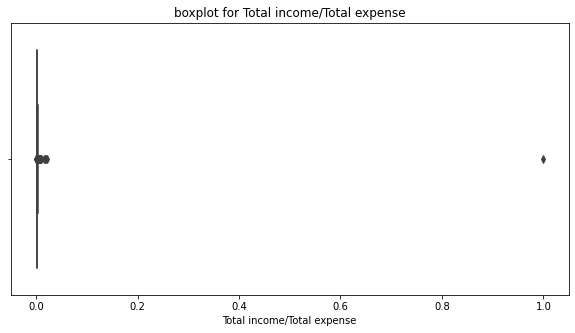

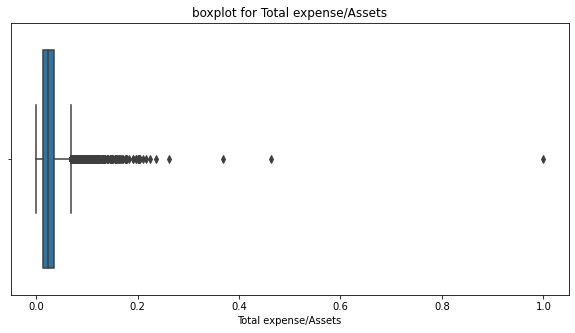

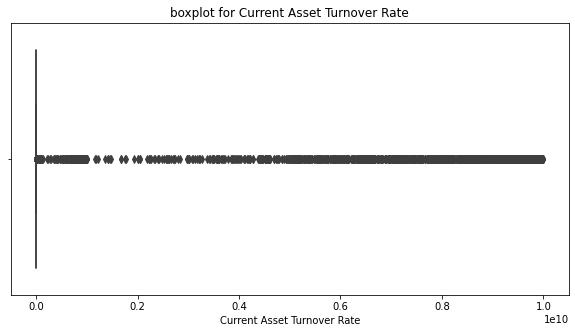

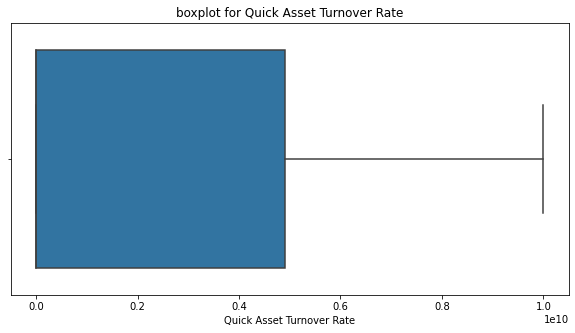

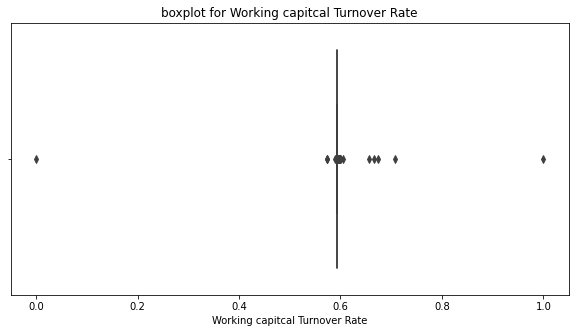

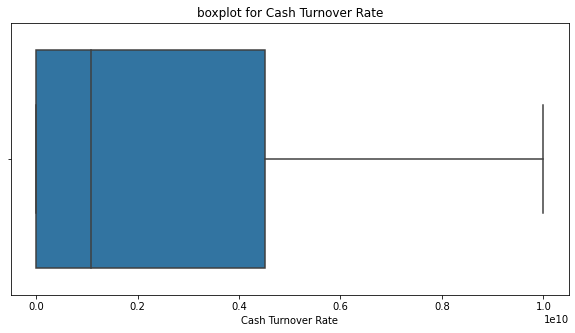

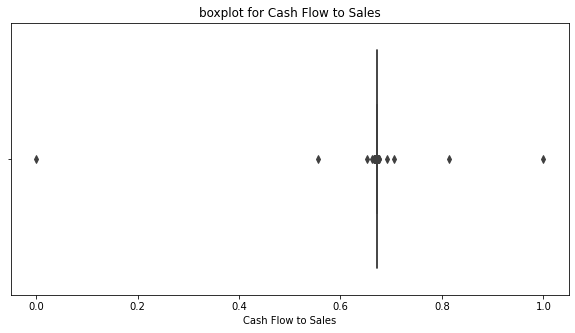

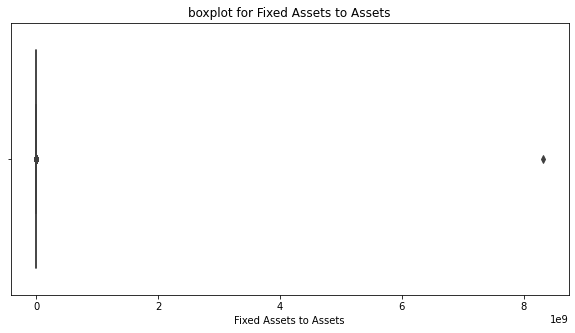

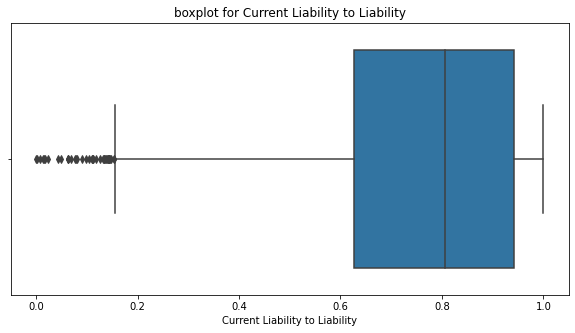

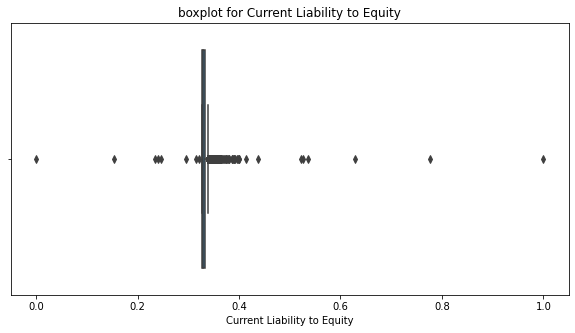

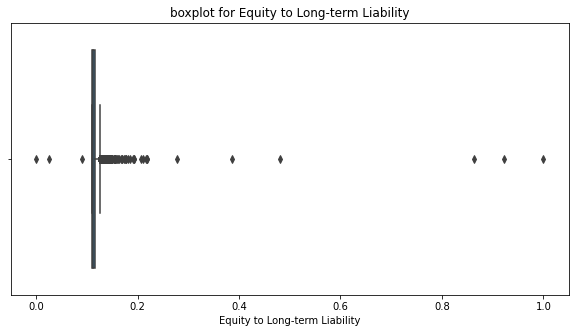

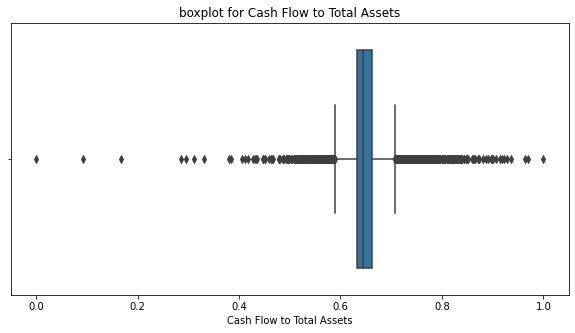

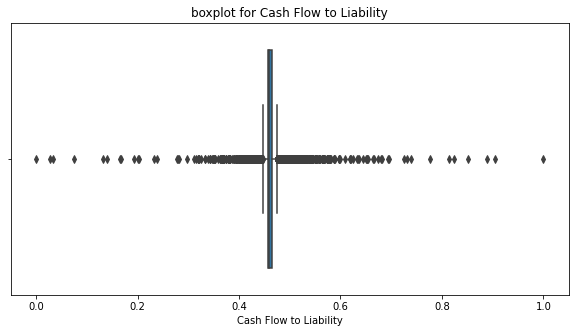

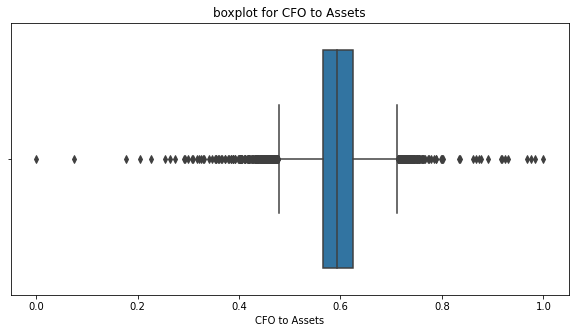

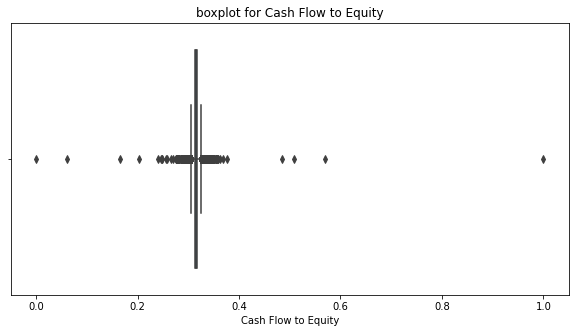

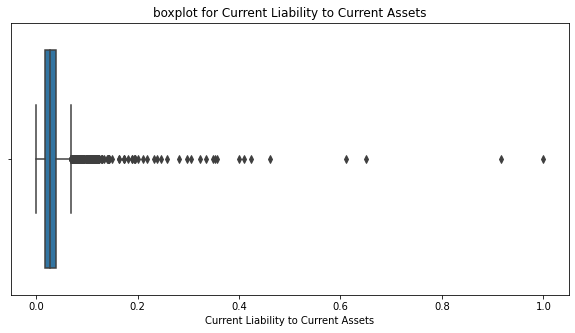

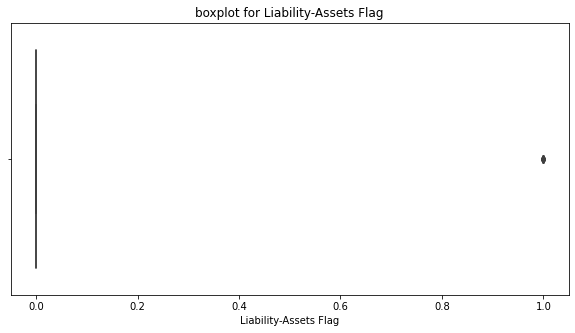

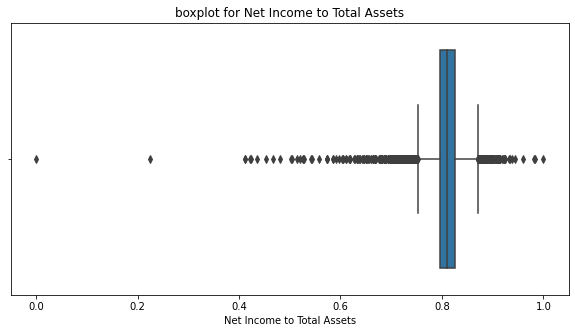

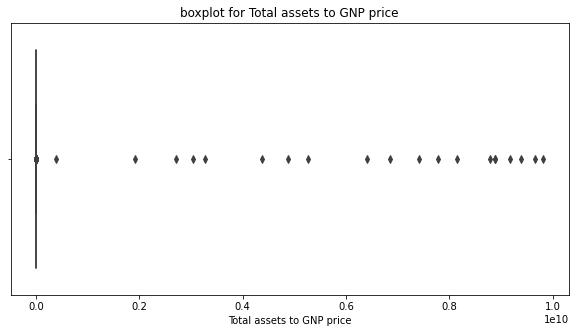

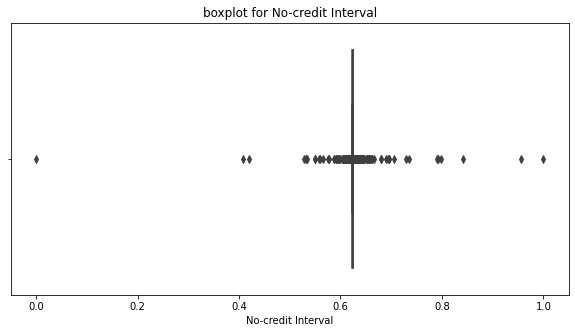

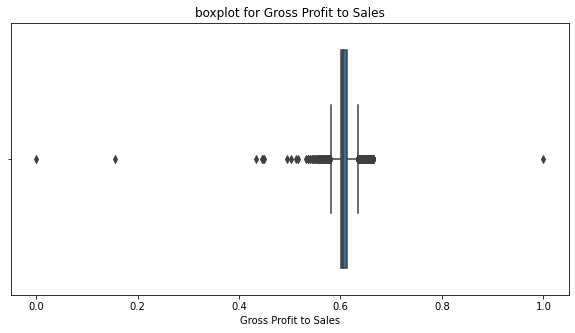

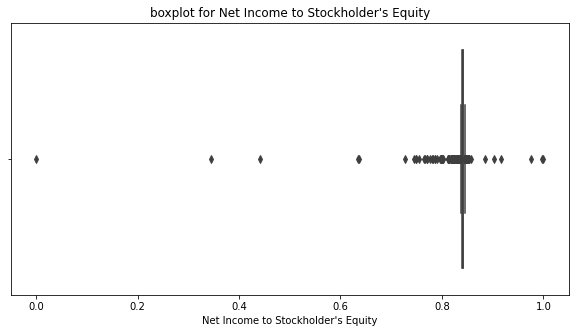

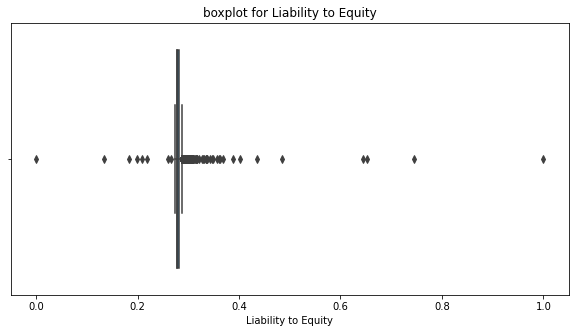

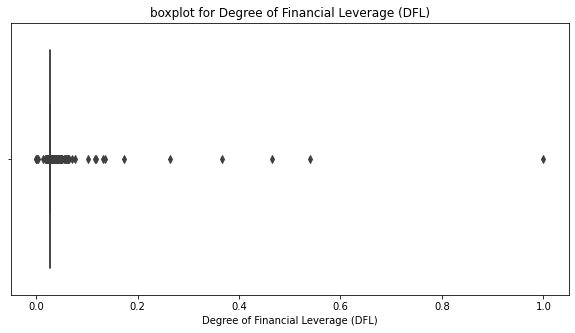

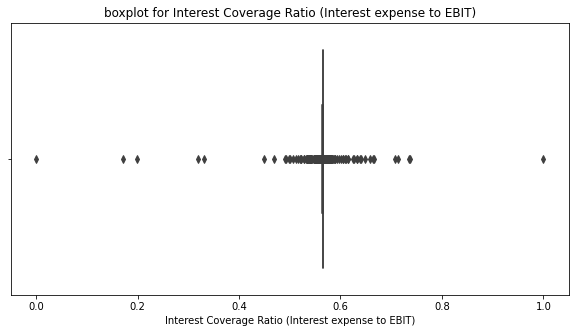

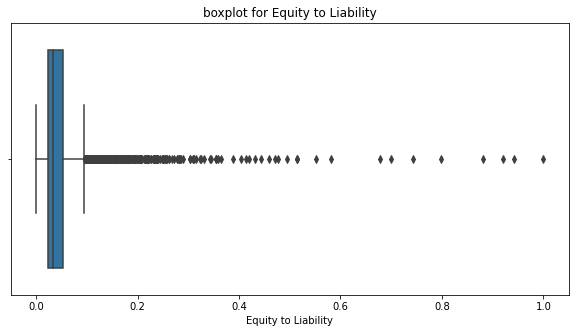

In [ ]:
box_plotter(companies)

Box plots help us understand the percentile wise distribution of the underlying variable. In this regard, box plots have been plotted to understand the same.

From the abox plots it is clear that most features have considerable amount of outliers in them.

#### Chart - 3
Bivariate Analysis:
Let us now perform bivariate analysis by plotting scatter plot and look at the insights

In [ ]:
# Scatter plot visualization code
def scatter_plotter(data_set, target_var):
  '''This function takes data set and target variable as input and plots scatter plot with respect to target variables'''
  #target_var= str(target)
  for feature in list(set(data_set.columns)-{target_var}):
    sns.scatterplot(data_set[feature], data_set[target_var])
    plt.show()

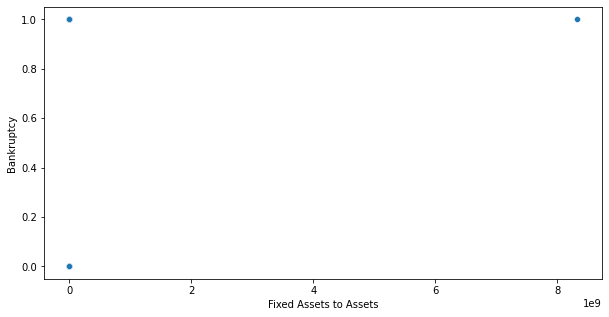

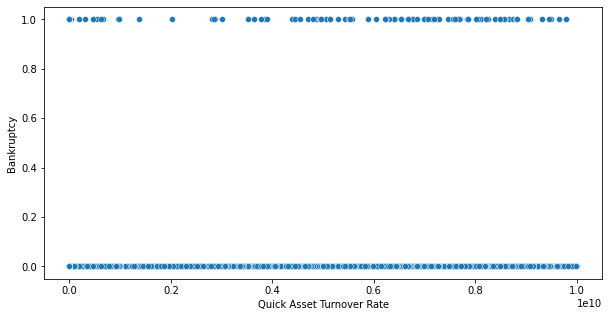

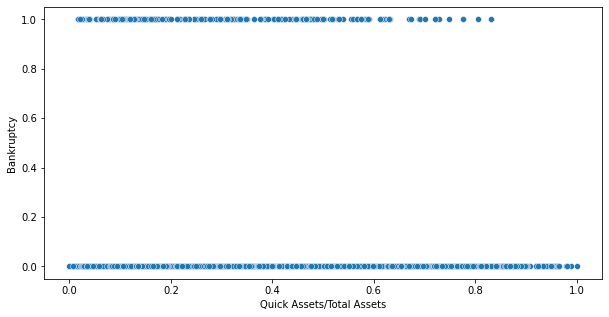

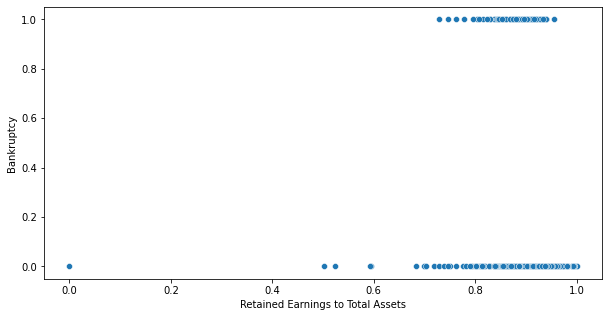

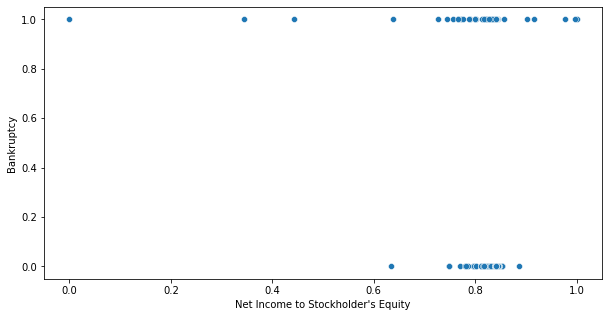

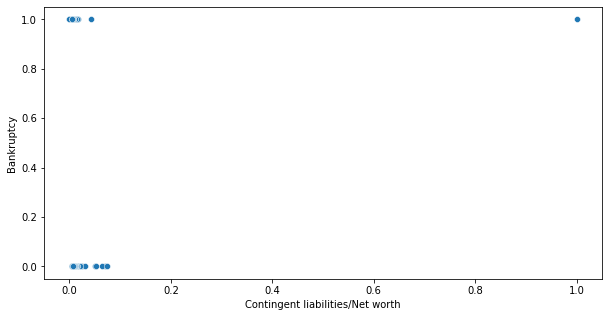

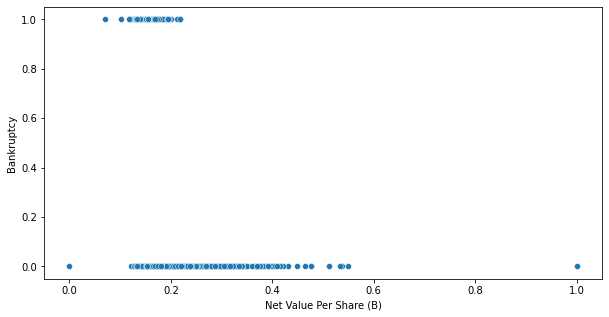

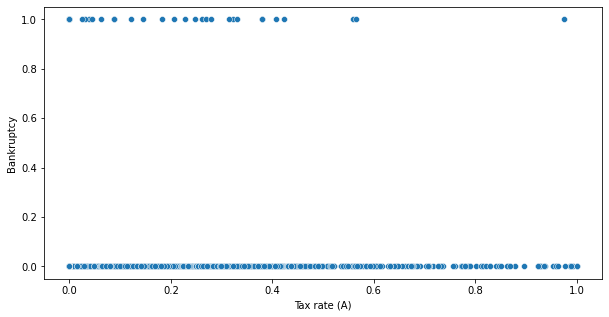

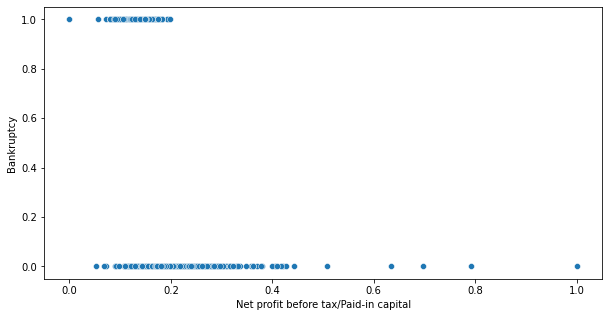

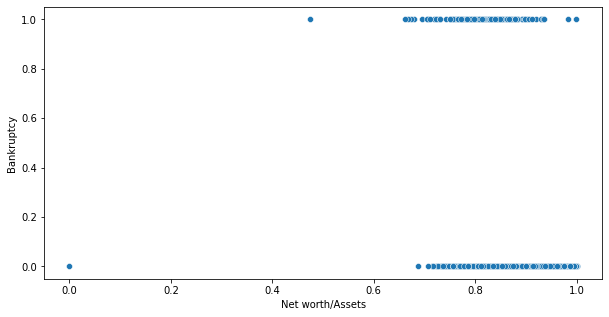

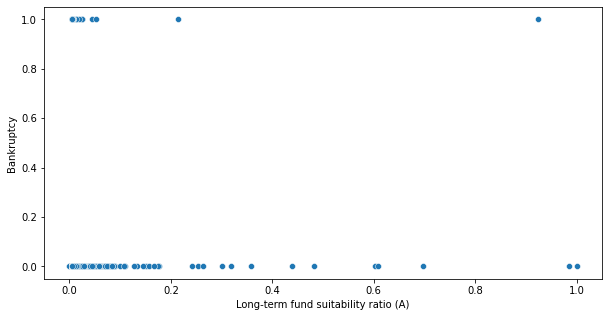

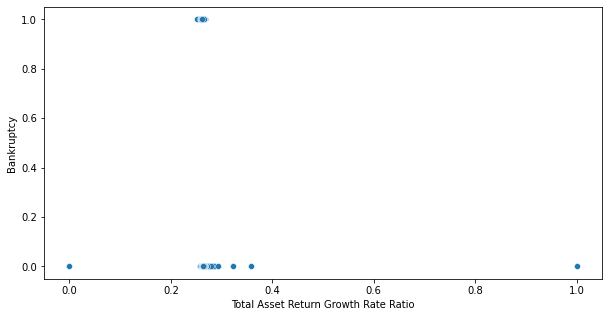

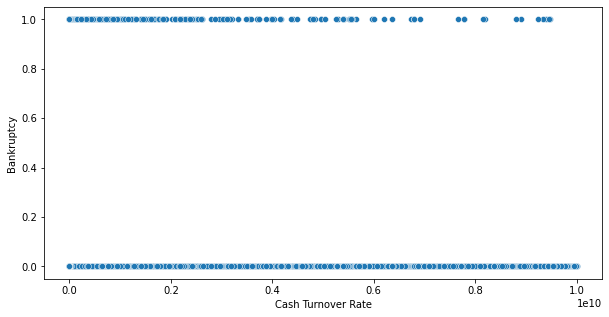

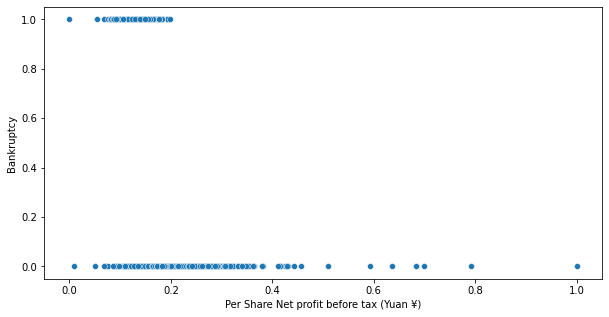

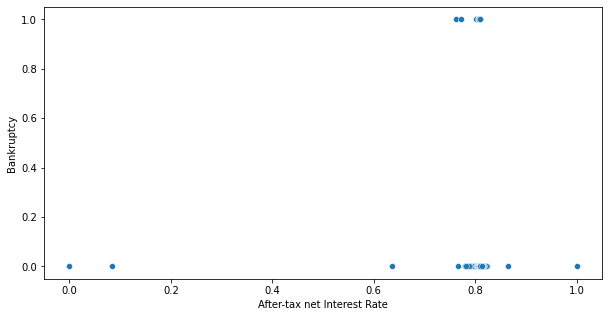

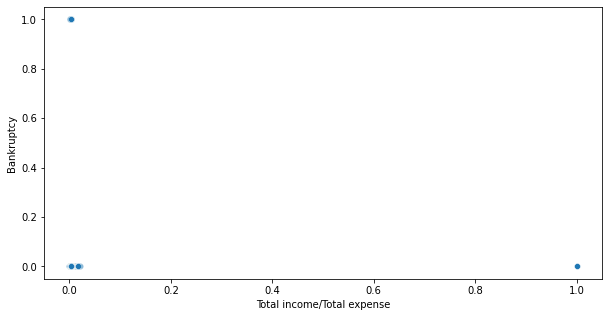

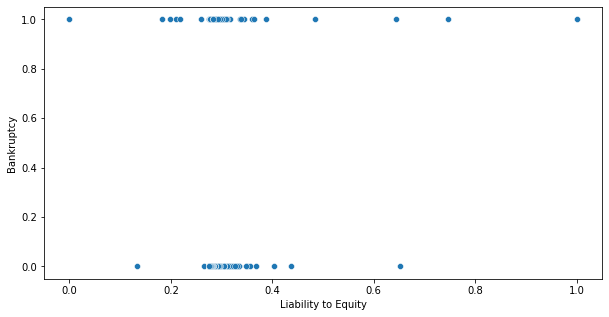

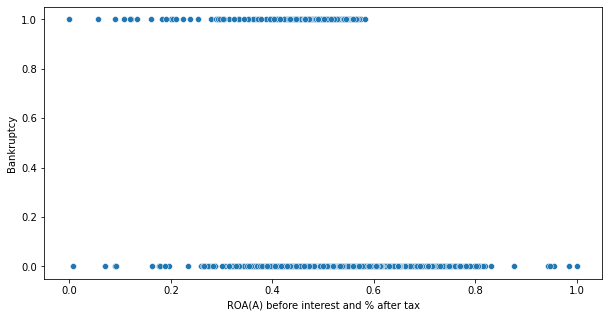

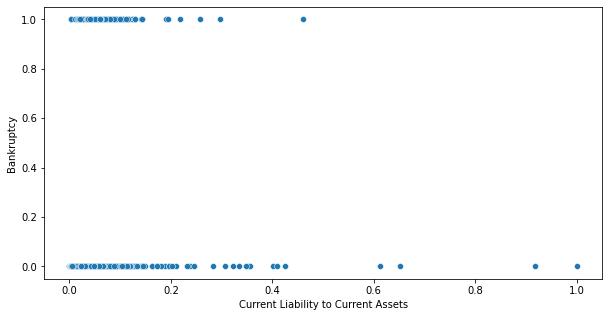

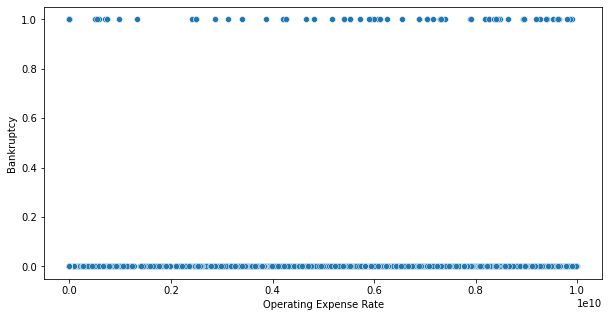

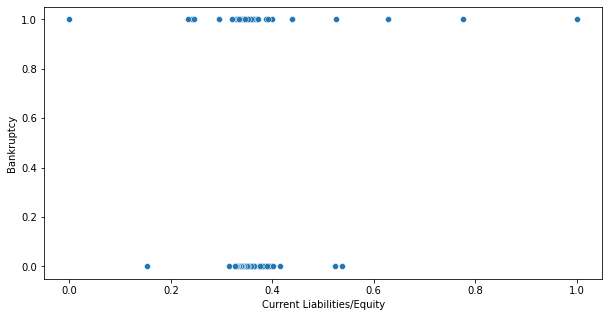

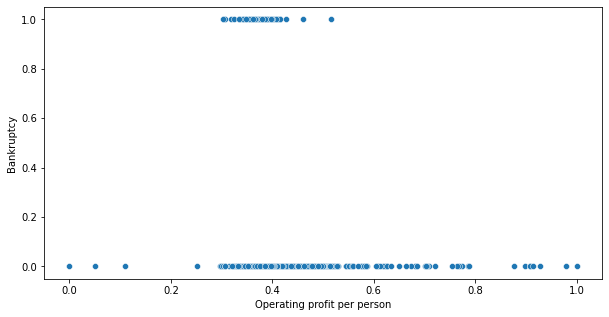

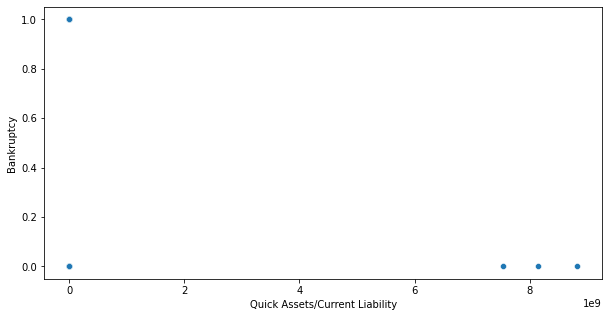

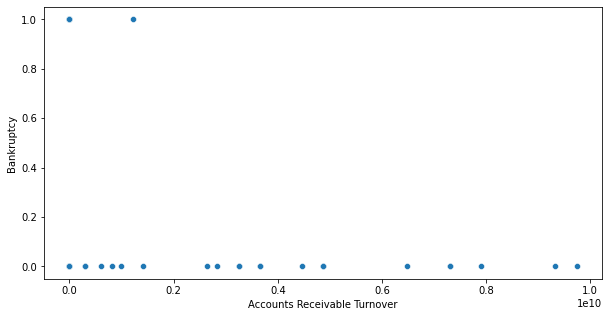

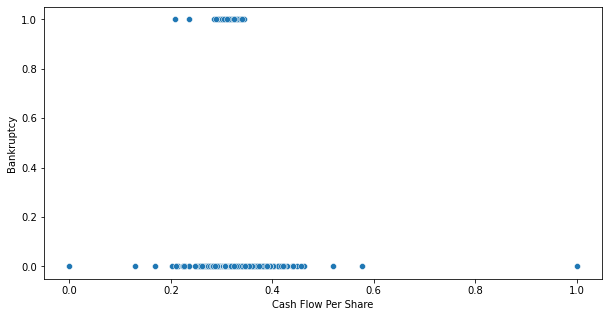

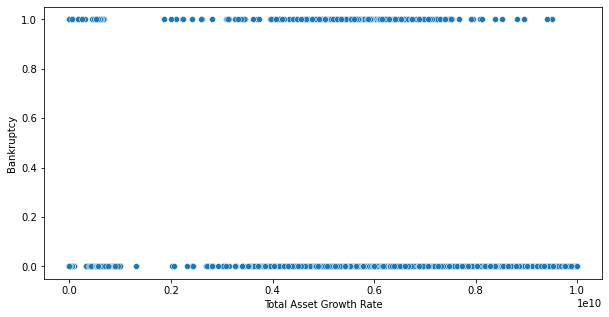

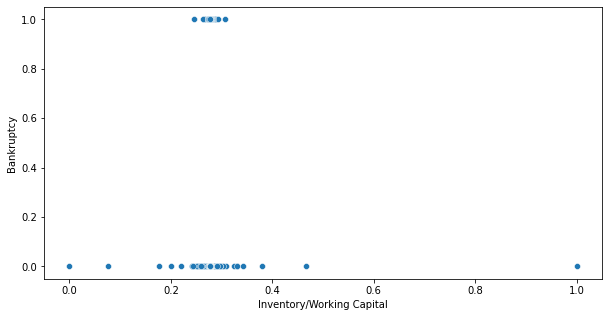

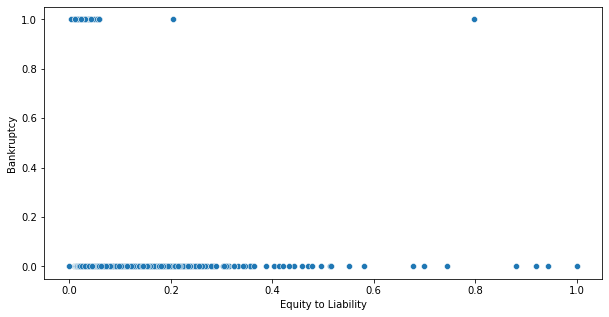

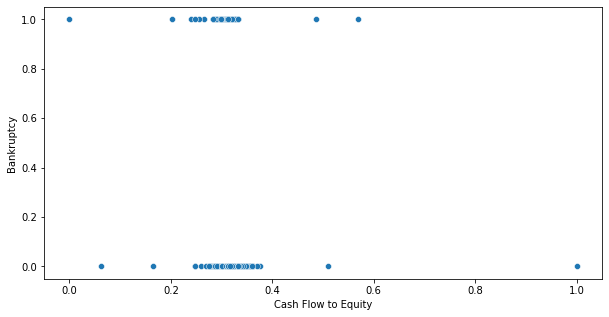

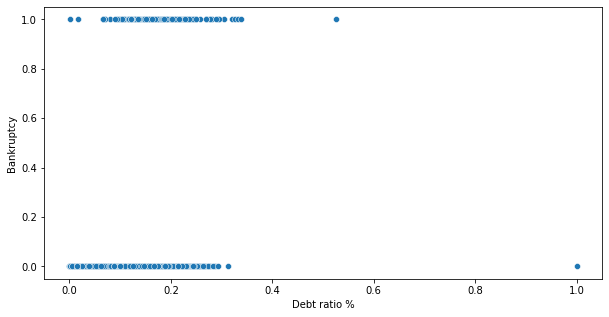

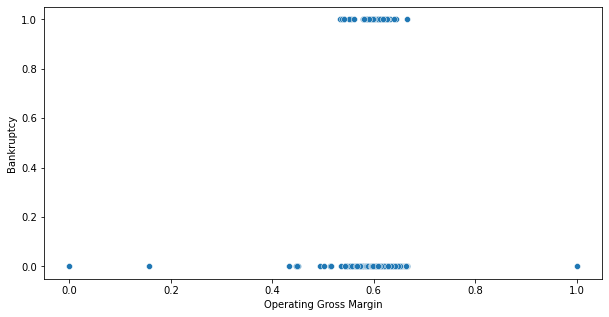

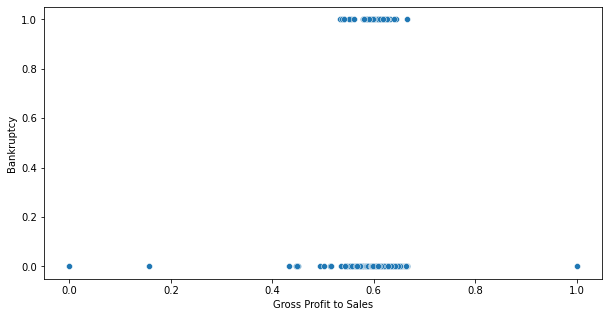

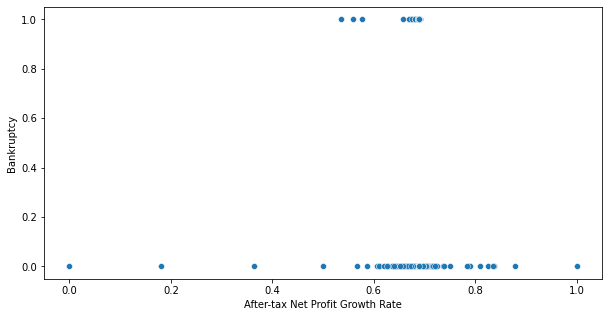

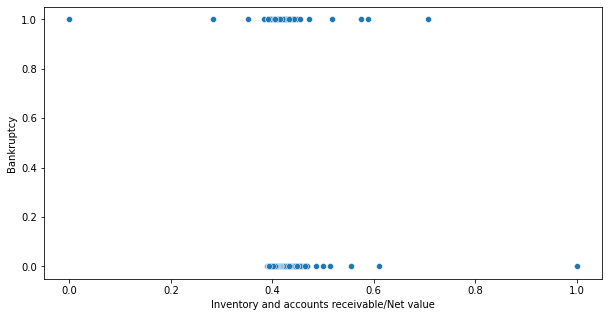

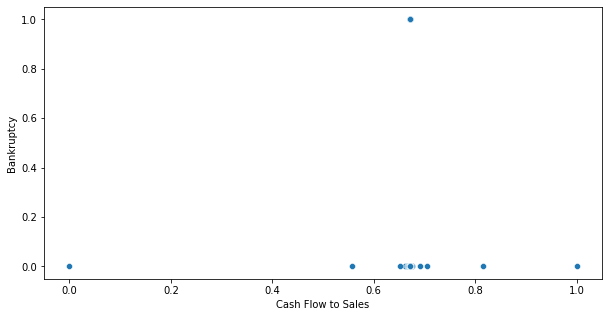

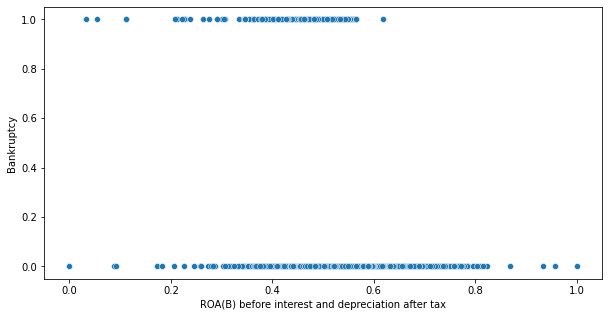

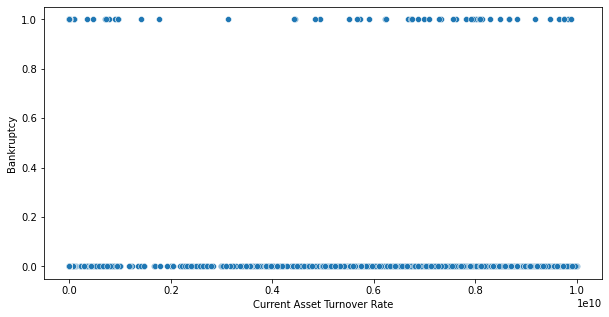

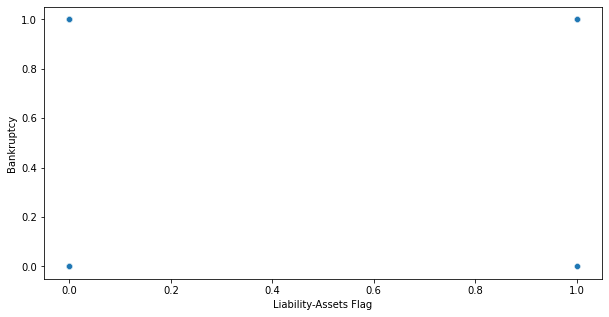

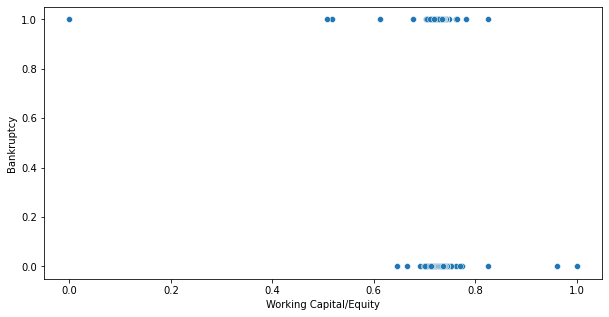

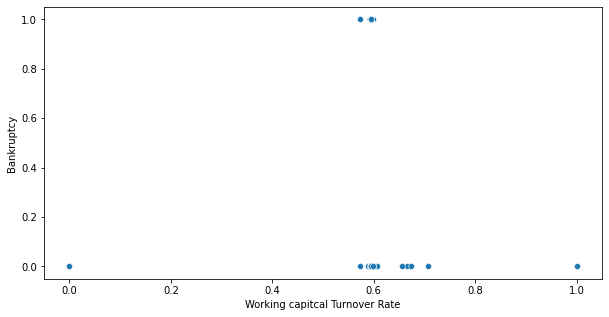

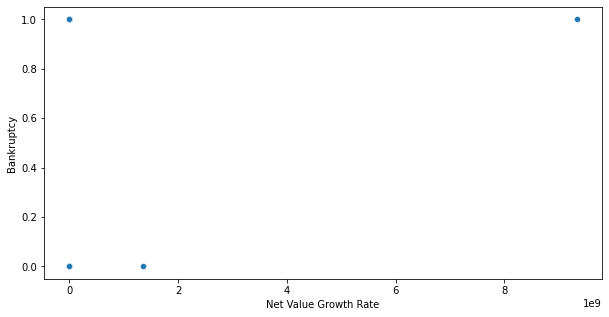

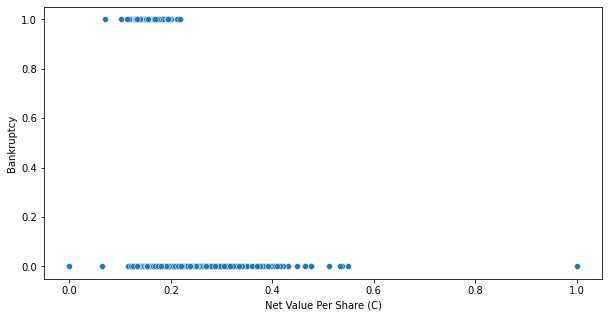

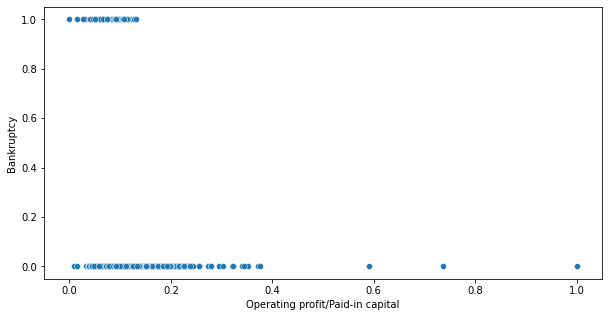

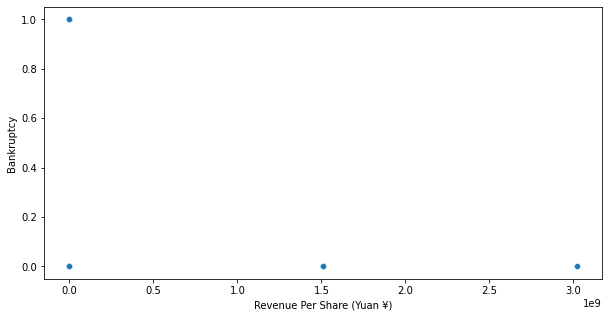

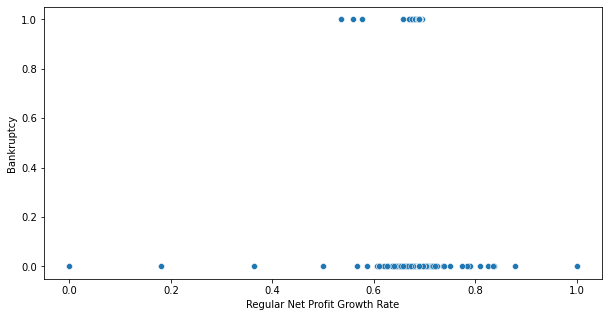

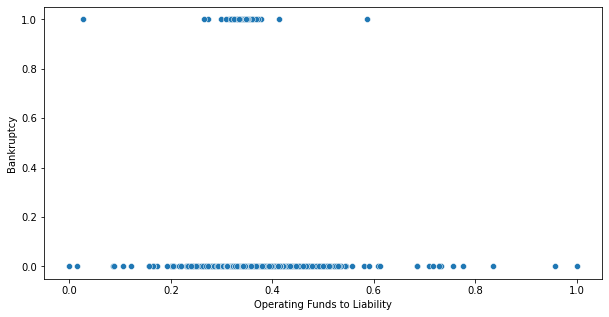

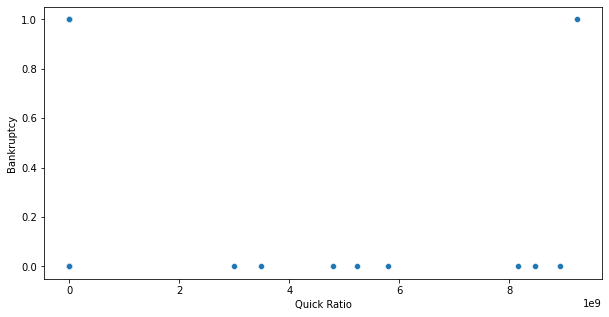

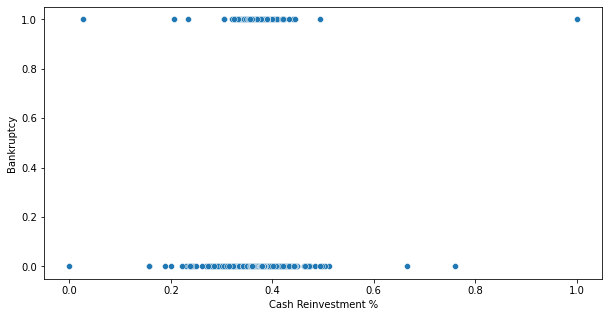

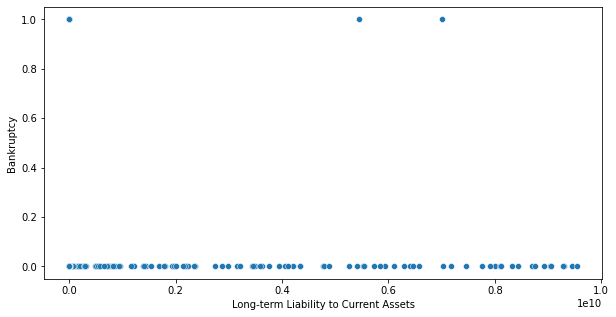

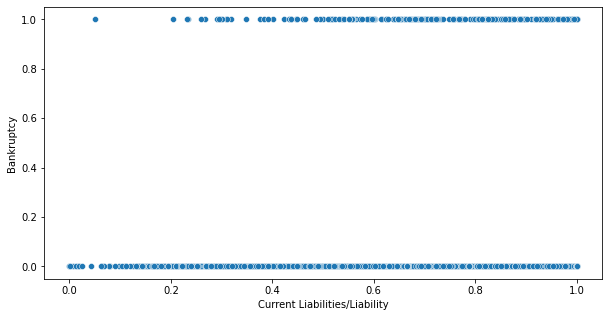

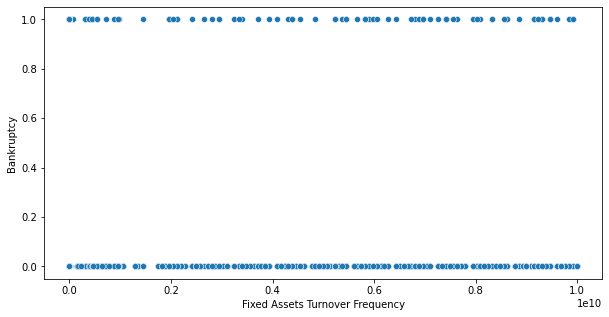

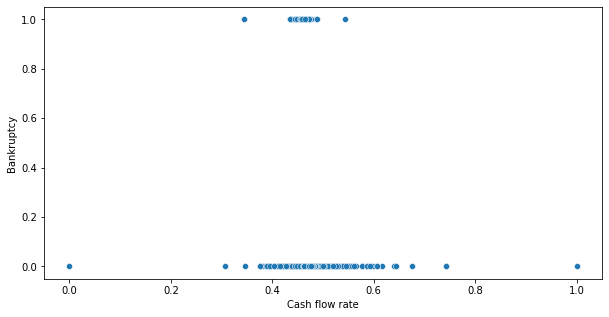

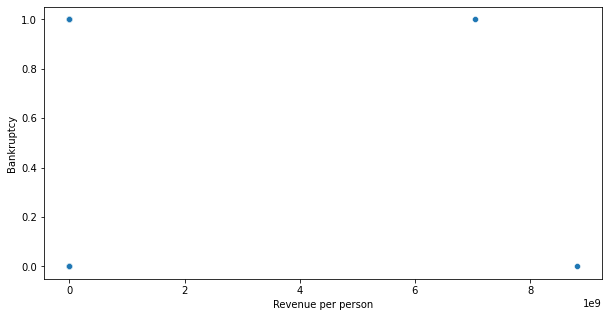

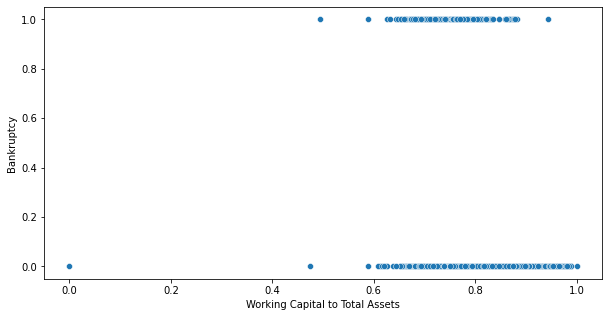

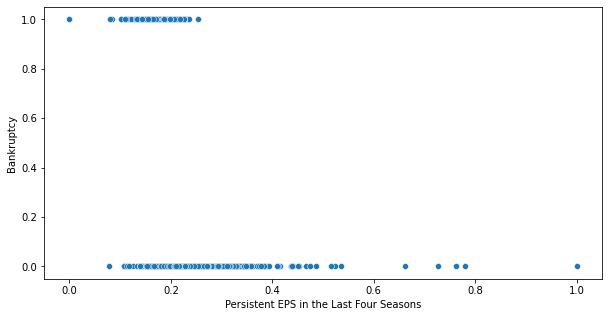

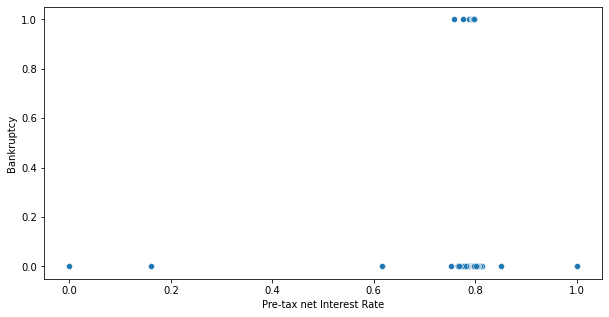

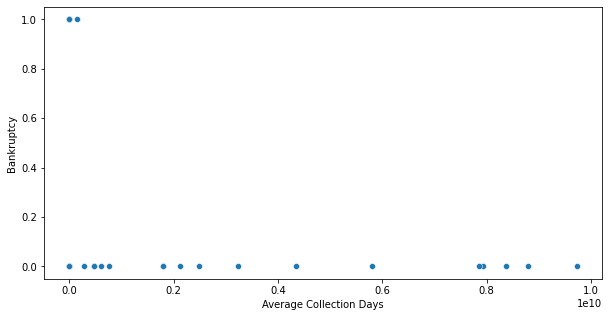

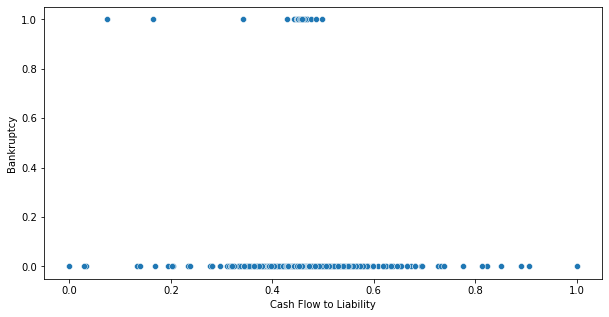

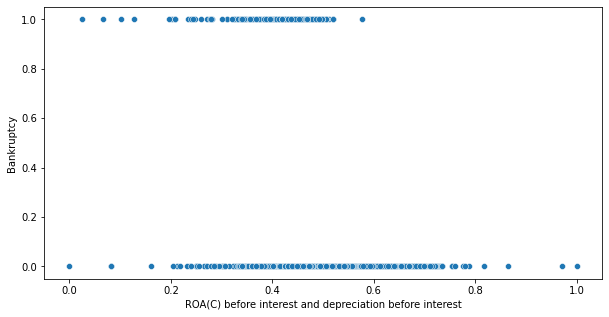

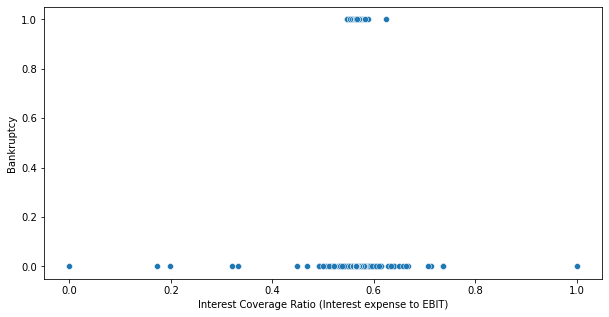

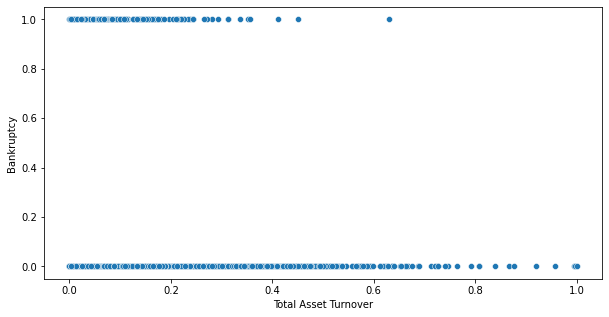

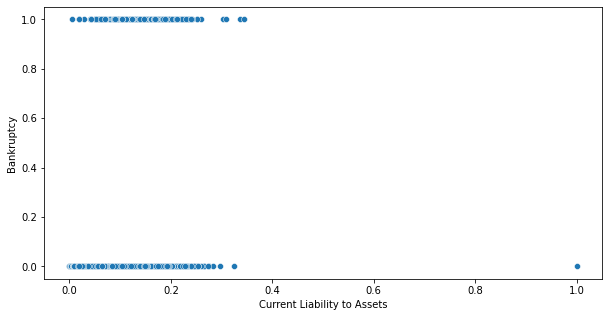

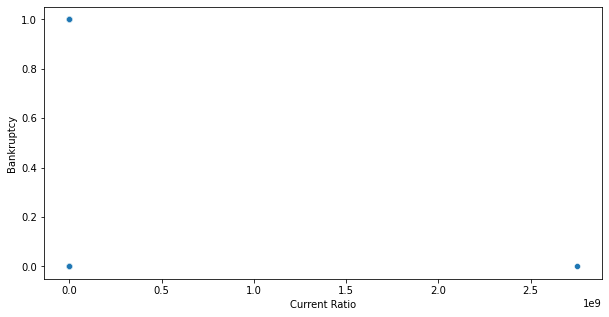

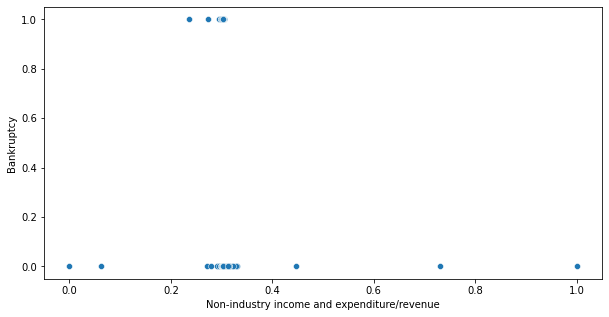

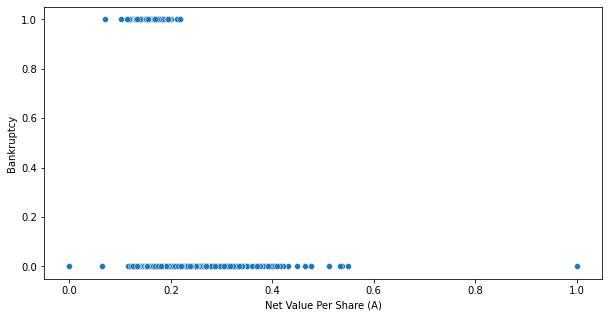

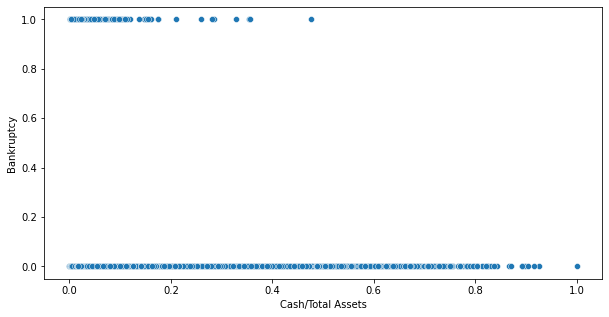

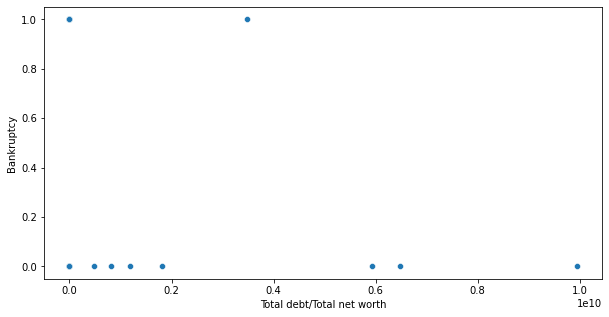

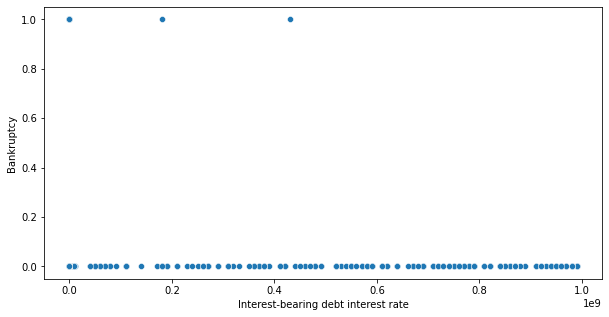

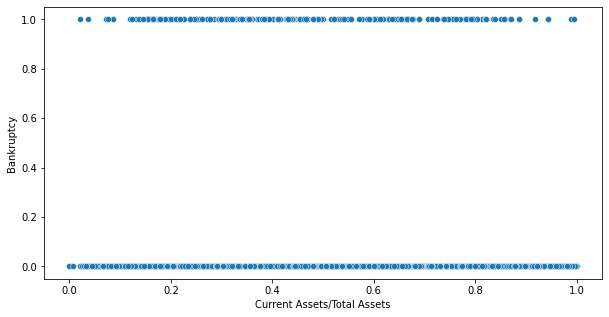

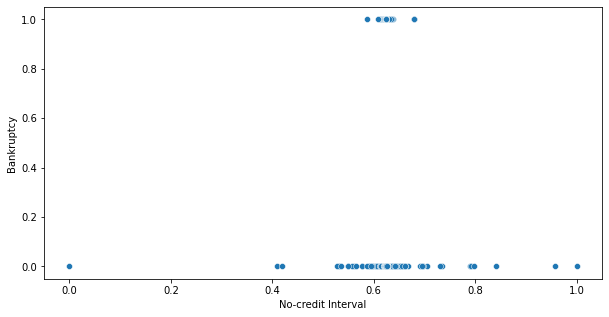

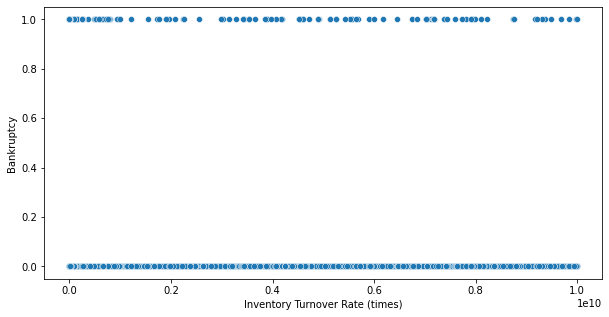

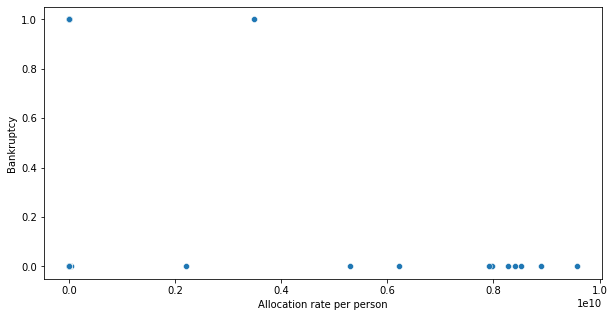

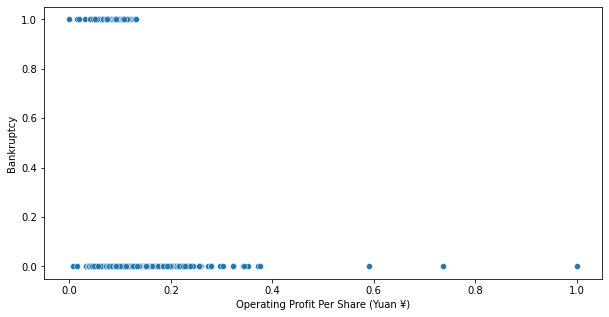

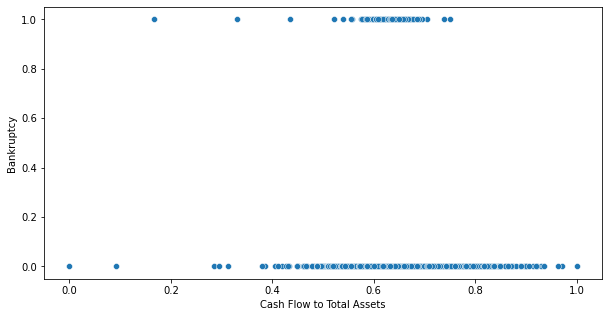

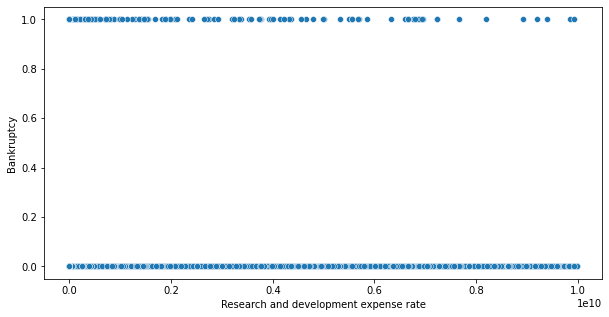

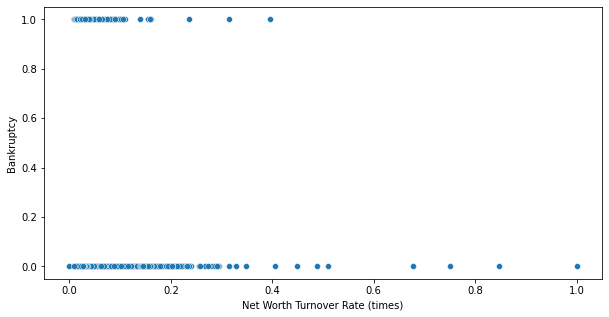

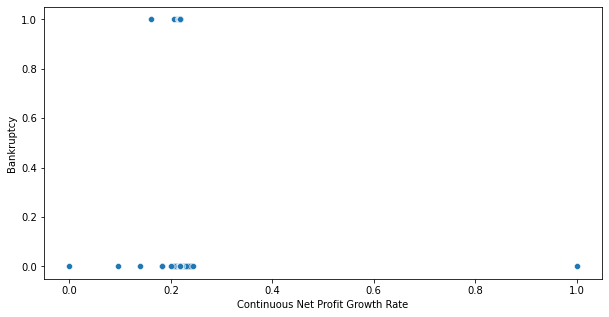

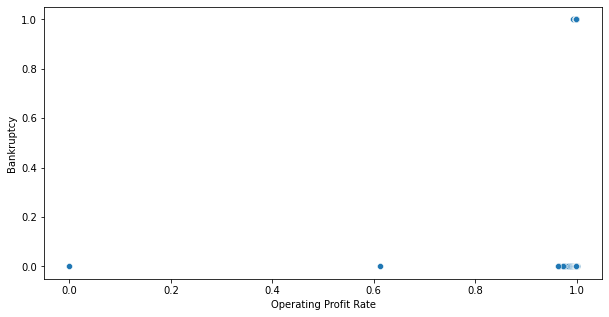

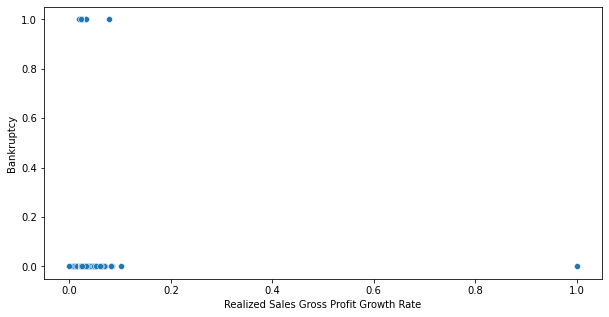

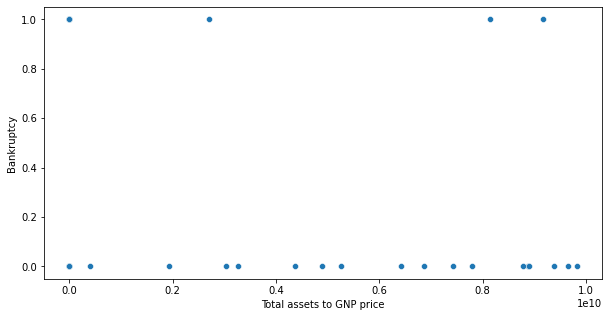

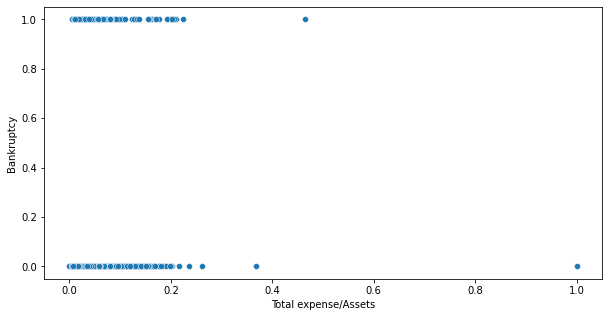

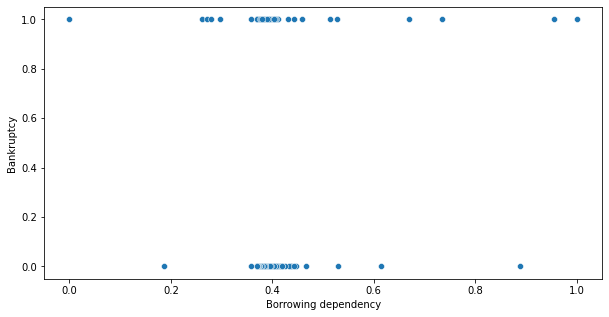

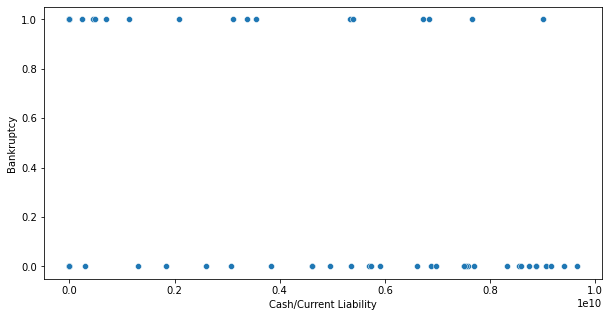

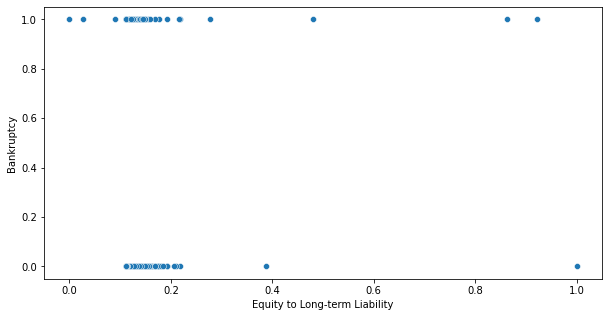

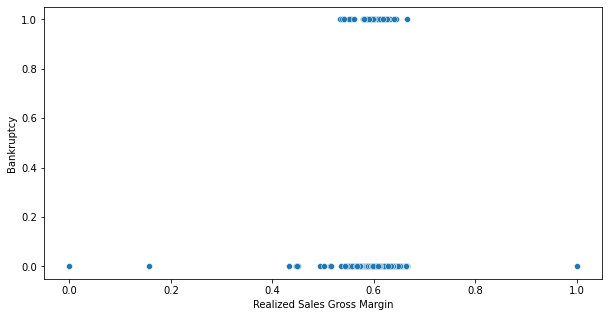

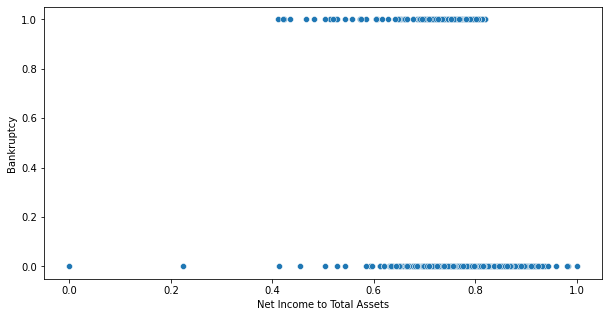

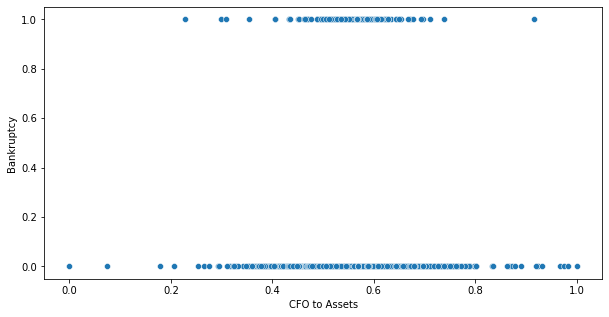

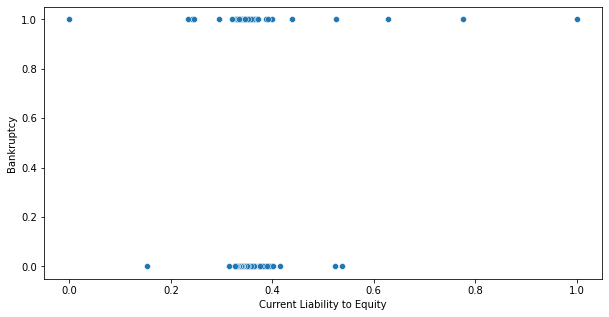

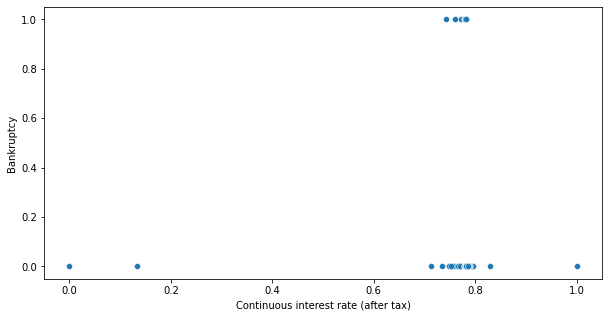

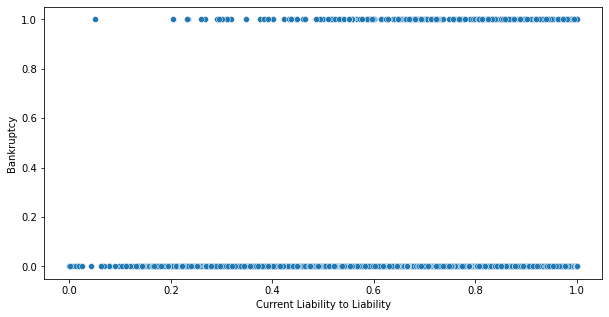

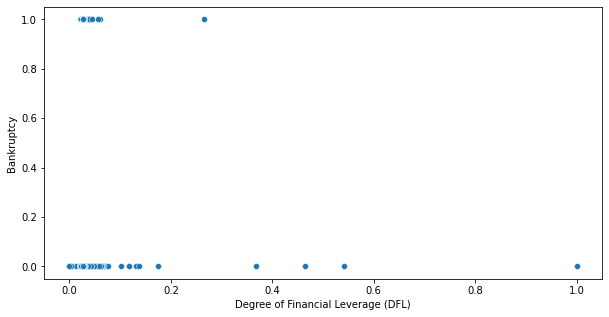

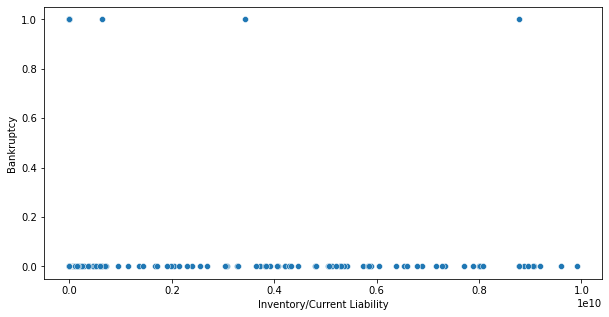

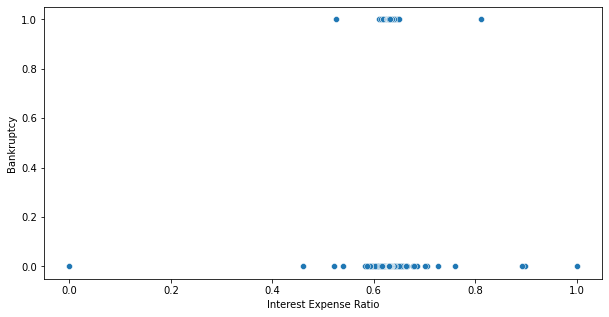

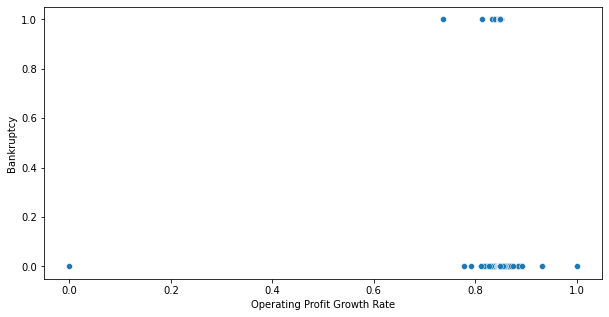

In [ ]:
scatter_plotter(companies, 'Bankruptcy')

Scatter plots best describe the distribution of a variable with respect to target variable.

From the above scatter plots, it is clear that majority of the variables are continuous while others are descrete with respect to our target variable Bankruptcy.

#### Chart - 4
Let us now perform multivariate analysis using Correlation heatmap

In [ ]:
# Correlation Heatmap visualization code
pd.set_option('display.max_rows', None)            #Plots all the rows
companies.corr()                                   #Calculates Correlation Matrix

Bankruptcy  \
Bankruptcy                                            1.000000   
ROA(C) before interest and depreciation before ...   -0.260807   
ROA(A) before interest and % after tax               -0.282941   
ROA(B) before interest and depreciation after tax    -0.273051   
Operating Gross Margin                               -0.100043   
Realized Sales Gross Margin                          -0.099445   
Operating Profit Rate                                -0.000230   
Pre-tax net Interest Rate                            -0.008517   
After-tax net Interest Rate                          -0.008857   
Non-industry income and expenditure/revenue          -0.016593   
Continuous interest rate (after tax)                 -0.008395   
Operating Expense Rate                               -0.006083   
Research and development expense rate                -0.024232   
Cash flow rate                                       -0.072356   
Interest-bearing debt interest rate                  -0.023063   
Tax rate (A)                                         -0.109706   
Net Value Per Share (B)                              -0.165399   
Net Value Per Share (A)                              -0.165465   
Net Value Per Share (C)                              -0.164784   
Persistent EPS in the Last Four Seasons              -0.219560   
Cash Flow Per Share                                  -0.077516   
Revenue Per Share (Yuan ¥)                           -0.004692   
Operating Profit Per Share (Yuan ¥)                  -0.142051   
Per Share Net profit before tax (Yuan ¥)             -0.201395   
Realized Sales Gross Profit Growth Rate              -0.000458   
Operating Profit Growth Rate                         -0.015168   
After-tax Net Profit Growth Rate                     -0.037783   
Regular Net Profit Growth Rate                       -0.036820   
Continuous Net Profit Growth Rate                    -0.009401   
Total Asset Growth Rate                              -0.044431   
Net Value Growth Rate                                 0.065329   
Total Asset Return Growth Rate Ratio                 -0.016858   
Cash Reinvestment %                                  -0.051345   
Current Ratio                                        -0.002211   
Quick Ratio                                           0.025058   
Interest Expense Ratio                               -0.002681   
Total debt/Total net worth                            0.012314   
Debt ratio %                                          0.250161   
Net worth/Assets                                     -0.250161   
Long-term fund suitability ratio (A)                  0.016920   
Borrowing dependency                                  0.176543   
Contingent liabilities/Net worth                      0.070455   
Operating profit/Paid-in capital                     -0.141111   
Net profit before tax/Paid-in capital                -0.207857   
Inventory and accounts receivable/Net value           0.075278   
Total Asset Turnover                                 -0.067915   
Accounts Receivable Turnover                         -0.004754   
Average Collection Days                              -0.006556   
Inventory Turnover Rate (times)                      -0.001376   
Fixed Assets Turnover Frequency                       0.072818   
Net Worth Turnover Rate (times)                       0.021089   
Revenue per person                                    0.039718   
Operating profit per person                          -0.092842   
Allocation rate per person                            0.002829   
Working Capital to Total Assets                      -0.193083   
Quick Assets/Total Assets                            -0.086382   
Current Assets/Total Assets                          -0.044823   
Cash/Total Assets                                    -0.100130   
Quick Assets/Current Liability                       -0.003823   
Cash/Current Liability                                0.077921   
Current Liability to Asset

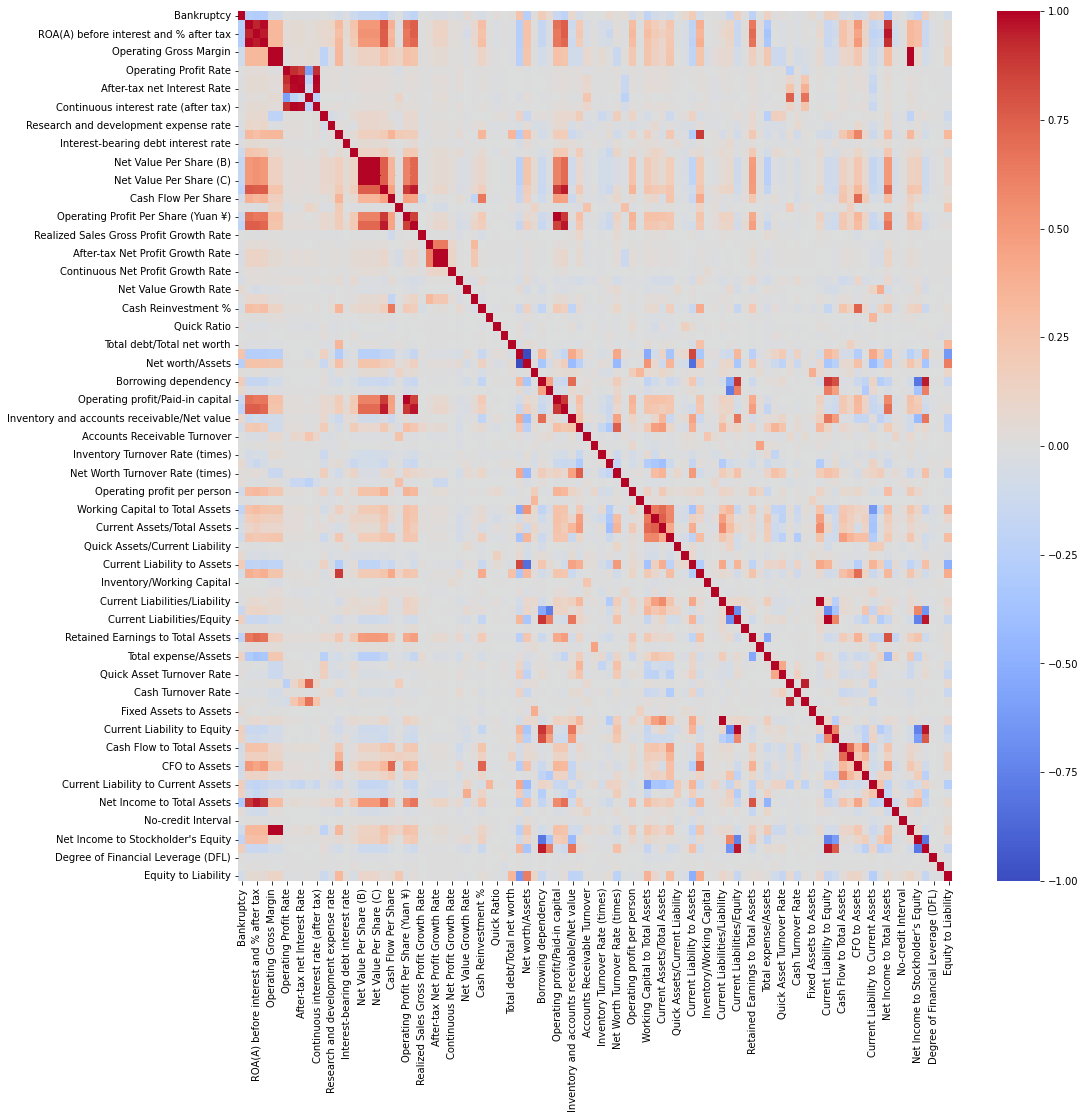

In [ ]:
#PLotting the correlation matrix
plt.rcParams['figure.figsize']=(16,16)
correlation= companies.corr()
sns.heatmap(correlation, cmap='coolwarm')

In [ ]:
#checking for features that exhibit correlation more than 0.9
threshold= 0.9
correlated_features={}
for i in range(len(correlation.columns)):
  for j in range(i):
    if abs(correlation.iloc[i,j]) > threshold:
      correlated_features[correlation.columns[i]] = correlation.columns[j]

In [ ]:
#printing the dictionary
print(correlated_features)

{'ROA(A) before interest and % after tax': 'ROA(C) before interest and depreciation before interest', 'ROA(B) before interest and depreciation after tax': 'ROA(A) before interest and % after tax', 'Realized Sales Gross Margin': 'Operating Gross Margin', 'Pre-tax net Interest Rate': 'Operating Profit Rate', 'After-tax net Interest Rate': 'Pre-tax net Interest Rate', 'Continuous interest rate (after tax)': 'After-tax net Interest Rate', 'Net Value Per Share (A)': 'Net Value Per Share (B)', 'Net Value Per Share (C)': 'Net Value Per Share (A)', 'Per Share Net profit before tax (Yuan ¥)': 'Persistent EPS in the Last Four Seasons', 'Regular Net Profit Growth Rate': 'After-tax Net Profit Growth Rate', 'Net worth/Assets': 'Debt ratio %', 'Operating profit/Paid-in capital': 'Operating Profit Per Share (Yuan ¥)', 'Net profit before tax/Paid-in capital': 'Per Share Net profit before tax (Yuan ¥)', 'Cash Flow to Sales': 'Working capitcal Turnover Rate', 'Current Liability to Liability': 'Current L

It is well known that correlation heatmaps visually aid us in realising the correlation that exist between the variables in a dataset. Hence, a correlation heatmap is plotted

It is evident that several features are highly correlated. Thus, in order to obtain a dataset that is independent of these features correlation impacts, it is essential to treat the multicollinearity effectively.

As Mentioned above, with respect to treating the multicollinearity following measures can be implemented:


*   ROA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax and ROA(B) before interest and depreciation after tax features can be summed up and be considered as one feature: Return on Assets.
*   Net Value Per Share (B), Net Value Per Share (A), Net Value Per Share (C) features exhibit high correlation with each other. Hence, we can calculate the average of these values and assign it as the new variable.

*   Current Liability to Liability and Current Liabilities/Liability are same. Similarly, Current Liability to Equity and Current Liabilities/Equity are same. Hence, it is appropriate to drop one of these.
*   It is to be noted that there are several other features that can be further optimized. However, it is ideal to keep these features intact as there can be several business implications of the same.



### **Feature Engineering and encoding**

Since, there are no null values or duplicate values in the dataset, we can proceed to further implementation of the process.

### Categorical Encoding
Liability-assets flag feature is categorical since its value is 1 if Total Liability exceeds Total Assets, 0 otherwise. Hence, encoding the data is necessary to make better predictions. We can use One Hot encoding for the same.

In [ ]:
# Encode your categorical columns
enc_companies= pd.get_dummies(companies,prefix='Liability asset flag', columns=['Liability-Assets Flag'], drop_first=False)

In [ ]:
#checking the encoded data set
enc_companies.head()

Bankruptcy  ROA(C) before interest and depreciation before interest  \
0           1                                           0.370594         
1           1                                           0.464291         
2           1                                           0.426071         
3           1                                           0.399844         
4           1                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.780284            2.361297e-04   
3                              0.781241            1.078888e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2           

One Hot Encoding is used for Liability-Asset flag

###  Feature Manipulation & Selection

#### Feature Manipulation


*   returns on Assets A, B and C can be summed to reduce the multicollinearity
*   Net Value Per Share of A,B and C can be averaged to drop the multicollinearity further
*   'Current Liability to Liability', 'Current Liability to Equity' features can be dropped

In [ ]:
# ROA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax and ROA(B) before interest and depreciation after tax sum
enc_companies['Return On Assets']= enc_companies[['ROA(C) before interest and depreciation before interest','ROA(A) before interest and % after tax','ROA(B) before interest and depreciation after tax']].sum(axis=1)
#Average of Net Value Per Share (B), Net Value Per Share (A), Net Value Per Share (C)
enc_companies['avg_Net Value Per Share']= enc_companies[['Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)']].mean(axis=1).round(2)

In [ ]:
enc_companies.drop(['ROA(C) before interest and depreciation before interest','ROA(A) before interest and % after tax','ROA(B) before interest and depreciation after tax'], inplace=True, axis= 1)
enc_companies.drop(['Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)'], inplace=True, axis= 1)
enc_companies.drop(['Current Liability to Liability', 'Current Liability to Equity'], inplace= True, axis=1)

In [ ]:
#checking for the manipulated dataframe
enc_companies.columns

Index(['Bankruptcy', 'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share',
       'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate',
       'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate',
       'Total Asset Growth Rate', 'Net Value Growth Rate',
       'Total Asset Return Growth Rate Ratio', 'Cash Reinvestment %',
       'Current Ratio', 'Quick Ratio

###  Data Transformation

In [ ]:
#declaring X and y i.e., independent and dependent variables respectively
y= enc_companies.Bankruptcy   #the dependent variable
X= enc_companies.drop('Bankruptcy', axis=1)   #independent variable

In [ ]:
#From EDA, it is clear that data set is imbalanced. Let us check the extent of imbalance
enc_companies['Bankruptcy'].value_counts()

0    6599
1     220
Name: Bankruptcy, dtype: int64

It is to be noted that given data set is highly imbalanced with 6599 values for non Bankrupt and 220 values for bankrupt. Hence, balancing the data is necessary for quality predictions.

## Handling Imabalanced data

The data is obviously highly imbalanced with very less number of Bankrupt companies and very high number of nonbankrupt companies as seen earlier. The imbalance could be more likely due to internal factors of the companies financials or the sector to which the company operations could be related to.

The imbalanced data set can be balanced by using SMOTE (Synthetic Minority Oversampling Technique) wherein we synthetically populate minority type of the data i.e., bankurpt companies.

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
smote= SMOTE(random_state=12)          #assigning random state value for reproducibility
X_smt, y_smt= smote.fit_resample(X, y)    #fitting SMOTE

In [ ]:
#checking the count of values in new balanced data set
unique, count = np.unique(y_smt, return_counts= True)
y_smt_count= np.column_stack((unique, count))
print(y_smt_count)

[[   0 6599]
 [   1 6599]]


Hence, it is clear that the minority class is now balanced with 6599 entries in for both values of dependent variable.


###  Data Splitting
Since scaling is supposed to be made on the training data set, we will initially split the data and then perform scaling\.

In [ ]:
# Using TrainTestSplit
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, train_size=0.70, random_state=1)

## Scaling data

In [ ]:
#MinMax Scaler is used to scale the train and test data
scaler= MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## ***ML Model Implementation***

## Logistic Regression

In [ ]:
# Implementation
regressor= LogisticRegression()
# Fit the Algorithm
regressor.fit(X_train, y_train)
# Predict test set values based on the model
y_pred_test= regressor.predict(X_test)
y_pred_train= regressor.predict(X_train)

#### Performance of logistic regression model

In [ ]:
#printing accuracy scores
accuracy_train = regressor.score(X_train, y_train)
print(f'the training accuracy score is: {accuracy_train}')
accuracy_test = regressor.score(X_test, y_test)
print(f'the testing accuracy score is: {accuracy_test}')

#printing classification report
print(f'classification report for training set is: \n {classification_report(y_train, y_pred_train)}')
print(f'classification report for testing set is: \n {classification_report(y_test, y_pred_test)}')

#printing ROC_AUC score
print(f'ROC_AUC score for training data set is:{roc_auc_score(y_train, y_pred_train)}')
print(f'ROC_AUC score for testing data set is:{roc_auc_score(y_test, y_pred_test)}')

the training accuracy score is: 0.8931586923576532
the testing accuracy score is: 0.8898989898989899
classification report for training set is: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      4600
           1       0.88      0.91      0.90      4638

    accuracy                           0.89      9238
   macro avg       0.89      0.89      0.89      9238
weighted avg       0.89      0.89      0.89      9238

classification report for testing set is: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1999
           1       0.87      0.91      0.89      1961

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960

ROC_AUC score for training data set is:0.8930932092168663
ROC_AUC score for testing data set is:0.8900730324366671


In [ ]:
#visualizing confusion matrix
def cm_plotter(observed_values, predicted_values):
  '''this function plots confusion matrix for observed and predicted set of values'''
  matrix=confusion_matrix(observed_values, predicted_values)
  plt.figure(figsize=(14,7))  
  sns.heatmap(matrix, annot=True, cmap= 'Greens', fmt='d')
  plt.title(f'Confusuion matrix')
  plt.xlabel('Predicted Values')
  plt.ylabel('Observed Values')

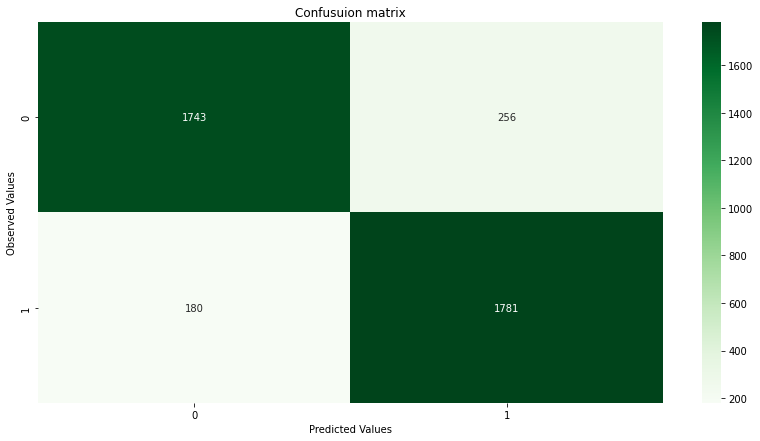

In [ ]:
#plotting confusion matrix
cm_plotter(y_test, y_pred_test)

####  Cross- Validation & Hyperparameter Tuning using GridSearchCV

In [ ]:
# Dictionary of hyper parameters for tuning
param_grid = {'C':[0.1,1,10,100], 'penalty': ['l1', 'l2']}

#Using GridSearchCV
best_params = GridSearchCV(regressor, param_grid, cv=5)
#Fitting the model
best_params.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [ ]:
print(best_params.best_params_)

{'C': 100, 'penalty': 'l2'}


In [ ]:
#implementing Logistic Regression with best params
best_log_model= LogisticRegression(penalty='l2', C=100)
best_log_model.fit(X_train, y_train)

LogisticRegression(C=100)

In [ ]:
best_y_pred_train= best_log_model.predict(X_train)
best_y_pred_test= best_log_model.predict(X_test)

### Performance of Logistic regression model after 5 fold cross validation

In [ ]:
#printing accuracy scores
accuracy_train = best_log_model.score(X_train, y_train)
print(f'the training accuracy score is: {accuracy_train}')
accuracy_test = best_log_model.score(X_test, y_test)
print(f'the testing accuracy score is: {accuracy_test}')

#printing classification report
print(f'classification report for training set is: \n {classification_report(y_train, best_y_pred_train)}')
print(f'classification report for testing set is: \n {classification_report(y_test, best_y_pred_test)}')

#printing ROC_AUC score
print(f'ROC_AUC score for training data set is:{roc_auc_score(y_train, best_y_pred_train)}')
print(f'ROC_AUC score for testing data set is:{roc_auc_score(y_test, best_y_pred_test)}')

the training accuracy score is: 0.9046330374539944
the testing accuracy score is: 0.9002525252525253
classification report for training set is: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      4600
           1       0.89      0.92      0.91      4638

    accuracy                           0.90      9238
   macro avg       0.91      0.90      0.90      9238
weighted avg       0.91      0.90      0.90      9238

classification report for testing set is: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1999
           1       0.88      0.92      0.90      1961

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

ROC_AUC score for training data set is:0.9045615145208767
ROC_AUC score for testing data set is:0.9004202509209729


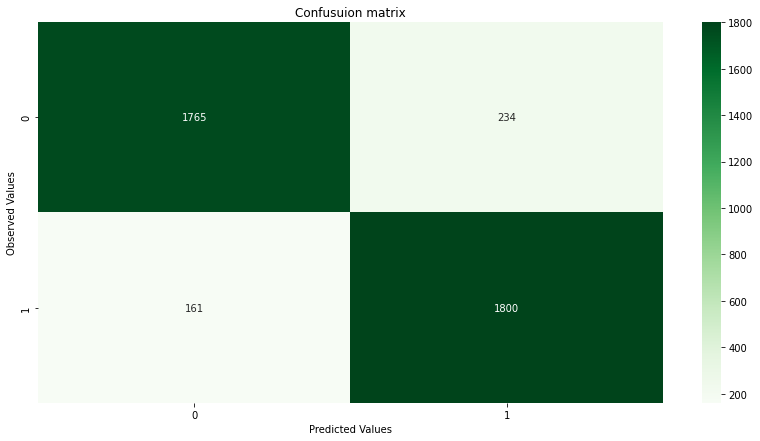

In [ ]:
#plotting confusion matrix for the best model
cm_plotter(y_test, best_y_pred_test)

GridSearchCV is used to tune the hyperparmeters as its relatively efficient and robust while being trained from the data set.

As an impact of using GridSearchCV, ROC_AUC score has imporoved slightly and is evident above in the confusion matrix for testing data set prior to Cross Validation and after performing cross validation.

### Bernoulli Naive - Bayes Classifier

In [ ]:
#Implementation
NB= BernoulliNB()

#Fit the algorithm
NB.fit(X_train, y_train)

#predict values for training and testing data sets
y_pred_train_nb= NB.predict(X_train)
y_pred_test_nb = NB.predict(X_test)

#### Bernoulli-Naive Bayes classifier performance

In [ ]:
#printing accuracy scores
accuracy_train = NB.score(X_train, y_train)
print(f'the training accuracy score is: {accuracy_train}')
accuracy_test = NB.score(X_test, y_test)
print(f'the testing accuracy score is: {accuracy_test}')

#printing classification report
print(f'classification report for training set is: \n {classification_report(y_train, y_pred_train_nb)}')
print(f'classification report for testing set is: \n {classification_report(y_test, y_pred_test_nb)}')

#printing ROC_AUC score
print(f'ROC_AUC score for training data set is:{roc_auc_score(y_train, y_pred_train_nb)}')
print(f'ROC_AUC score for testing data set is:{roc_auc_score(y_test, y_pred_test_nb)}')

the training accuracy score is: 0.7665079021433211
the testing accuracy score is: 0.7707070707070707
classification report for training set is: 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      4600
           1       0.77      0.76      0.77      4638

    accuracy                           0.77      9238
   macro avg       0.77      0.77      0.77      9238
weighted avg       0.77      0.77      0.77      9238

classification report for testing set is: 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1999
           1       0.77      0.77      0.77      1961

    accuracy                           0.77      3960
   macro avg       0.77      0.77      0.77      3960
weighted avg       0.77      0.77      0.77      3960

ROC_AUC score for training data set is:0.7665462530701014
ROC_AUC score for testing data set is:0.7707198831440197


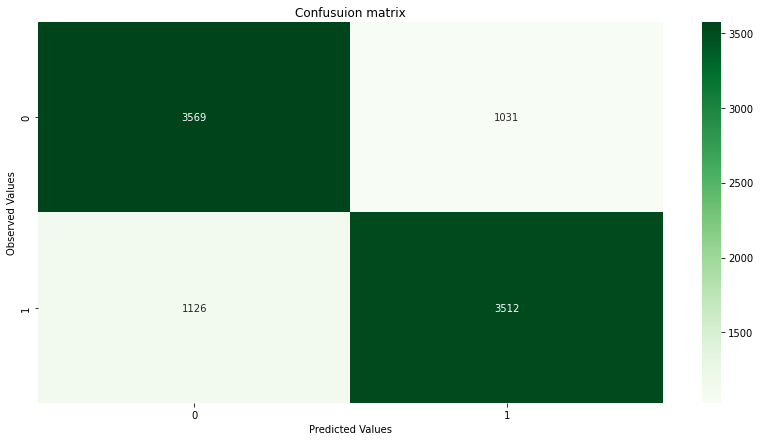

In [ ]:
# Visualizing confusion matrix
cm_plotter(y_train, y_pred_train_nb)

Thus, it is evident that Naive Bayes classifier is not performing well as compared logistic regression model

### Support vector machines

In [ ]:
# ML Model - 3 Implementation
svc= SVC(probability=False)
# Fit the Algorithm
svc.fit(X_train, y_train)
# Predict on the model
svc_y_pred_train= svc.predict(X_train)
svc_y_pred_test= svc.predict(X_test)

#### 1. Evaluation metric scores for SVM

In [ ]:
#printing accuracy scores
accuracy_train = svc.score(X_train, y_train)
print(f'the training accuracy score is: {accuracy_train}')
accuracy_test = svc.score(X_test, y_test)
print(f'the testing accuracy score is: {accuracy_test}')

#printing classification report
print(f'classification report for training set is: \n {classification_report(y_train, svc_y_pred_train)}')
print(f'classification report for testing set is: \n {classification_report(y_test, svc_y_pred_test)}')

#printing ROC_AUC score
print(f'ROC_AUC score for training data set is:{roc_auc_score(y_train, svc_y_pred_train)}')
print(f'ROC_AUC score for testing data set is:{roc_auc_score(y_test, svc_y_pred_test)}')

the training accuracy score is: 0.9148084000865988
the testing accuracy score is: 0.9116161616161617
classification report for training set is: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      4600
           1       0.89      0.94      0.92      4638

    accuracy                           0.91      9238
   macro avg       0.92      0.91      0.91      9238
weighted avg       0.92      0.91      0.91      9238

classification report for testing set is: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      1999
           1       0.88      0.94      0.91      1961

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

ROC_AUC score for training data set is:0.9146889588840769
ROC_AUC score for testing data set is:0.9119279170436825


confusoin matrix for training data set is 



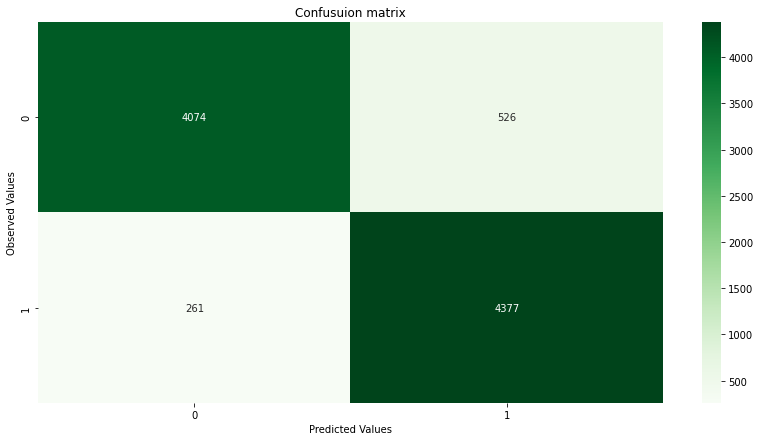

In [ ]:
# Visualizing confusion matrix
#for training data set
print('confusoin matrix for training data set is \n')
cm_plotter(y_train, svc_y_pred_train)

Confusion matrix for test data is 



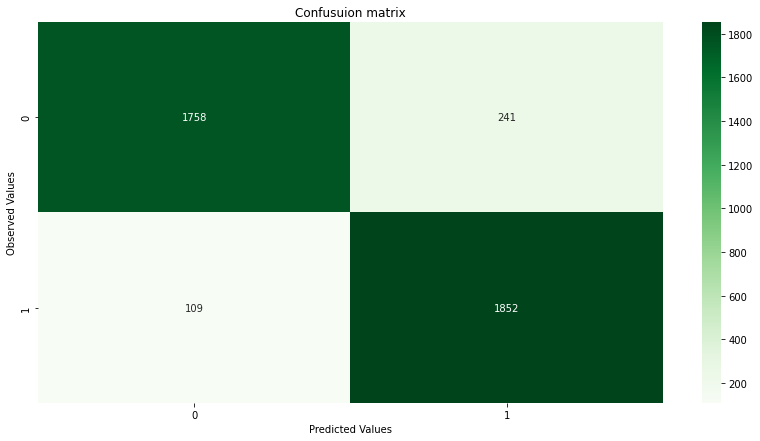

In [ ]:
print('Confusion matrix for test data is \n')    #for testing data set
cm_plotter(y_test, svc_y_pred_test)

#### Cross- Validation & Hyperparameter Tuning

In [ ]:
# SVM Implementation with 5 fold GridSearch Cross Validation
parameters= {'kernel':['linear','rbf','sigmoid'], 'C':[0.1,10,100], 'gamma':[0.01,0.1,1]}
best_svc= GridSearchCV(svc, parameters, refit= True)
# Fit the Algorithm
best_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [ ]:
#fetching the best values of the parameters
best_svc.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
# Predict on the model
#training data prediction
best_svc_y_pred_train= best_svc.predict(X_train)

#testing data prediction
best_svc_y_pred_test= best_svc.predict(X_test)

Performace of the SVM model after 5 fold cross validation


In [ ]:
#printing accuracy scores
accuracy_train = best_svc.score(X_train, y_train)
print(f'the training accuracy score is: {accuracy_train}')
accuracy_test = best_svc.score(X_test, y_test)
print(f'the testing accuracy score is: {accuracy_test}')

#printing classification report
print(f'classification report for training set is: \n {classification_report(y_train, best_svc_y_pred_train)}')
print(f'classification report for testing set is: \n {classification_report(y_test, best_svc_y_pred_test)}')

#printing ROC_AUC score
print(f'ROC_AUC score for training data set is:{roc_auc_score(y_train, best_svc_y_pred_train)}')
print(f'ROC_AUC score for testing data set is:{roc_auc_score(y_test, best_svc_y_pred_test)}')

the training accuracy score is: 0.9992422602294869
the testing accuracy score is: 0.9845959595959596
classification report for training set is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4600
           1       1.00      1.00      1.00      4638

    accuracy                           1.00      9238
   macro avg       1.00      1.00      1.00      9238
weighted avg       1.00      1.00      1.00      9238

classification report for testing set is: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1999
           1       0.97      1.00      0.98      1961

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.99      0.98      0.98      3960

ROC_AUC score for training data set is:0.9992391304347826
ROC_AUC score for testing data set is:0.984737524295039


confusoin matrix for training data set is 



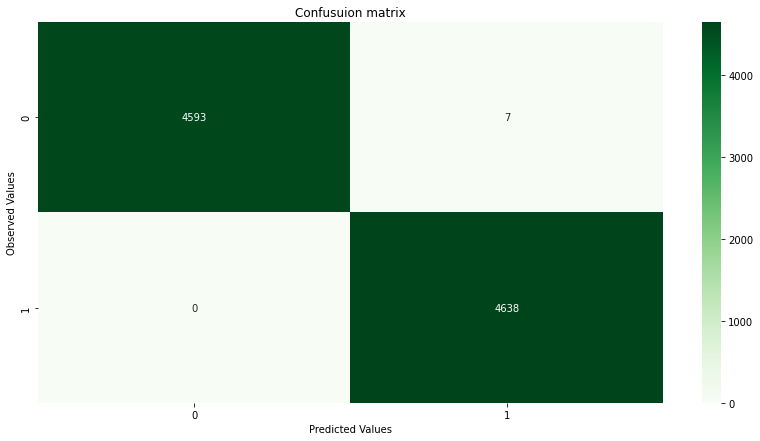

In [ ]:
#Visualizing Confusion matrix
#for training data
print('confusoin matrix for training data set is \n')
cm_plotter(y_train, best_svc_y_pred_train)

Confusion matrix for test data is 



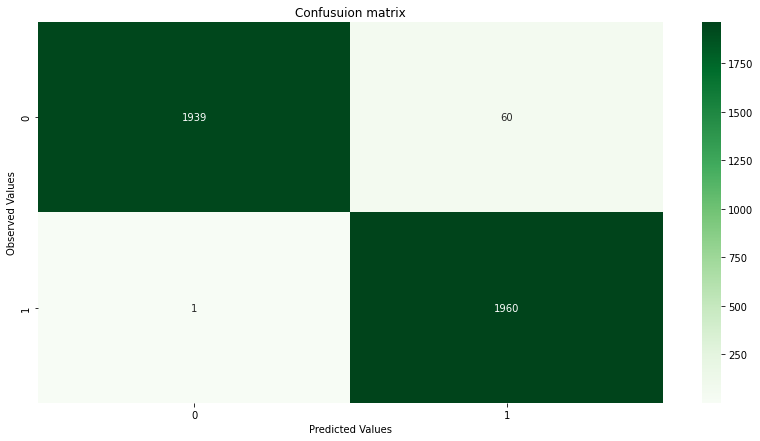

In [ ]:
#for testing data set
print('Confusion matrix for test data is \n')    
cm_plotter(y_test, best_svc_y_pred_test)

Thus, after performing cross validation it is evident that evaluation metric scores have significantly improved from ROC_AUC score of 0.91 on both training and testing data sets. The cross validation has resulted in a significantly improved model with ROC_AUC score of 0.99 for training and 0.98 for training and testing data sets respectively.

### XGBoost Classifier

In [ ]:
#Implementation
xgb= XGBClassifier()

#Fit the algorithm
xgb.fit(X_train, y_train)

#predict values for training and testing data sets
xgb_y_pred_train = xgb.predict(X_train)
xgb_y_pred_test = xgb.predict(X_test)

Evaluation Metric Scores for XGBClassifier

In [ ]:
#printing accuracy scores
accuracy_train = xgb.score(X_train, y_train)
print(f'the training accuracy score is: {accuracy_train}')
accuracy_test = xgb.score(X_test, y_test)
print(f'the testing accuracy score is: {accuracy_test}')

#printing classification report
print(f'classification report for training set is: \n {classification_report(y_train, xgb_y_pred_train)}')
print(f'classification report for testing set is: \n {classification_report(y_test, xgb_y_pred_test)}')

#printing ROC_AUC score
print(f'ROC_AUC score for training data set is:{roc_auc_score(y_train, xgb_y_pred_train)}')
print(f'ROC_AUC score for testing data set is:{roc_auc_score(y_test, xgb_y_pred_test)}')

the training accuracy score is: 0.98008226888937
the testing accuracy score is: 0.9704545454545455
classification report for training set is: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      4600
           1       0.97      0.99      0.98      4638

    accuracy                           0.98      9238
   macro avg       0.98      0.98      0.98      9238
weighted avg       0.98      0.98      0.98      9238

classification report for testing set is: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1999
           1       0.95      0.99      0.97      1961

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960

ROC_AUC score for training data set is:0.9800302791683071
ROC_AUC score for testing data set is:0.970643276763318


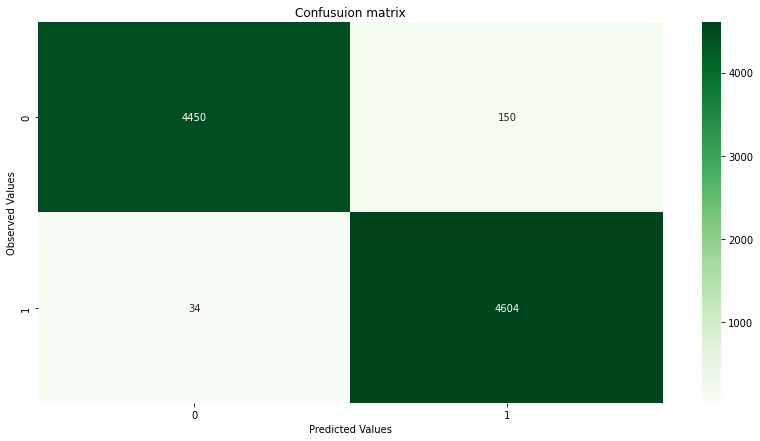

In [ ]:
#Visualizing Confusion Matrix
#for training data
cm_plotter(y_train, xgb_y_pred_train)

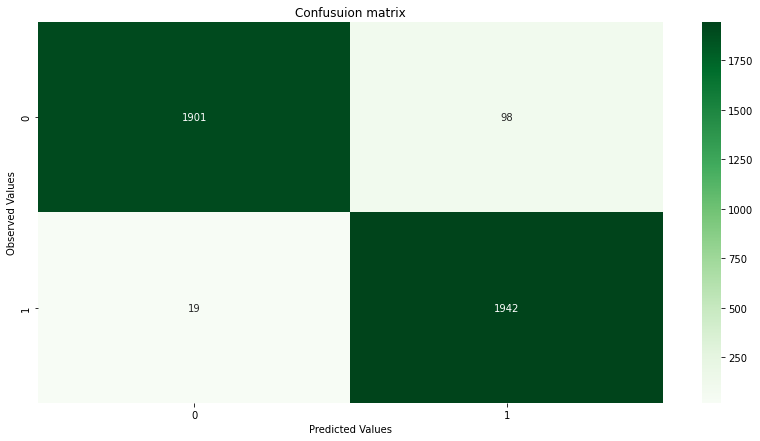

In [ ]:
#for testing data
cm_plotter(y_test, xgb_y_pred_test)

Cross Validation of XGB Classifier using Grid Search CV

In [ ]:
#Implementation
parameters= {'learning_rate':[0.1,0.2,0.3], 'max_depth':[3,4,5], 'min_child_weight':[1,2,3,5], 'n_estimators':[100,1000]}
best_xgb= GridSearchCV(xgb, parameters, refit=True)

#fitting the algorithm
best_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 2, 3, 5],
                         'n_estimators': [100, 1000]})

In [ ]:
#fetching the best parameters
best_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 1000}

In [ ]:
#predicting the output values
#training data set
best_xgb_y_pred_train = best_xgb.predict(X_train)

#test data set
best_xgb_y_pred_test = best_xgb.predict(X_test)

Performance of the XGB Model after 5 fold cross validation



In [ ]:
#printing accuracy scores
accuracy_train = best_xgb.score(X_train, y_train)
print(f'the training accuracy score is: {accuracy_train}')
accuracy_test = best_xgb.score(X_test, y_test)
print(f'the testing accuracy score is: {accuracy_test}')

#printing classification report
print(f'classification report for training set is: \n {classification_report(y_train, best_xgb_y_pred_train)}')
print(f'classification report for testing set is: \n {classification_report(y_test, best_xgb_y_pred_test)}')

#printing ROC_AUC score
print(f'ROC_AUC score for training data set is:{roc_auc_score(y_train, best_xgb_y_pred_train)}')
print(f'ROC_AUC score for testing data set is:{roc_auc_score(y_test, best_xgb_y_pred_test)}')

the training accuracy score is: 1.0
the testing accuracy score is: 0.9883838383838384
classification report for training set is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4600
           1       1.00      1.00      1.00      4638

    accuracy                           1.00      9238
   macro avg       1.00      1.00      1.00      9238
weighted avg       1.00      1.00      1.00      9238

classification report for testing set is: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1999
           1       0.98      1.00      0.99      1961

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960

ROC_AUC score for training data set is:1.0
ROC_AUC score for testing data set is:0.9884603188896844


confusoin matrix for training data set is 



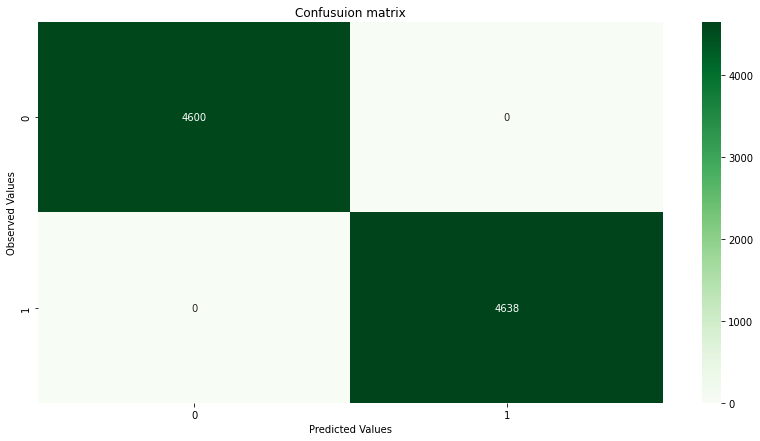

In [ ]:
#Visualizing the Confusion Matrix
#training data set
print('confusoin matrix for training data set is \n')
cm_plotter(y_train, best_xgb_y_pred_train)

Confusion matrix for test data is 



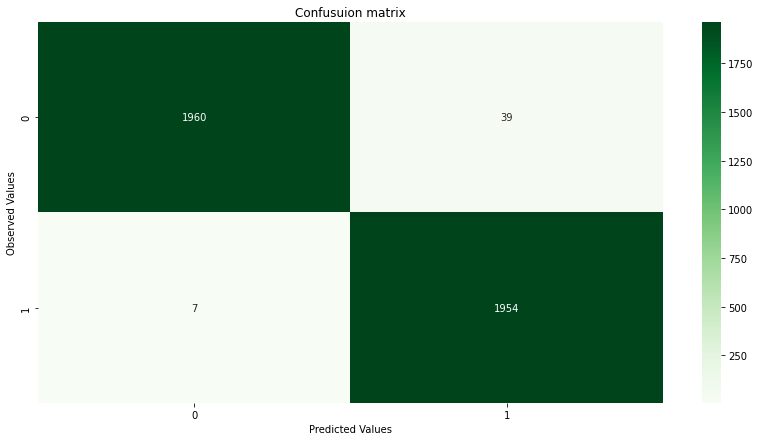

In [ ]:
#for testing data set
print('Confusion matrix for test data is \n')    
cm_plotter(y_test, best_xgb_y_pred_test)

In [ ]:
print(recall_score(y_test, best_xgb_y_pred_test))

0.9964303926568078


In [ ]:
print(recall_score(y_test, best_svc_y_pred_test))

0.9994900560938297


###  Choice of Evaluation Metric and Business Impact

Predicting whether a company goes bankrupt is critical especially for investment banking firms and that leaves minimal room for error.

Hence, using recall score is the appropriate metric from the point of view of an Investment Banking Firm or any Investor in general as higher recall score indicates lower number of false negatives(predicting that company is not bankrupt by algorithm even though it was observed to be bankrupt) 

In this regard, let us find out the recall scores for our top models i.e., SVM and XGB Classifier respectively

In [ ]:
#For SVM
print(f'the recall score for SVM model on testing data set is {recall_score(y_test, best_svc_y_pred_test)}')

#For XGB Classifier
print(f'the recall score for XGB model on testing data set is {recall_score(y_test, best_xgb_y_pred_test)}')

the recall score for SVM model on testing data set is 0.9994900560938297
the recall score for XGB model on testing data set is 0.9964303926568078


Thus, it is better to chose Support Vector Machine Classifier(SVM) over XGBoost Classifier as recall score is better for SVC at 0.999 on testing data set.

### 3. SVM model feature importance using SHAP

In [ ]:
#installing shap module
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.0 MB/s eta 0:00:00


In [ ]:
#importing shap
import shap

In [ ]:
#Defining the data and sample size to be considered
x= shap.sample(X_smt, 150)

In [ ]:
#Definfing the Kernel Explainer with svm model and data set after applying SMOTE
explainer= shap.KernelExplainer(svc.decision_function, x)

In [ ]:
#Fetching Shap Values
shap_values = explainer.shap_values(x)

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
#Initializing javascript visualization in notebook environment and plotting
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x)

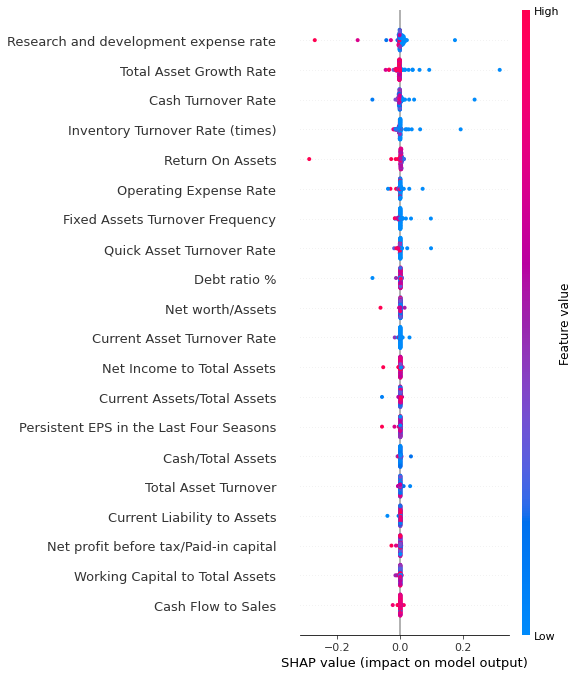

In [ ]:
#Summary scatter plot for shap values
shap.summary_plot(shap_values,x)

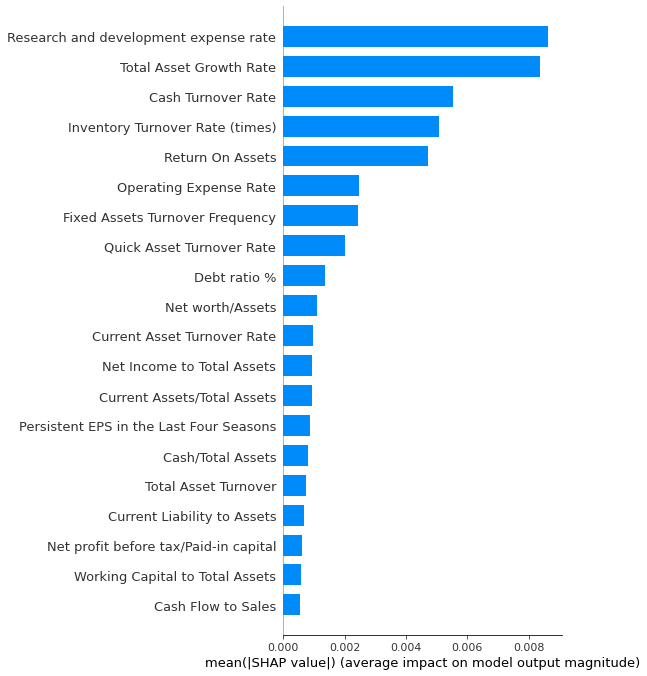

In [ ]:
#Summary Barplot for shap values
shap.summary_plot(shap_values,x, plot_type='bar')

Hence, it is evident that top 5 features influenciing the bankruptcy of a company are:


1.   Lower value of Research and Development Expense Rate
2.   Lower Total Assets growth rate
3.   Lower Cash Turnover rate
4.   Low returns on assets
5.   Lower inventory turnover rate





## ***Deployment***

1. Saving the Support Vector Classifier in a joblib file


In [ ]:
# importing joblib
import joblib

# Saving the file
joblib.dump(svc, 'svc.pkl')

['svc.pkl']

2. Loading the saved model file


In [ ]:
# Load the File
loaded_model = joblib.load('svc.pkl') 

# **Scope for future work**

There is still a decent amount of improvement that can be done with better data and models. They include:


*   Better models can be built if there is an extra categorical feature pointing to the industry in which company operates
*   It is to be noted that the world went through the dot com bubble crash during the end of 20th century and US housing market collapse causing recession during 2009. Hence, another feature which details the year when a company filed bankruptcy could be helpful for making better insights.
*   Better model may be built if one has computational capacity to compute probabilities while fitting the SVM model.





# **Conclusion**

*  Data set is from the source is highly imbalanced. As a result, SMOTE was applied on the data set.

*   It is to be noted that Support Vector Machine classifier(with RBF) Model performed the best while compared to other models with F1 score of 0.999 on testing data set. However it is to be noted that, XGBoost classifier is also extremely well performing while performing marginallly poorer at 0.996compared to SVM.

*   Bernoulli-Naive Bayes model performed poorly with ROC AUC score of just 0.77
*  It is clear that, following factors are critical as per the SVC based 
bankruptcy prediction model for evaluating companies as these have significant impact on the overall financial health of the company.
1.   Lower value of Research and Development Expense Rate
2.   Lower Total Assets growth rate
3.   Lower Cash Turnover rate
4.   Low returns on assets
5.   Lower inventory turnover rate


